## load data

In [1]:
import sys
sys.path.append('/Users/shiyihe/Desktop/ANALYSIS_SCRIPTS')

from data_processor import (
    load_all_data,
    extract_reading_tasks,
    extract_writing_nl_tasks,
    extract_modifying_tasks,
    extract_writing_tasks,
    aggregate_tasks_with_format,
    extract_post_task_questions,
    analyze_nasa_and_post_surveys,
    melt_tlx,
    aggregate_quiz_parts,
    summarize_quiz_parts,
    evaluate_quiz_answers_from_tutorial,
    extract_and_encode_familiarity,
    get_answer_counts,
    plot_answer_distribution,
    extract_survey_items,
    extract_post_task_tlx_responses,
    merge_dfs
)

from time_analysis import (
    time_analysis,
    normalize_typing_time,
    compute_task_time_ratio
)

from statistical_testing import (
    compare_groups_statistically,
    visualize_violin_comparison,
    visualize_box_with_density)

from statistic import (
    compare_statistically,
    vis_violin_comparison,
    compare_significant_pairs,
    vis_box_comparasion)

from correctness_analysis import (
    annotate_reading_correctness_exact,
    visualize_accuracy_heatmap,
    visualize_score_distribution_heatmap,
    plot_binary_response_vs_metric_heatmap,
    plot_nasatlx_correct
)


In [2]:
folder = '/Users/shiyihe/Desktop/ANALYSIS_SCRIPTS/config'
# folder = '/Users/shiyihe/Desktop/ANALYSIS_SCRIPTS/test_all_data'
all_data = load_all_data(folder, ignore_completed=True)
df_task, df_part, format_stat= time_analysis(all_data)
df_writing_nl = extract_writing_nl_tasks(all_data)
df_writing = extract_writing_tasks(all_data)
df_modifying = extract_modifying_tasks(all_data)
df_reading = extract_reading_tasks(all_data)
df_ratio, df_format_avg_ratio = compute_task_time_ratio(df_part, df_writing)
df_writing_norm = normalize_typing_time(df_writing_nl, df_writing, keep_baseline=False)
df_format_avg_ratio

Total number of valid participants: 107


format  avg_ratio
0  hjson   0.224077
1   json   0.222934
2  json5   0.200154
3  jsonc   0.266754
4   toml   0.236391
5    xml   0.191788
6   yaml   0.184057

## Time Analysis

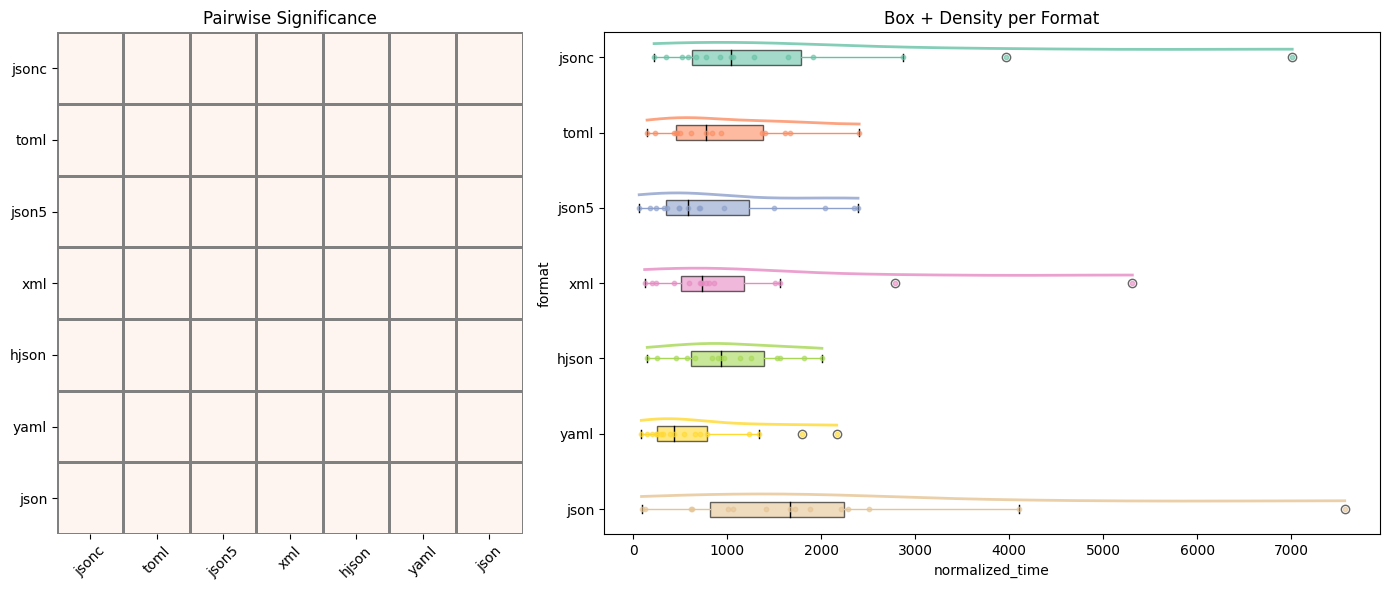

{'method': 'anova',
 'alpha': 0.05,
 'p_adjust_method': 'bonferroni',
 'descriptive':         count         mean          std       median         min          max
 format                                                                       
 hjson      15  1003.327606   553.452717   934.208193  150.819821  2008.855223
 json       15  1926.805217  1874.106251  1672.418345   90.014136  7570.503525
 json5      15   893.255855   790.782297   583.860278   64.957857  2392.808629
 jsonc      15  1658.053427  1790.203996  1041.053921  223.780560  7011.880713
 toml       15   924.937168   638.008132   771.857025  148.903186  2404.909835
 xml        15  1156.918620  1330.792357   728.492154  123.255406  5311.267593
 yaml       17   682.095187   606.689957   433.216196   87.965123  2166.251427,
 'overall_p': 0.05206642870370747,
 'effect_size': 0.11520494415486529,
 'is_significant': False,
 'pairwise': Empty DataFrame
 Columns: [group1, group2, p_value, significant, interpretation]
 Index: [],

In [3]:
## writing_task

vis_box_comparasion(
    df_writing_norm,
    group_col='format',
    value_col='normalized_time',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task',
    # # discrete_tasks=['reading-task-config-1','reading-task-config-2'],
    # continuous_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5','reading-task']
)

results = compare_statistically(
    df_writing_norm,
    group_col='format',
    value_col='normalized_time',
    method='anova',
    task_col='task',
    # # discrete_tasks=['reading-task-config-1','reading-task-config-2'],
    # continuous_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5','reading-task']
)

results

In [4]:
df_reading_clean = aggregate_tasks_with_format(
    df_reading,
    participant_col='participantId',
    task_col='task',
    format_col = 'format',
    metrics=['duration_sec','help_count']
)
df_reading_clean

participantId                   task format         response  \
0    67895b7d6400163124042af7  reading-task-config-1  jsonc            7.9.0   
1    67895b7d6400163124042af7  reading-task-config-2  jsonc               12   
2    67895b7d6400163124042af7  reading-task-config-3  jsonc                6   
3    67895b7d6400163124042af7  reading-task-config-4  jsonc  devDependencies   
4    67895b7d6400163124042af7  reading-task-config-5  jsonc         d3-scale   
..                        ...                    ...    ...              ...   
637  67f66486e35051403284eb5e    reading-task-config    xml              NaN   
638  680ebf035ab59d342f31726e    reading-task-config  hjson              NaN   
639  681374d36d7bd7ccb6f914f5    reading-task-config  json5              NaN   
640  68138e7f96395f4c5f3a0a87    reading-task-config   json              NaN   
641  6818ca1523ece90f671e3601    reading-task-config   json              NaN   

       start_time      end_time  duration_sec  help_count  
0    1.747336e+12  1.747336e+12        65.634           0  
1    1.747336e+12  1.747336e+12        68.938           0  
2    1.747336e+12  1.747336e+12        35.185           0  
3    1.747336e+12  1.747336e+12        74.699           0  
4    1.747336e+12  1.747336e+12        30.321           0  
..            ...           ...           ...         ...  
637           NaN           NaN       722.635           0  
638           NaN           NaN       393.819           0  
639           NaN           NaN       159.182           0  
640           NaN           NaN       176.875           0  
641           NaN           NaN       456.023           0  

[642 rows x 8 columns]

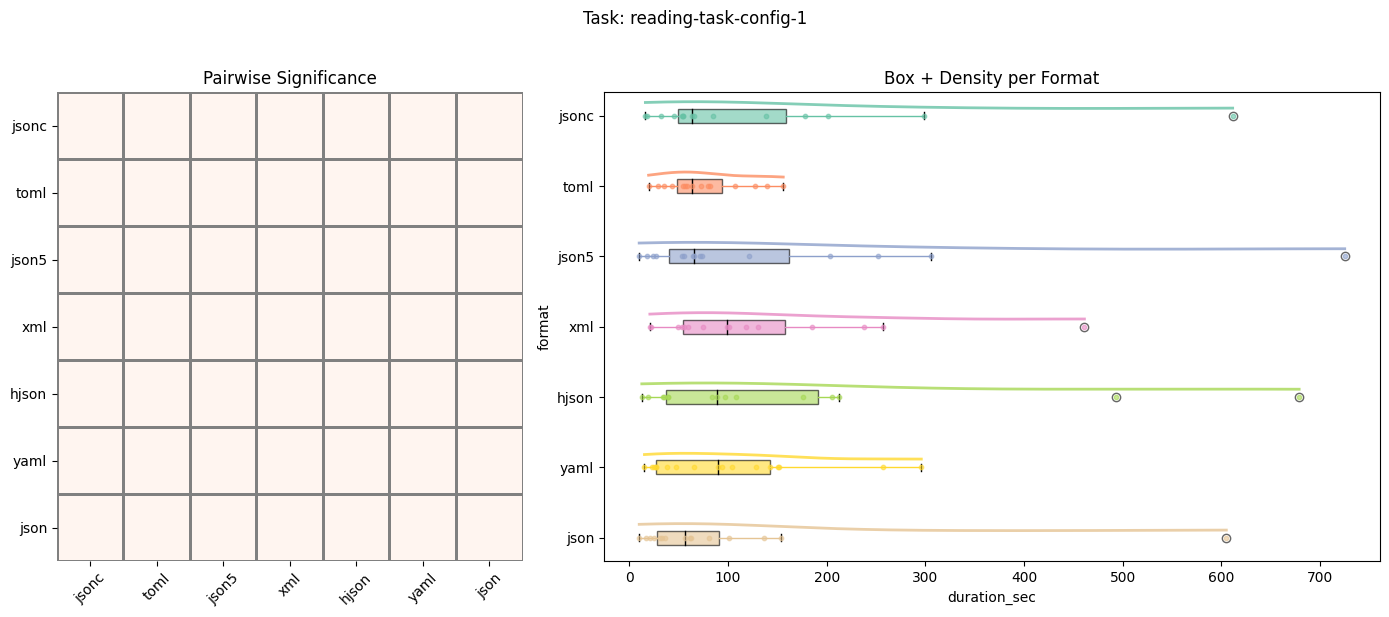

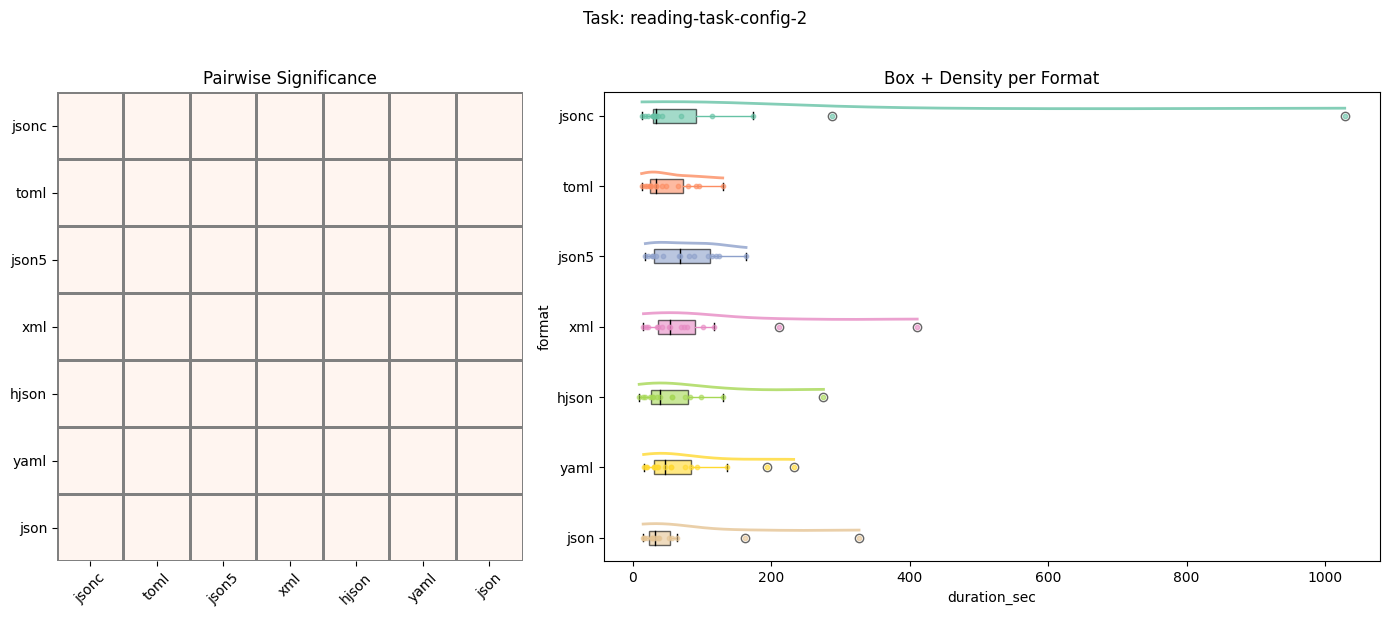

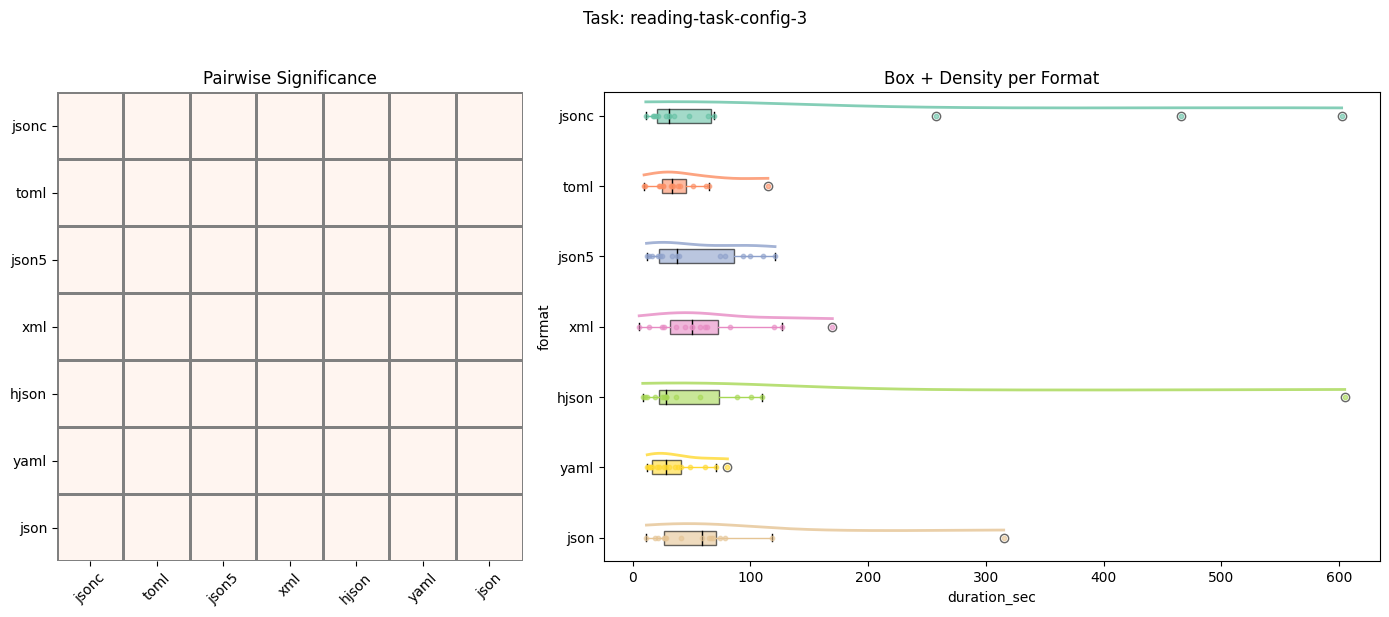

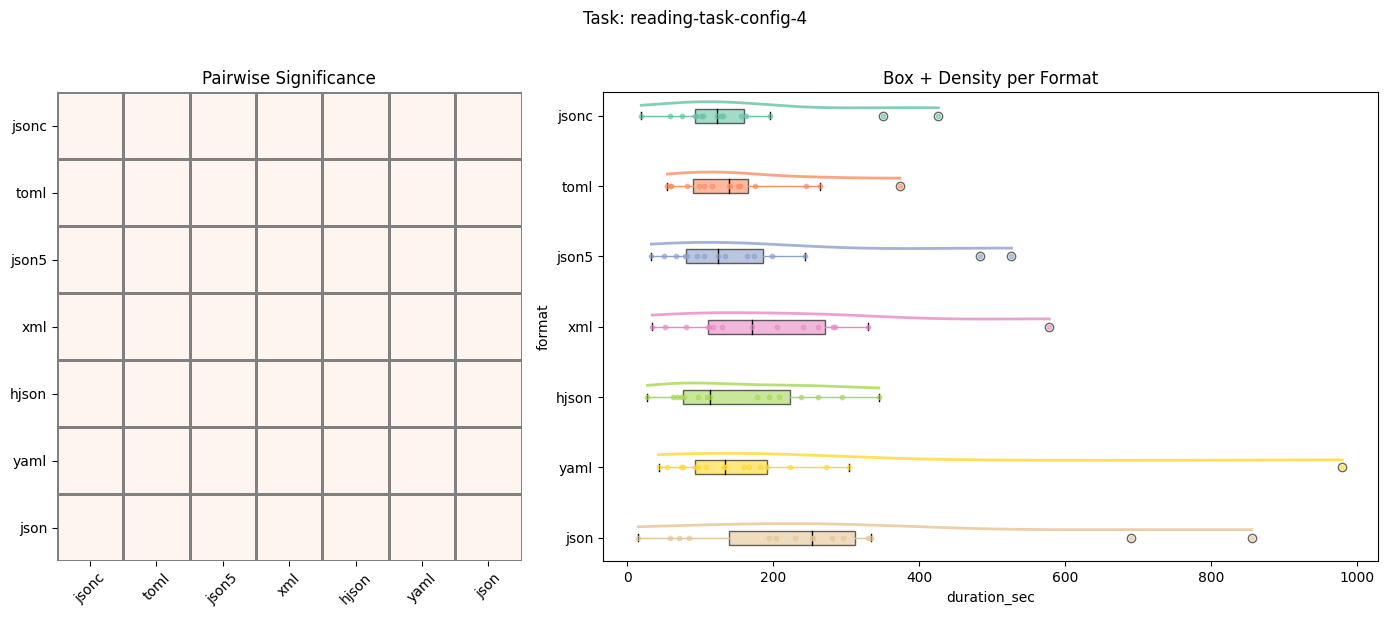

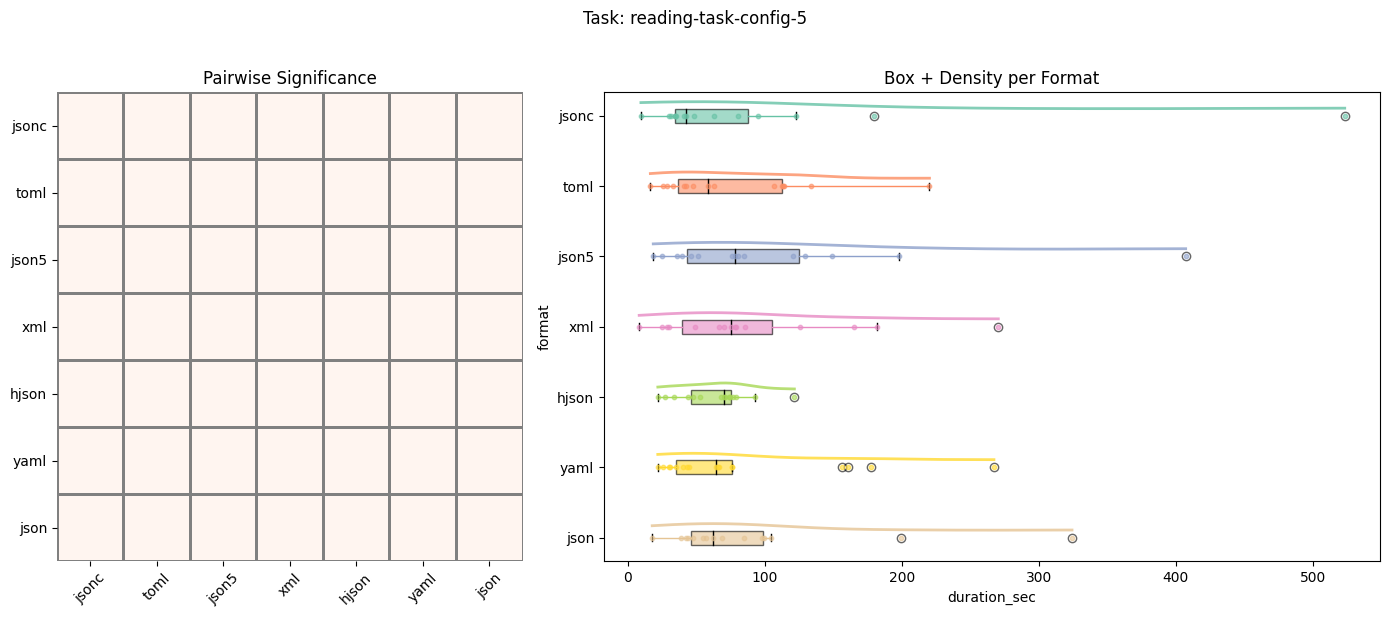

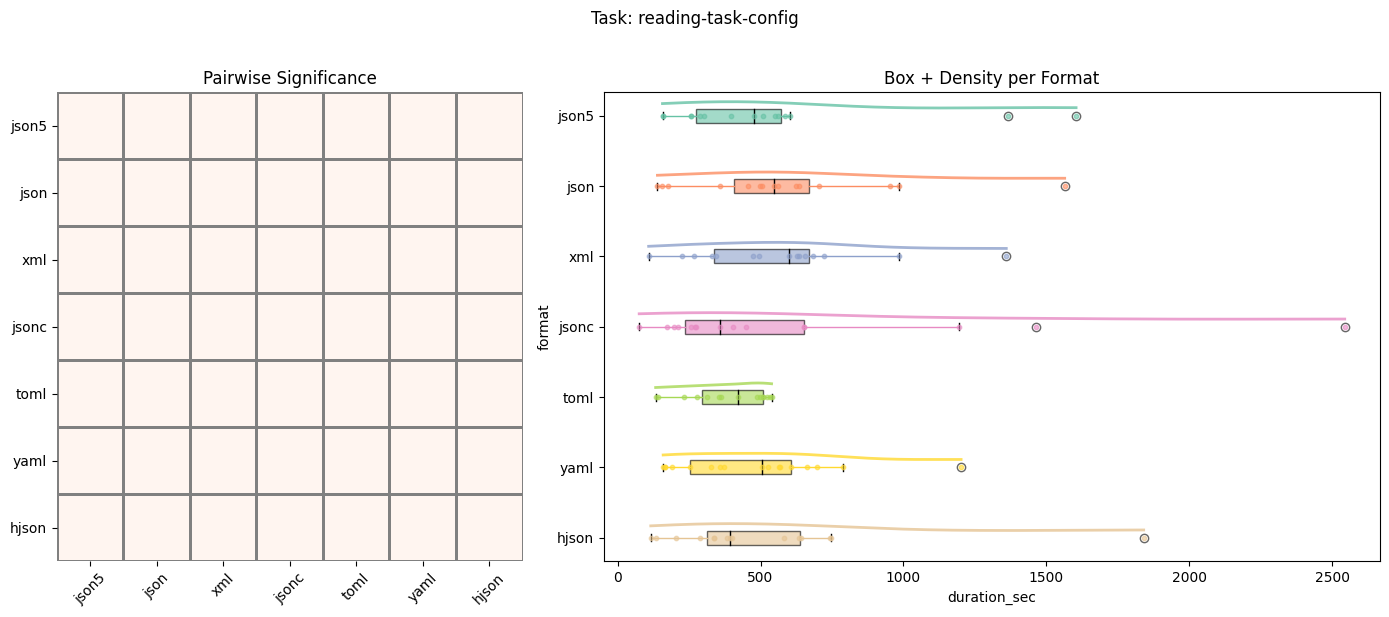

{'reading-task-config': {'method': 'anova',
  'alpha': 0.05,
  'p_adjust_method': 'bonferroni',
  'descriptive':         count        mean         std   median      min       max
  format                                                           
  hjson      15  518.683333  419.309728  393.819  115.937  1840.863
  json       15  590.526067  368.940523  548.079  139.342  1564.420
  json5      15  538.087467  415.444840  477.696  157.047  1604.290
  jsonc      15  611.727533  660.601350  357.557   75.443  2544.382
  toml       15  388.612067  142.285040  420.675  133.024   538.767
  xml        15  568.054600  315.579606  599.896  108.563  1360.035
  yaml       17  477.556647  275.890958  506.862  159.383  1201.899,
  'overall_p': 0.7654958669145109,
  'effect_size': 0.03219341516158456,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: [],
  'warning': None},
 'reading-task-config-1': {'method': 'anova',
 

In [5]:
## reading tasks
vis_box_comparasion(
    df_reading_clean,
    group_col='format',
    value_col='duration_sec',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task',
    # discrete_tasks=['reading-task-config-1','reading-task-config-2'],
    continuous_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5','reading-task']
)

results = compare_statistically(
    df_reading_clean,
    group_col='format',
    value_col='duration_sec',
    method='anova',
    task_col='task',
    # discrete_tasks=['reading-task-config-1','reading-task-config-2'],
    continuous_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5','reading-task']
)

results


In [6]:
df_modifying_clean = aggregate_tasks_with_format(
    df_modifying,
    participant_col='participantId',
    task_col='task',
    format_col = 'format',
    metrics=['duration_sec','help_count']
)
df_modifying_clean

participantId                     task format  \
0    67895b7d6400163124042af7  modifying-task-config-1  jsonc   
1    67895b7d6400163124042af7  modifying-task-config-2  jsonc   
2    67895b7d6400163124042af7  modifying-task-config-3  jsonc   
3    67895b7d6400163124042af7  modifying-task-config-4  jsonc   
4    659960f32faa4ff4b116de92  modifying-task-config-1   toml   
..                        ...                      ...    ...   
530  67f66486e35051403284eb5e    modifying-task-config    xml   
531  680ebf035ab59d342f31726e    modifying-task-config  hjson   
532  681374d36d7bd7ccb6f914f5    modifying-task-config  json5   
533  68138e7f96395f4c5f3a0a87    modifying-task-config   json   
534  6818ca1523ece90f671e3601    modifying-task-config   json   

                                                  code    start_time  \
0                                                 None  1.747337e+12   
1                                                 None  1.747337e+12   
2                                                 None  1.747337e+12   
3                                                 None  1.747337e+12   
4    name = "vega-lite"\nauthor = "Dominik Moritz, ...  1.747175e+12   
..                                                 ...           ...   
530                                                NaN           NaN   
531                                                NaN           NaN   
532                                                NaN           NaN   
533                                                NaN           NaN   
534                                                NaN           NaN   

         end_time  duration_sec  help_count  
0    1.747337e+12        24.440           0  
1    1.747337e+12         4.765           0  
2    1.747337e+12         3.927           0  
3    1.747337e+12         4.457           0  
4    1.747175e+12       100.503           0  
..            ...           ...         ...  
530           NaN       995.246           0  
531           NaN       754.351           0  
532           NaN       244.856           0  
533           NaN       438.817           0  
534           NaN       617.698           0  

[535 rows x 8 columns]

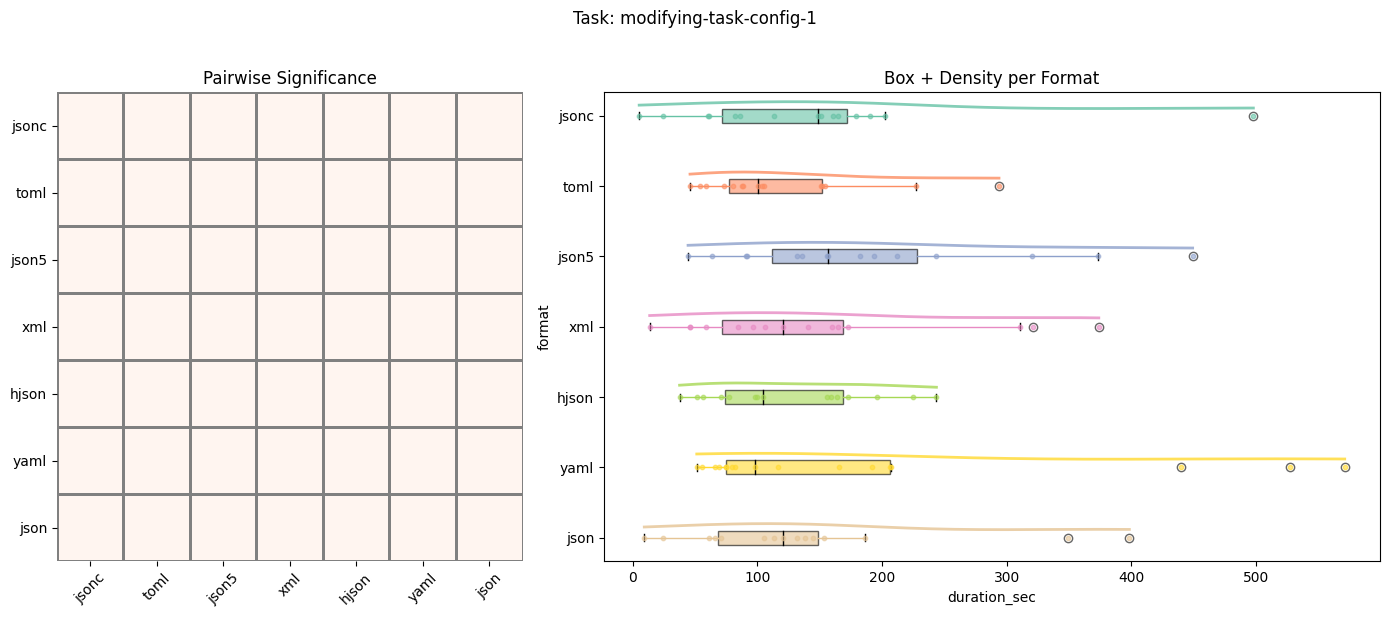

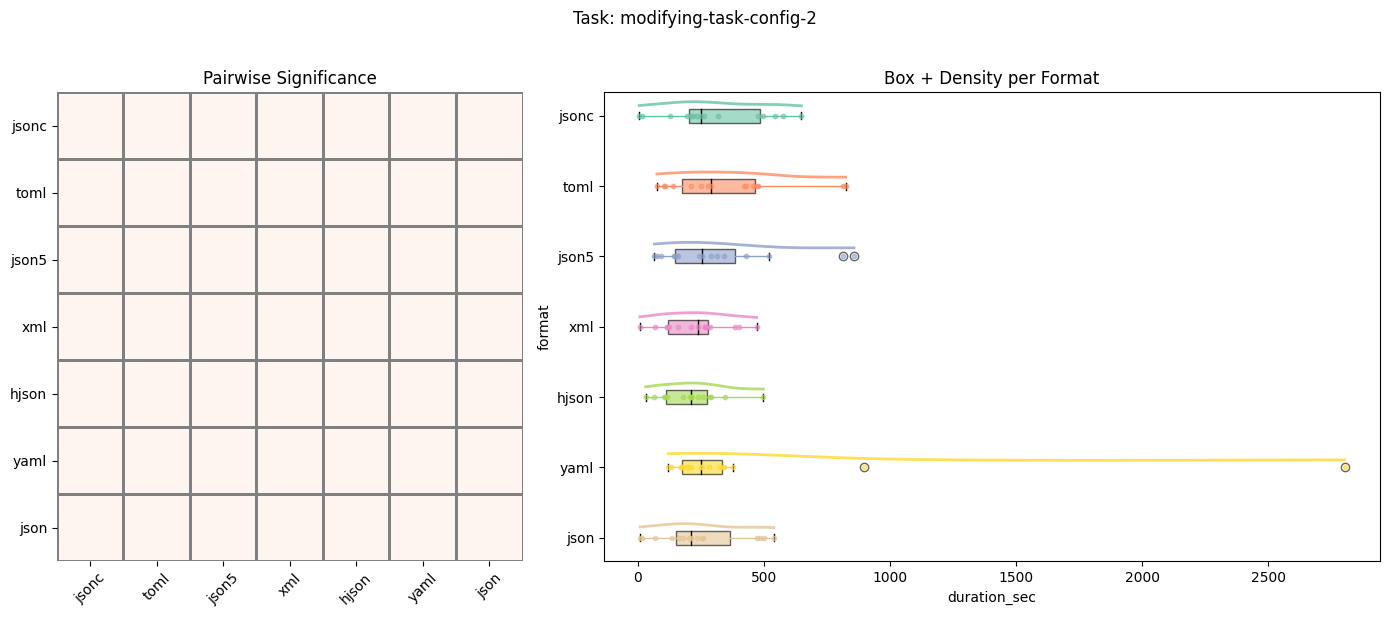

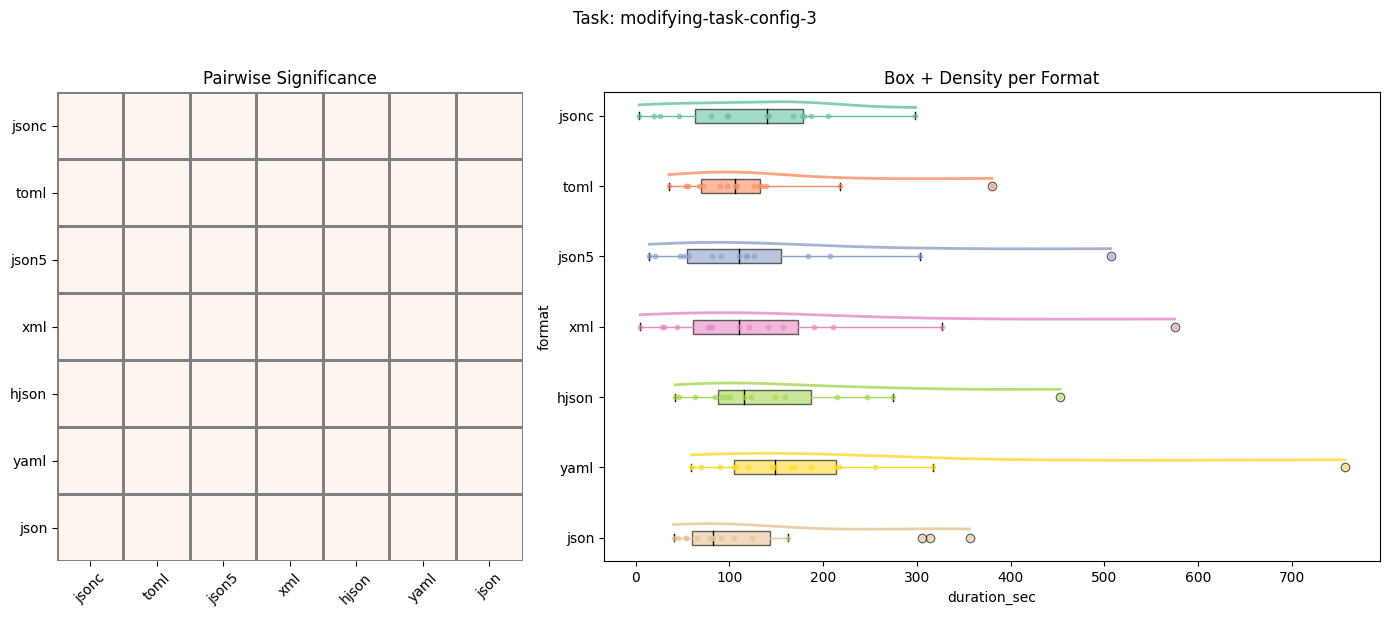

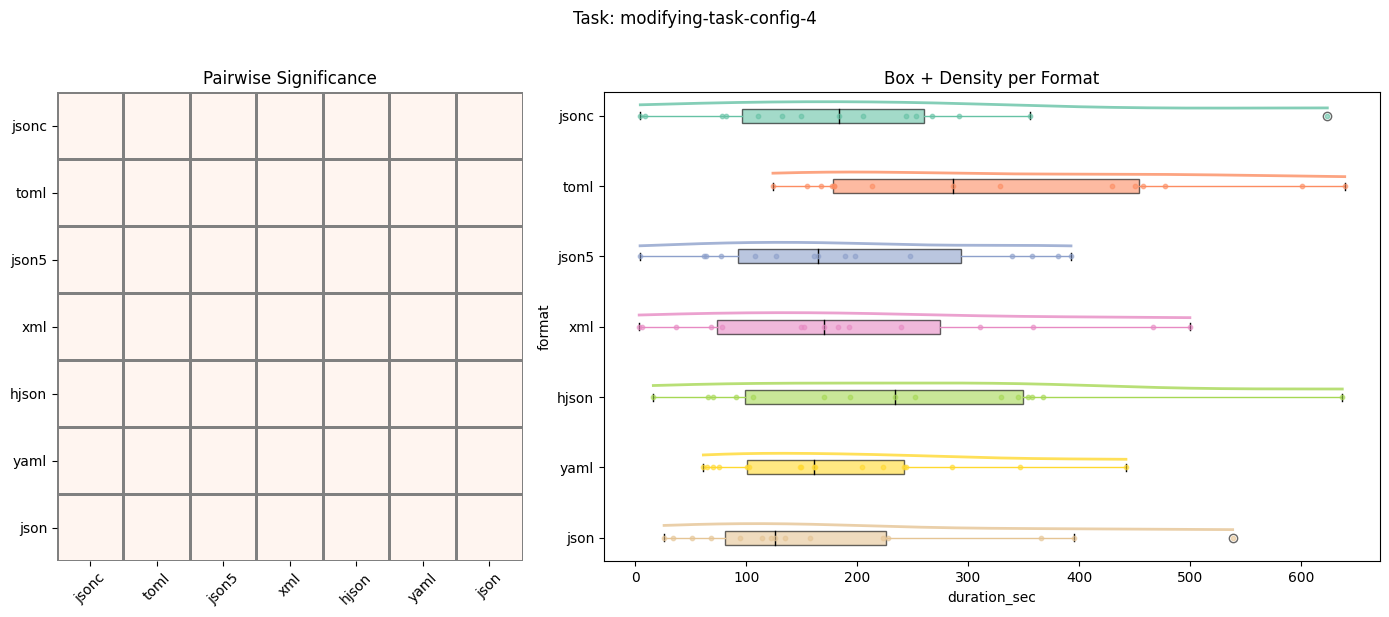

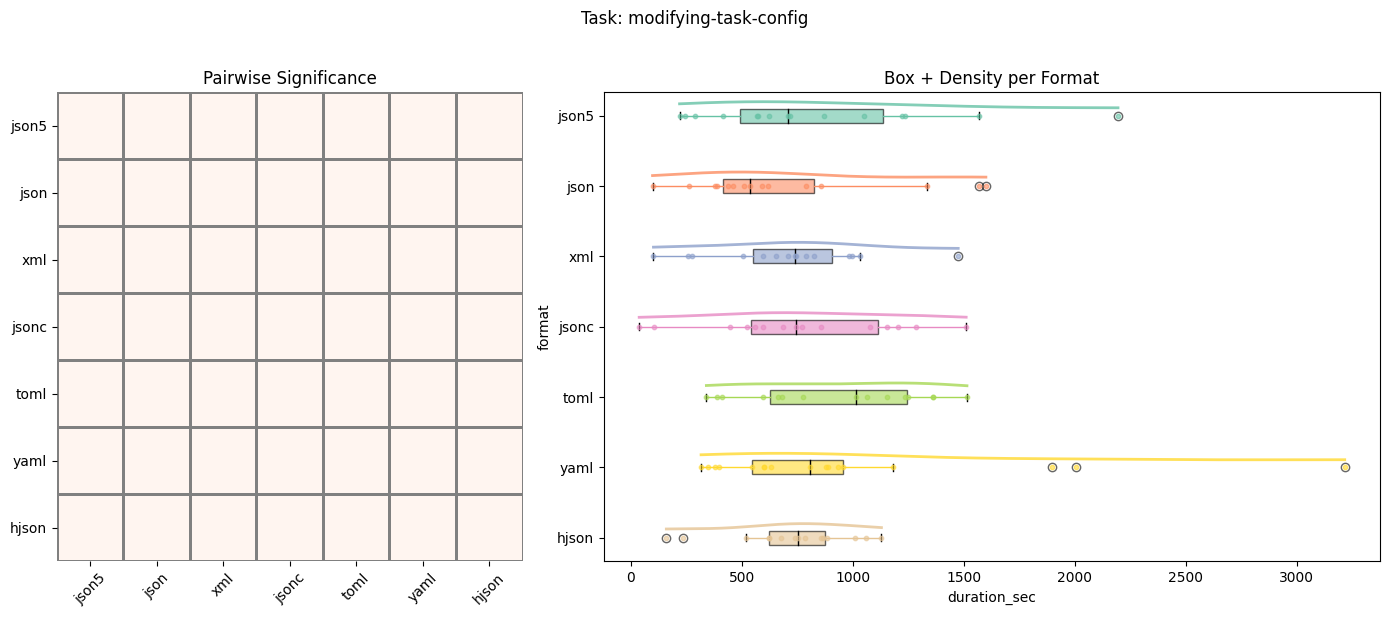

{'modifying-task-config': {'method': 'anova',
  'alpha': 0.05,
  'p_adjust_method': 'bonferroni',
  'descriptive':         count        mean         std    median      min       max
  format                                                            
  hjson      15  727.562133  273.603018   754.351  159.846  1128.813
  json       15  695.435000  459.870069   535.157   97.767  1599.226
  json5      15  833.067133  545.105398   707.949  219.529  2194.235
  jsonc      15  770.249333  420.611908   742.336   37.589  1510.373
  toml       15  920.253667  393.392014  1014.994  340.236  1514.005
  xml        15  712.432000  347.339966   741.154  101.923  1474.525
  yaml       17  975.321765  755.224925   807.021  316.352  3215.516,
  'overall_p': 0.5798572873518746,
  'effect_size': 0.04525311456157497,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: [],
  'warning': None},
 'modifying-task-config-1': {'method

In [7]:
## modifying tasks
vis_box_comparasion(
    df_modifying_clean,
    group_col='format',
    value_col='duration_sec',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task',
    # discrete_tasks=['reading-task-config-1','reading-task-config-2'],
    continuous_tasks=['modifying-task-config-1','modifying-task-config-2','modifying-task-config-3','modifying-task-config-4', 'modifying-task']
)

results = compare_statistically(
    df_modifying_clean,
    group_col='format',
    value_col='duration_sec',
    method='anova',
    task_col='task',
    # discrete_tasks=['reading-task-config-1','reading-task-config-2'],
    continuous_tasks=['modifying-task-config-1','modifying-task-config-2','modifying-task-config-3','modifying-task-config-4', 'modifying-task']
)

results

## help button clicks analysis

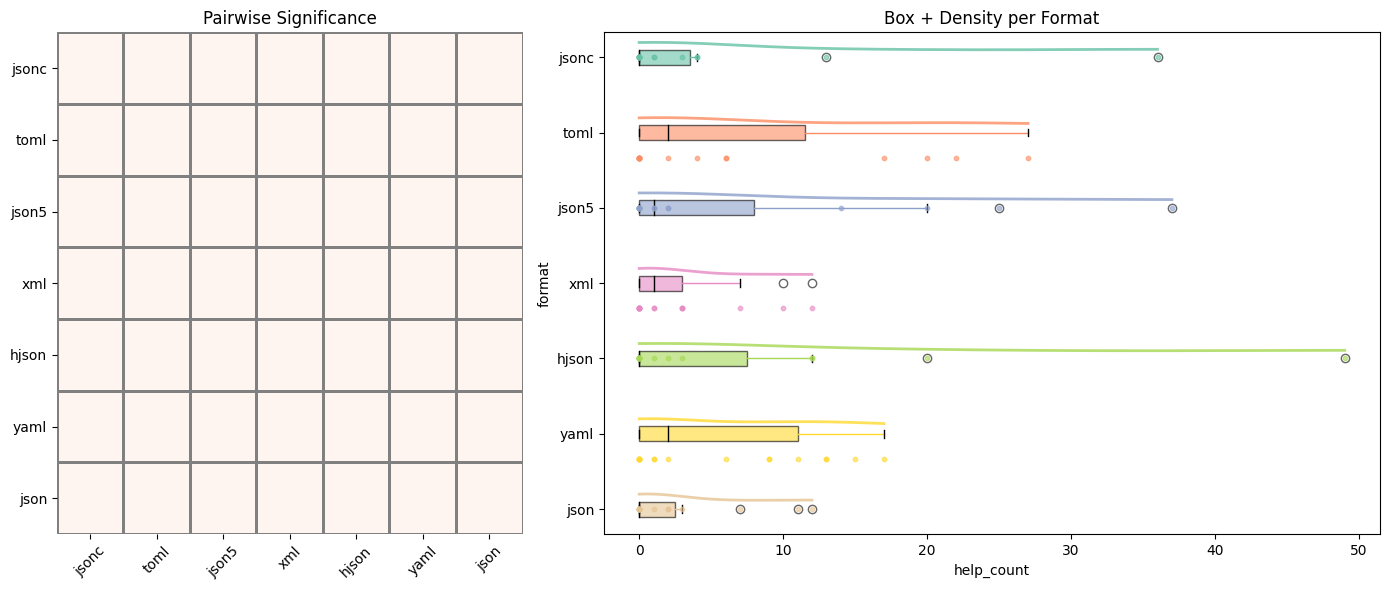

{'method': 'anova',
 'alpha': 0.05,
 'p_adjust_method': 'bonferroni',
 'descriptive':         count      mean        std  median  min  max
 format                                              
 hjson      15  6.600000  13.227677     0.0    0   49
 json       15  2.533333   4.103425     0.0    0   12
 json5      15  6.800000  11.669251     1.0    0   37
 jsonc      15  4.133333   9.455661     0.0    0   36
 toml       15  6.933333   9.535398     2.0    0   27
 xml        15  2.666667   3.921856     1.0    0   12
 yaml       17  5.705882   6.242643     2.0    0   17,
 'overall_p': 0.6482941244015943,
 'effect_size': 0.04044118089130932,
 'is_significant': False,
 'pairwise': Empty DataFrame
 Columns: [group1, group2, p_value, significant, interpretation]
 Index: [],
 'warning': None}

In [8]:
## writing_task

vis_box_comparasion(
    df_writing_norm,
    group_col='format',
    value_col='help_count',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task',
    # # discrete_tasks=['reading-task-config-1','reading-task-config-2'],
    # continuous_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5','reading-task']
)

results = compare_statistically(
    df_writing_norm,
    group_col='format',
    value_col='help_count',
    method='anova',
    task_col='task',
    # # discrete_tasks=['reading-task-config-1','reading-task-config-2'],
    # continuous_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5','reading-task']
)

results

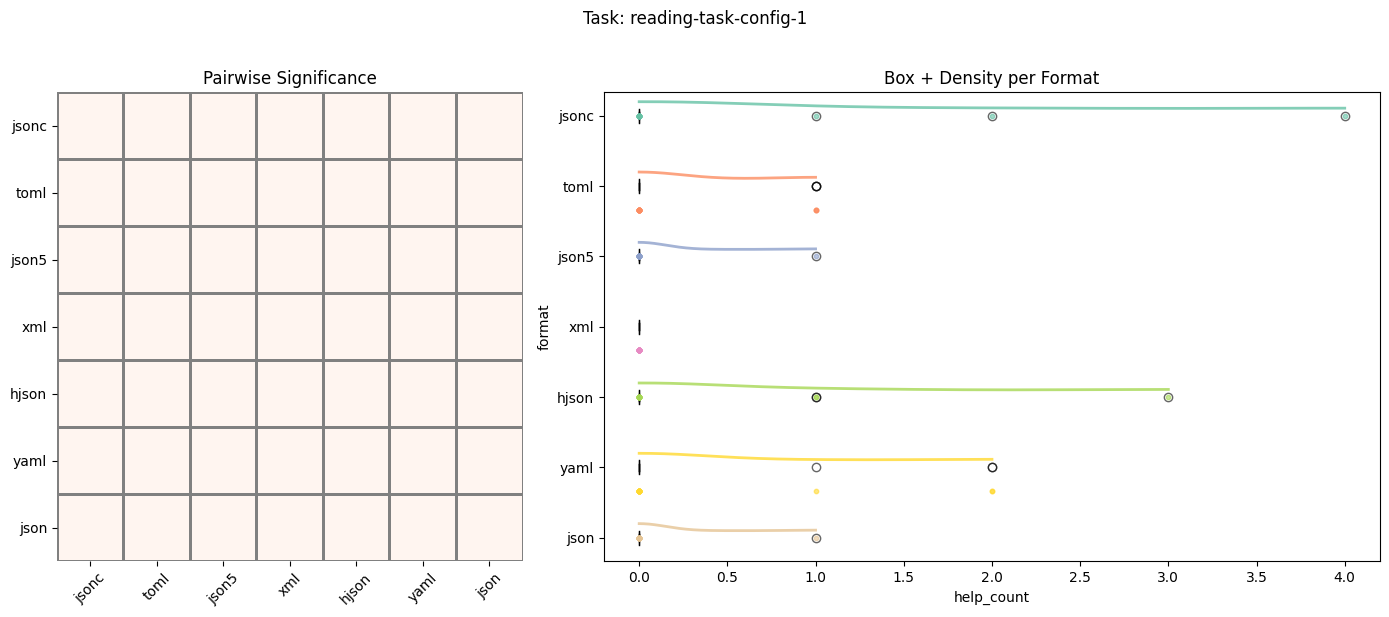

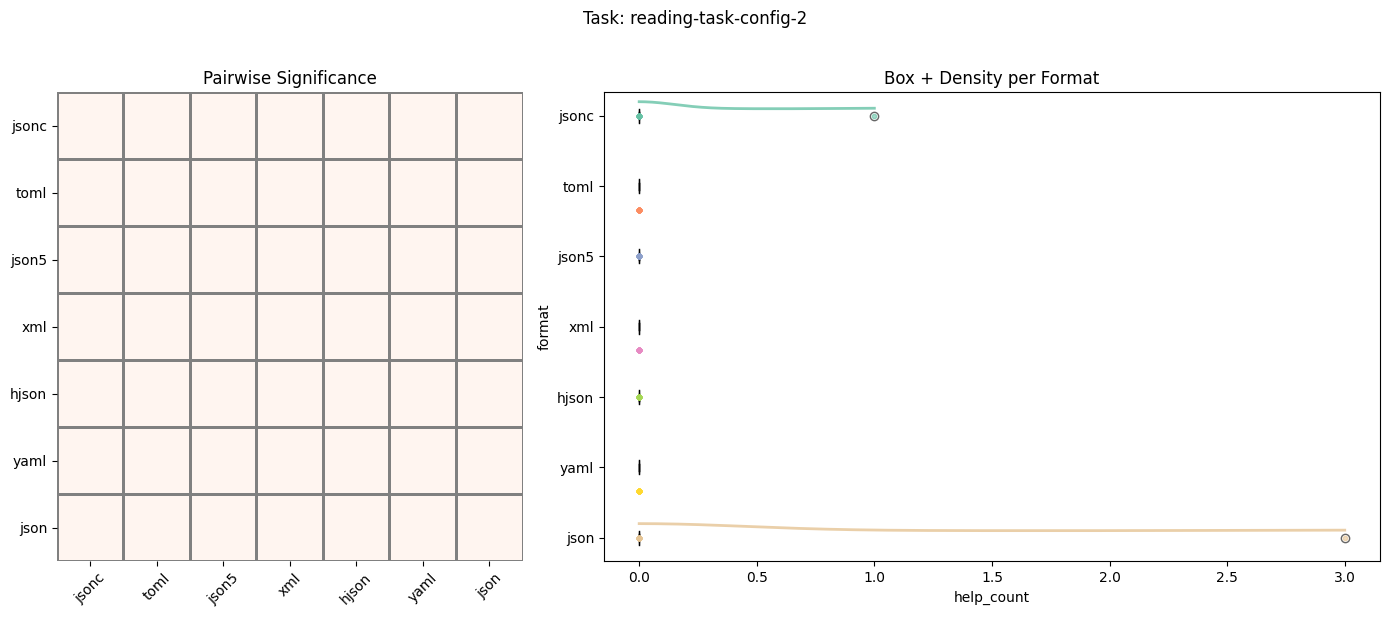

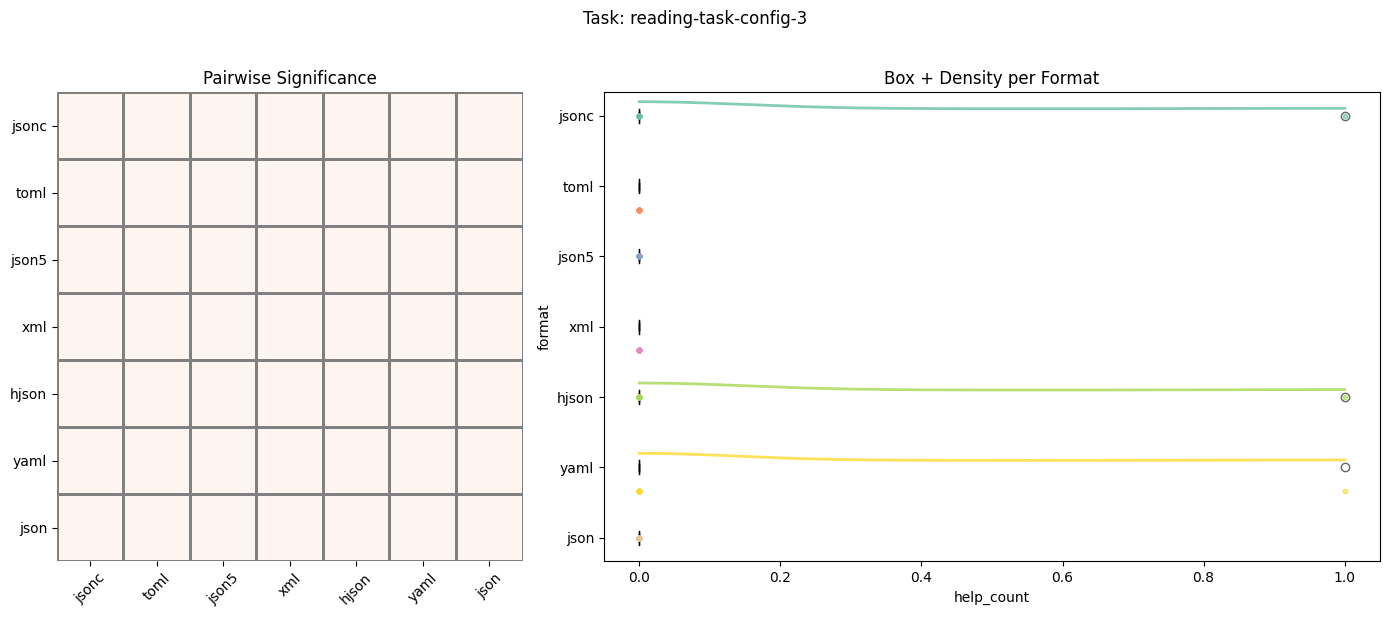

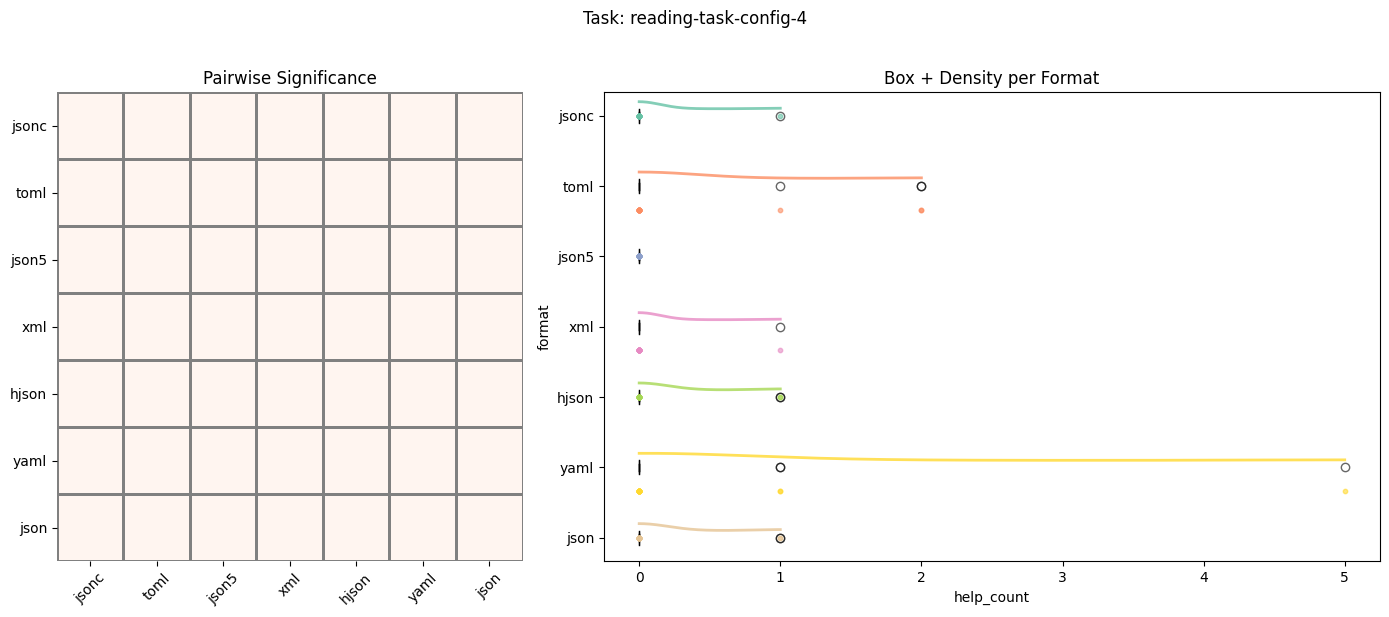

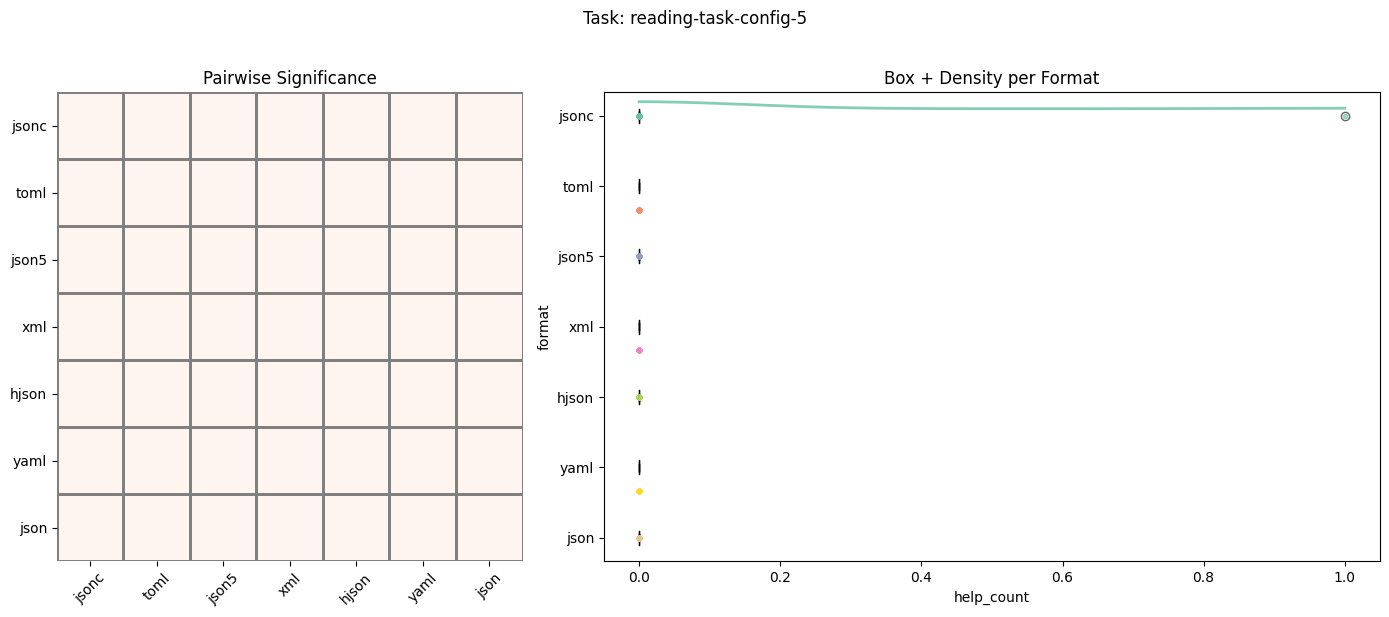

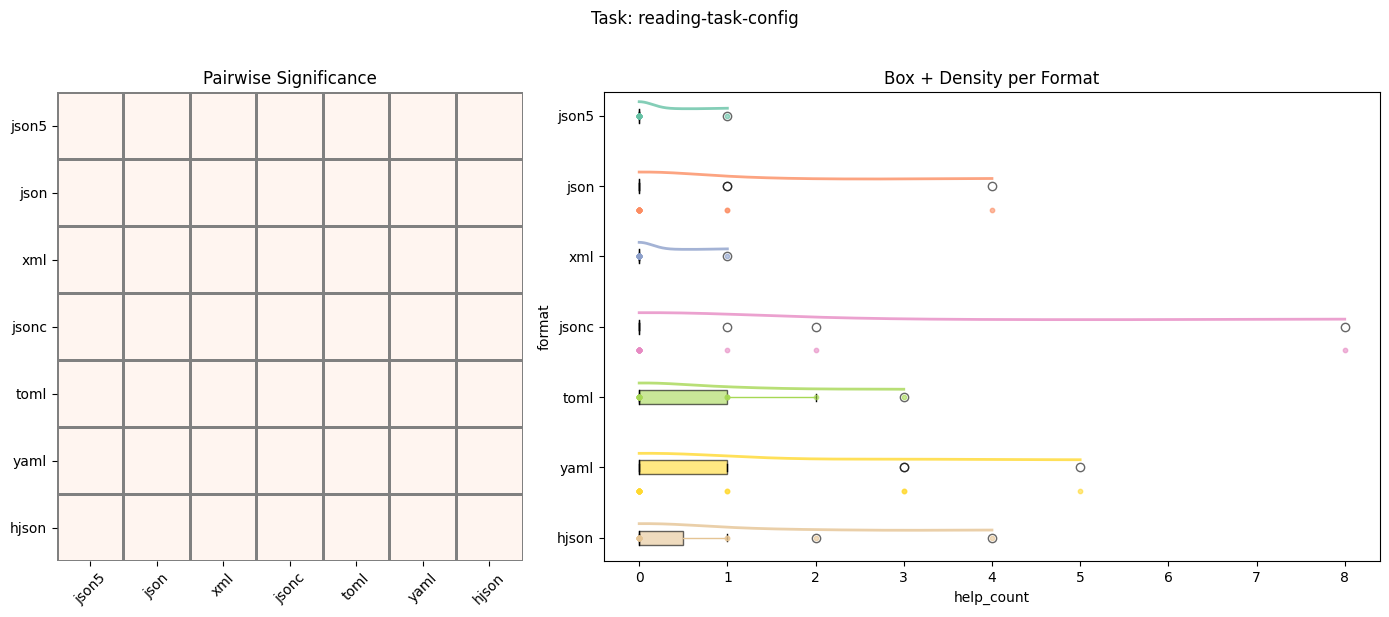

{'reading-task-config': {'method': 'anova',
  'alpha': 0.05,
  'p_adjust_method': 'bonferroni',
  'descriptive':         count      mean       std  median  min  max
  format                                             
  hjson      15  0.533333  1.125463     0.0    0    4
  json       15  0.400000  1.055597     0.0    0    4
  json5      15  0.066667  0.258199     0.0    0    1
  jsonc      15  0.733333  2.086236     0.0    0    8
  toml       15  0.533333  0.915475     0.0    0    3
  xml        15  0.066667  0.258199     0.0    0    1
  yaml       17  0.764706  1.480262     0.0    0    5,
  'overall_p': 0.5129258954859762,
  'effect_size': 0.05012251857264644,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: [],
  'warning': None},
 'reading-task-config-1': {'method': 'anova',
  'alpha': 0.05,
  'p_adjust_method': 'bonferroni',
  'descriptive':         count      mean       std  median  min  max
  form

In [9]:
## reading_task

vis_box_comparasion(
    df_reading_clean,
    group_col='format',
    value_col='help_count',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task',
    # # discrete_tasks=['reading-task-config-1','reading-task-config-2'],
    continuous_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5','reading-task']
)

results = compare_statistically(
    df_reading_clean,
    group_col='format',
    value_col='help_count',
    method='anova',
    task_col='task',
    # # discrete_tasks=['reading-task-config-1','reading-task-config-2'],
    continuous_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5','reading-task']
)

results

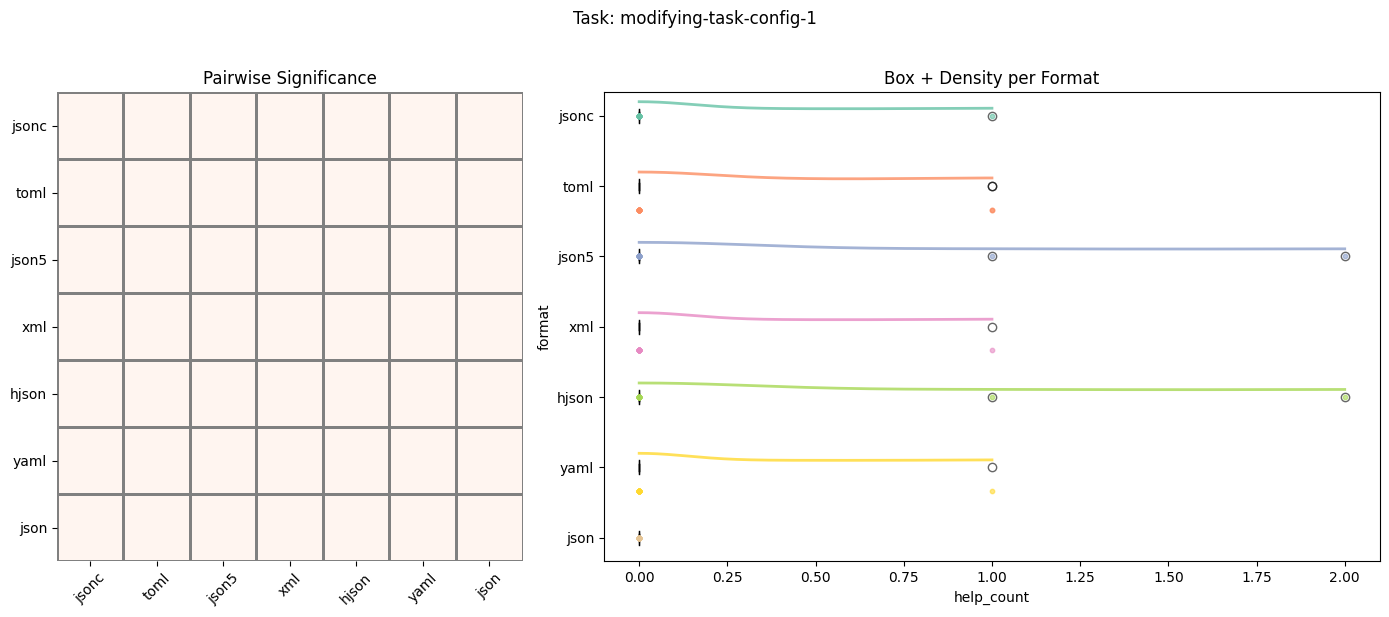

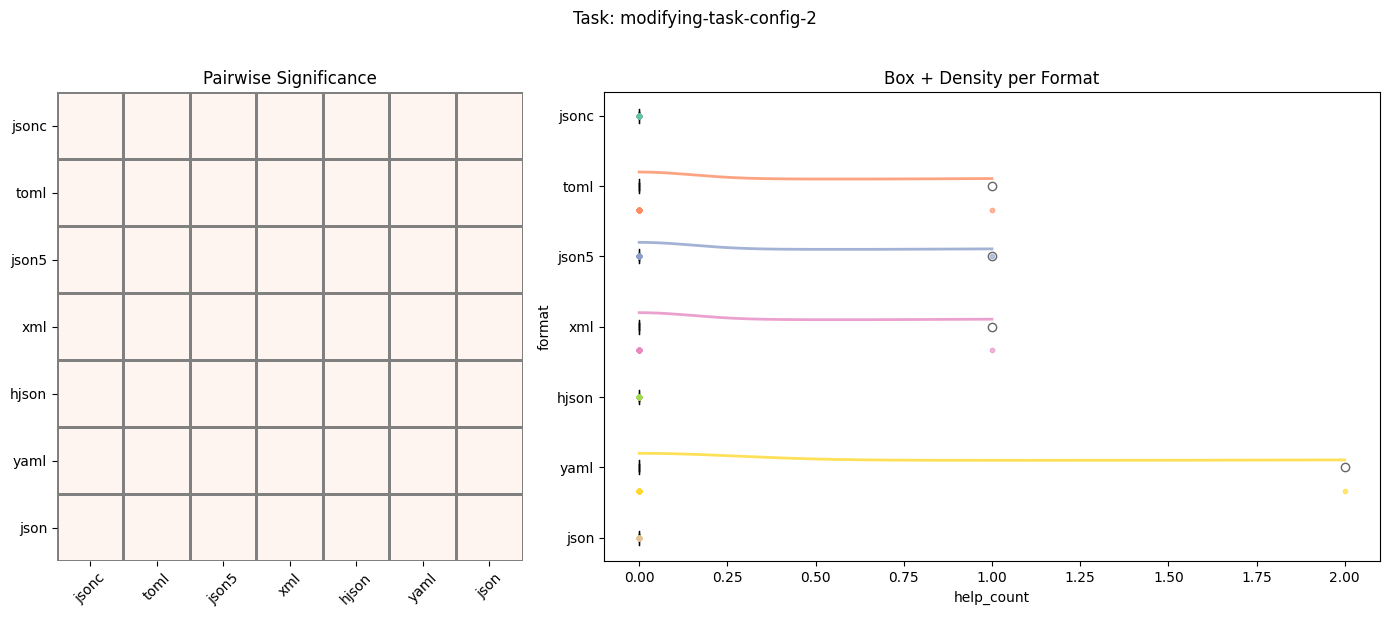

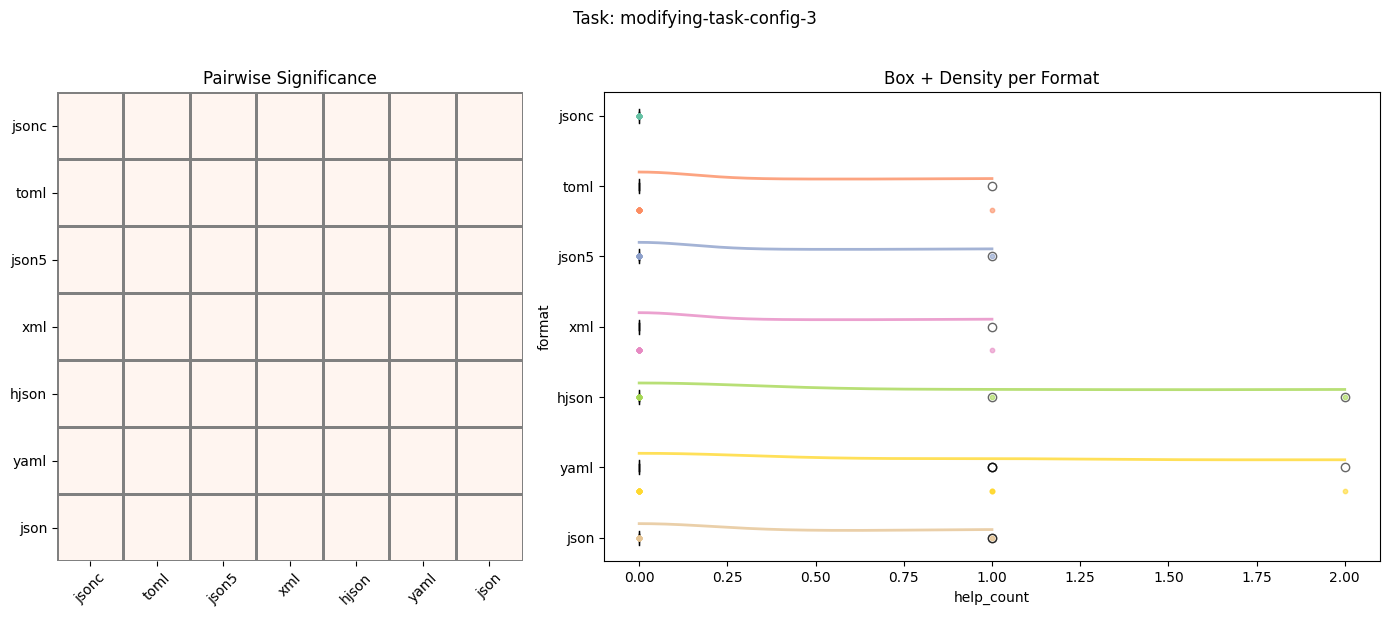

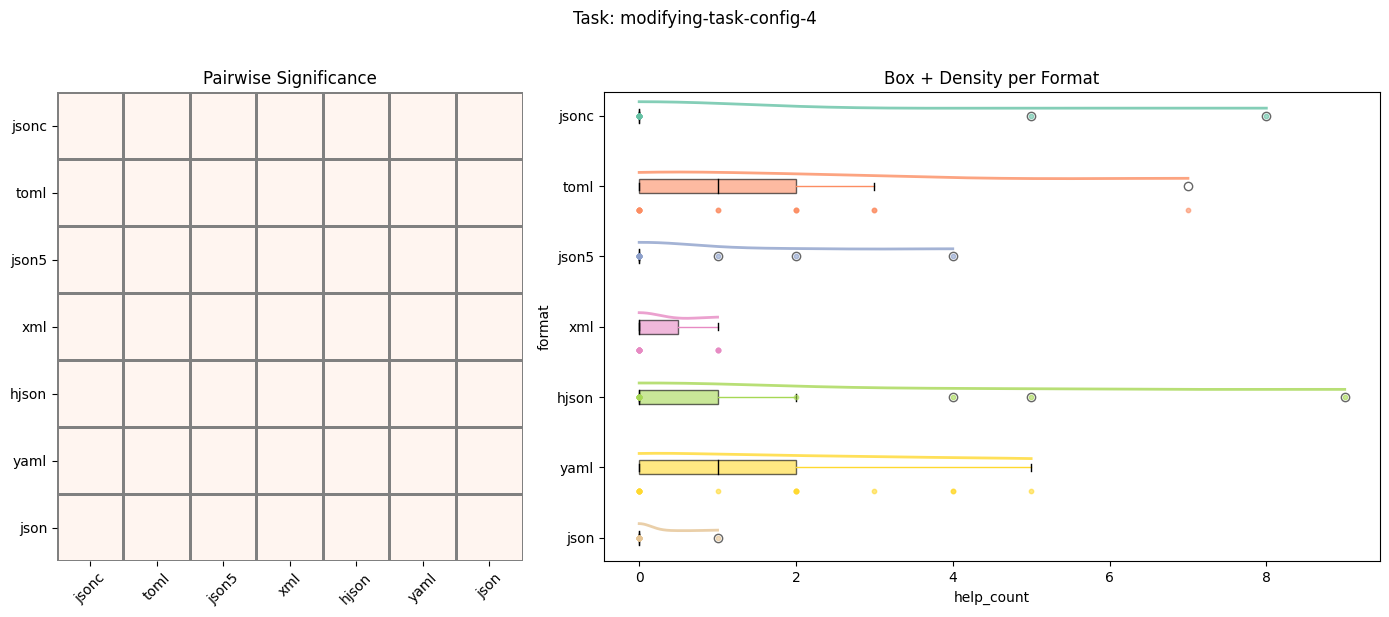

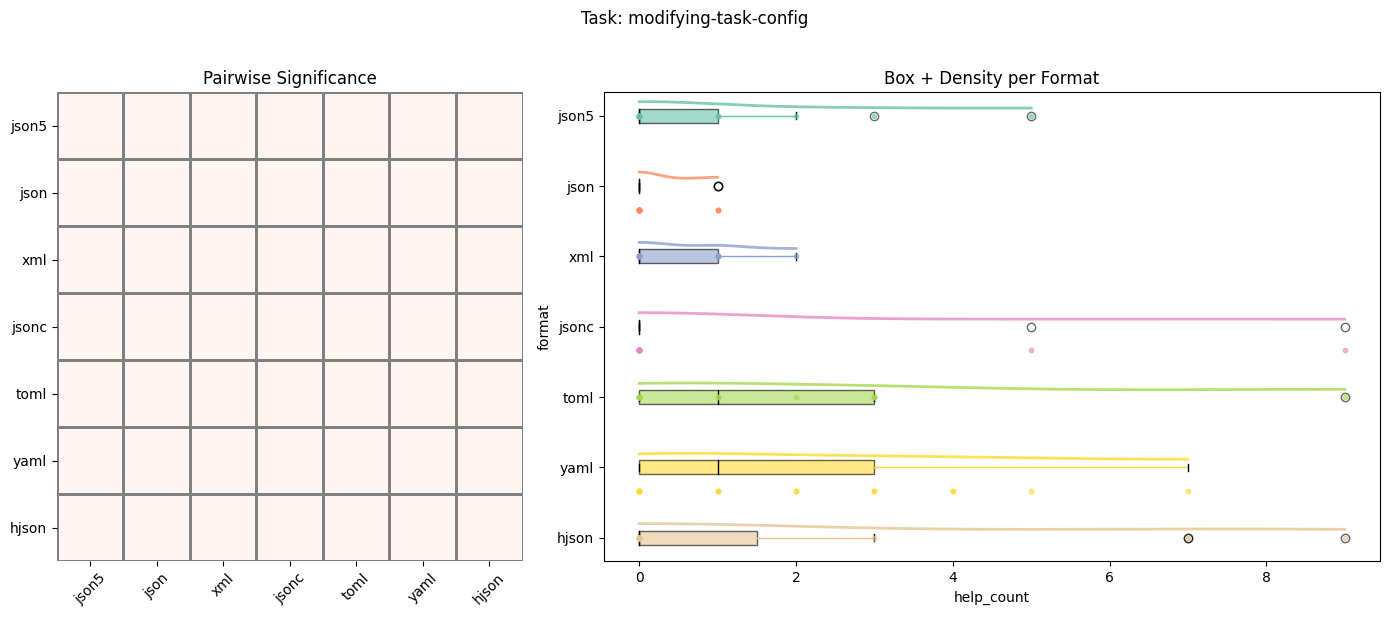

{'modifying-task-config': {'method': 'anova',
  'alpha': 0.05,
  'p_adjust_method': 'bonferroni',
  'descriptive':         count      mean       std  median  min  max
  format                                             
  hjson      15  1.733333  3.195235     0.0    0    9
  json       15  0.200000  0.414039     0.0    0    1
  json5      15  0.800000  1.473577     0.0    0    5
  jsonc      15  0.933333  2.576450     0.0    0    9
  toml       15  1.666667  2.410295     1.0    0    9
  xml        15  0.466667  0.639940     0.0    0    2
  yaml       17  1.941176  2.105665     1.0    0    7,
  'overall_p': 0.1362211830506863,
  'effect_size': 0.09106130944852256,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: [],
  'warning': None},
 'modifying-task-config-1': {'method': 'anova',
  'alpha': 0.05,
  'p_adjust_method': 'bonferroni',
  'descriptive':         count      mean       std  median  min  max
  

In [10]:
## modifying tasks
vis_box_comparasion(
    df_modifying_clean,
    group_col='format',
    value_col='help_count',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task',
    # discrete_tasks=['reading-task-config-1','reading-task-config-2'],
    continuous_tasks=['modifying-task-config-1','modifying-task-config-2','modifying-task-config-3','modifying-task-config-4', 'modifying-task']
)

results = compare_statistically(
    df_modifying_clean,
    group_col='format',
    value_col='help_count',
    method='anova',
    task_col='task',
    # discrete_tasks=['reading-task-config-1','reading-task-config-2'],
    continuous_tasks=['modifying-task-config-1','modifying-task-config-2','modifying-task-config-3','modifying-task-config-4', 'modifying-task']
)

results

In [11]:
sig_pairs = compare_significant_pairs(
    df_writing_norm,
    group_col='format',
    value_col='normalized_time',
    method='anova',
    task_col=None
)
print(sig_pairs)


# 多任务，返回 dict
sig_by_task = compare_significant_pairs(
    df_modifying_clean,
    group_col='format',
    value_col='help_count',
    method='anova',
    task_col='task',
    # discrete_tasks=['reading-task-config-1','reading-task-config-2'],
    continuous_tasks=['modifying-task-config-1','modifying-task-config-2','modifying-task-config-3','modifying-task-config-4', 'modifying-task']
)
for task, df_sig in sig_by_task.items():
    print(task, df_sig)

Empty DataFrame
Columns: [group1, group2, p_value, significant, interpretation]
Index: []
modifying-task-config-1 Empty DataFrame
Columns: [group1, group2, p_value, significant, interpretation]
Index: []
modifying-task-config-2 Empty DataFrame
Columns: [group1, group2, p_value, significant, interpretation]
Index: []
modifying-task-config-3 Empty DataFrame
Columns: [group1, group2, p_value, significant, interpretation]
Index: []
modifying-task-config-4 Empty DataFrame
Columns: [group1, group2, p_value, significant, interpretation]
Index: []
modifying-task-config Empty DataFrame
Columns: [group1, group2, p_value, significant, interpretation]
Index: []


## reading correctness analysis

In [12]:
correct_answers_tabular = {
    'reading-task-tabular-1': 87,
    'reading-task-tabular-2': 'quiz2',
    'reading-task-tabular-3': 4,
    'reading-task-tabular-4': 'Bob',
    'reading-task-tabular-5': ['[Bob, Eve]', '[Alice]']
}

correct_answers_config = {
    'reading-task-config-1': '7.9.0',
    'reading-task-config-2': ">=12",
    'reading-task-config-3': 6,
    'reading-task-config-4': 'keywords',
    'reading-task-config-5': 'd3-delaunay'
}


df_reading_result = annotate_reading_correctness_exact(
    df_reading,
    correct_answers_config,
    task_col='task',
    format_col='format',
    response_col='response'
)

df_reading_agg = aggregate_tasks_with_format(
    df_reading_result,
    participant_col='participantId',
    task_col='task',
    format_col = 'format',
    metrics=['duration_sec','help_count','correct']
)
df_reading_agg

participantId                   task format         response  \
0    67895b7d6400163124042af7  reading-task-config-1  jsonc            7.9.0   
1    67895b7d6400163124042af7  reading-task-config-2  jsonc               12   
2    67895b7d6400163124042af7  reading-task-config-3  jsonc                6   
3    67895b7d6400163124042af7  reading-task-config-4  jsonc  devDependencies   
4    67895b7d6400163124042af7  reading-task-config-5  jsonc         d3-scale   
..                        ...                    ...    ...              ...   
637  67f66486e35051403284eb5e    reading-task-config    xml              NaN   
638  680ebf035ab59d342f31726e    reading-task-config  hjson              NaN   
639  681374d36d7bd7ccb6f914f5    reading-task-config  json5              NaN   
640  68138e7f96395f4c5f3a0a87    reading-task-config   json              NaN   
641  6818ca1523ece90f671e3601    reading-task-config   json              NaN   

       start_time      end_time  duration_sec  help_count correct_answer  \
0    1.747336e+12  1.747336e+12        65.634           0          7.9.0   
1    1.747336e+12  1.747336e+12        68.938           0           >=12   
2    1.747336e+12  1.747336e+12        35.185           0              6   
3    1.747336e+12  1.747336e+12        74.699           0       keywords   
4    1.747336e+12  1.747336e+12        30.321           0    d3-delaunay   
..            ...           ...           ...         ...            ...   
637           NaN           NaN       722.635           0            NaN   
638           NaN           NaN       393.819           0            NaN   
639           NaN           NaN       159.182           0            NaN   
640           NaN           NaN       176.875           0            NaN   
641           NaN           NaN       456.023           0            NaN   

     correct  
0          1  
1          0  
2          1  
3          0  
4          0  
..       ...  
637        2  
638        5  
639        4  
640        4  
641        5  

[642 rows x 10 columns]

In [13]:
## reading tasks
vis_box_comparasion(
    df_reading_agg,
    group_col='format',
    value_col='correct',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task',
    discrete_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5'],
    continuous_tasks=['reading-task']
)

results = compare_statistically(
    df_reading_agg,
    group_col='format',
    value_col='correct',
    method='anova',
    task_col='task',
    discrete_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5'],
    continuous_tasks=['reading-task']
)

results

KeyError: "None of [Index(['reading-task-config-1', 'reading-task-config-2',\n       'reading-task-config-3', 'reading-task-config-4',\n       'reading-task-config-5'],\n      dtype='object')] are in the [columns]"

In [19]:
sig_by_task = compare_significant_pairs(
    df_reading_agg,
    group_col='format',
    value_col='correct',
    method='anova',
    task_col='task',
    discrete_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5'],
    continuous_tasks=['reading-task']
)
for task, df_sig in sig_by_task.items():
    print(task, df_sig)

reading-task-config-1   group1 group2  p_value  significant               interpretation
0  hjson    xml      0.0         True  hjson vs xml is significant
1   json    xml      0.0         True   json vs xml is significant
2  json5    xml      0.0         True  json5 vs xml is significant
3  jsonc    xml      0.0         True  jsonc vs xml is significant
4   toml    xml      0.0         True   toml vs xml is significant
5    xml   yaml      0.0         True   xml vs yaml is significant
reading-task-config-2 Empty DataFrame
Columns: [group1, group2, p_value, significant, interpretation]
Index: []
reading-task-config-3 Empty DataFrame
Columns: [group1, group2, p_value, significant, interpretation]
Index: []
reading-task-config-4 Empty DataFrame
Columns: [group1, group2, p_value, significant, interpretation]
Index: []
reading-task-config-5   group1 group2  p_value  significant                interpretation
0  jsonc   toml   0.0101         True  jsonc vs toml is significant
1  jsonc   yaml

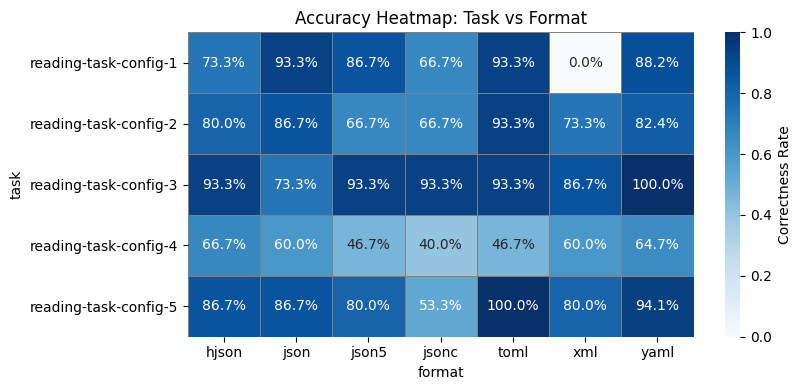

In [20]:
# 只看 task1, task3, task5 三个任务：
visualize_accuracy_heatmap(
    df_reading_agg,
    task_col='task',
    format_col='format',
    accuracy_col='correct',
    task_list=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4','reading-task-config-5'],
    cmap='Blues',
    annot=True,
    fmt='.1%', 
    cbar_label='Correctness Rate'
)

# # 只看 yaml 和 xml 两种格式：
# visualize_accuracy_heatmap(
#     df_reading_clean,
#     task_col='task',
#     format_col='format',
#     accuracy_col='correctness',
#     format_list=['yaml','xml'],
#     cmap='YlGnBu'
# )

# # 既过滤任务，也过滤格式
# visualize_accuracy_heatmap(
#     df_reading_clean,
#     task_col='task',
#     format_col='format',
#     accuracy_col='correctness',
#     task_list=['reading-task-config-2','reading-task-config-4'],
#     format_list=['json','json5'],
#     cmap='Purples'
# )


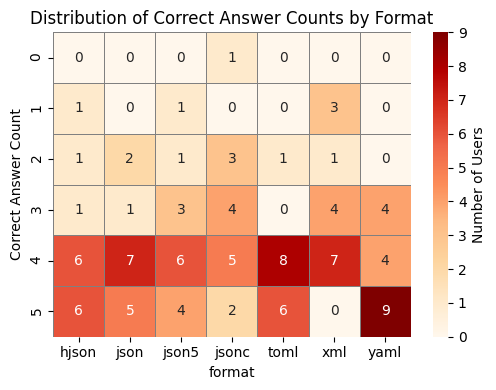

In [21]:
visualize_score_distribution_heatmap(
    df_reading_result,
    participant_col='participantId',
    task_col='task',
    format_col='format',
    correct_col='correct',
    cmap='OrRd',
    annot=True,
    fmt='d',
    cbar_label='Number of Users'
)


## post task question analysis

In [22]:
df_post = extract_post_task_questions(all_data)
df_post

participantId format                     task      startTime  \
0     67895b7d6400163124042af7  jsonc          writing-task-NL  1747334653715   
1     67895b7d6400163124042af7  jsonc    reading-task-config-1  1747335948071   
2     67895b7d6400163124042af7  jsonc    reading-task-config-2  1747336025084   
3     67895b7d6400163124042af7  jsonc    reading-task-config-3  1747336067277   
4     67895b7d6400163124042af7  jsonc    reading-task-config-4  1747336151419   
...                        ...    ...                      ...            ...   
1172  5c4f5967aac8be0001716a65    xml      writing-task-config  1747173781537   
1173  5c4f5967aac8be0001716a65    xml  modifying-task-config-1  1747173847397   
1174  5c4f5967aac8be0001716a65    xml  modifying-task-config-2  1747173974045   
1175  5c4f5967aac8be0001716a65    xml  modifying-task-config-3  1747174006978   
1176  5c4f5967aac8be0001716a65    xml  modifying-task-config-4  1747174509840   

            endTime  duration_sec  difficulty  confidence  
0     1747334665864        12.149           4           4  
1     1747335955384         7.313           6           4  
2     1747336031368         6.284           7           3  
3     1747336075982         8.705           6           4  
4     1747336156501         5.082           6           4  
...             ...           ...         ...         ...  
1172  1747173788748         7.211           5           3  
1173  1747173852481         5.084           2           6  
1174  1747173978512         4.467           3           5  
1175  1747174009899         2.921           1           5  
1176  1747174514665         4.825           4           3  

[1177 rows x 8 columns]

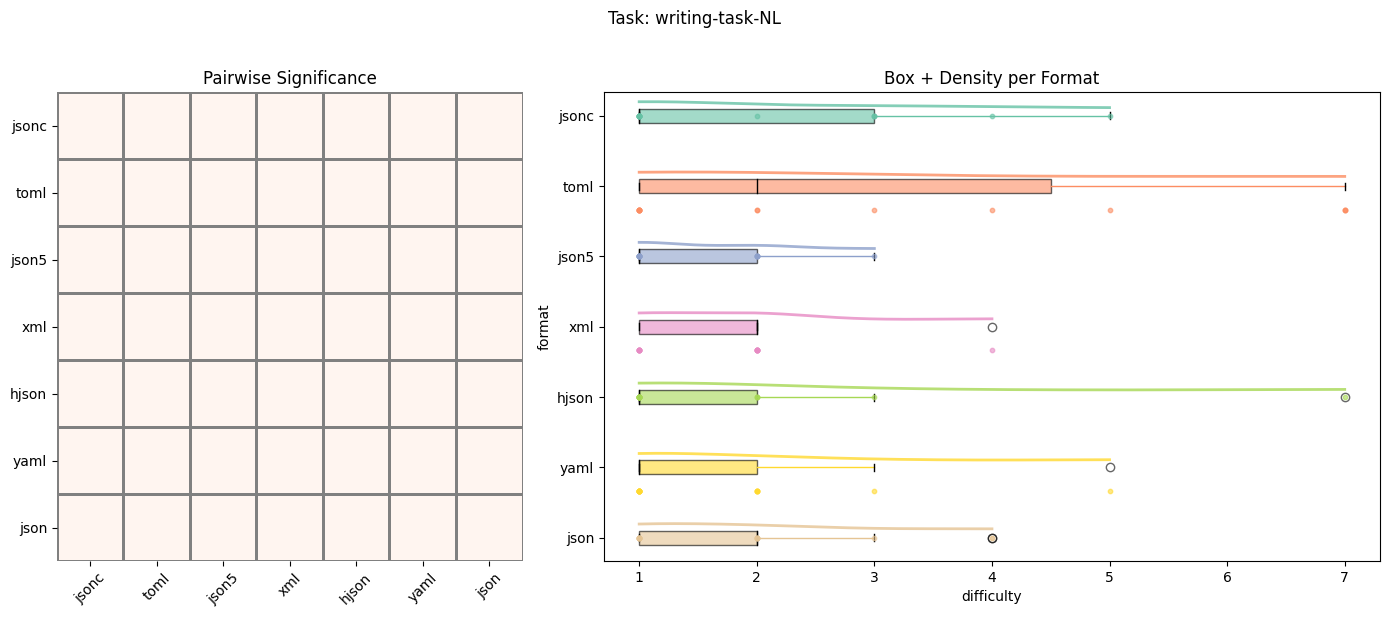

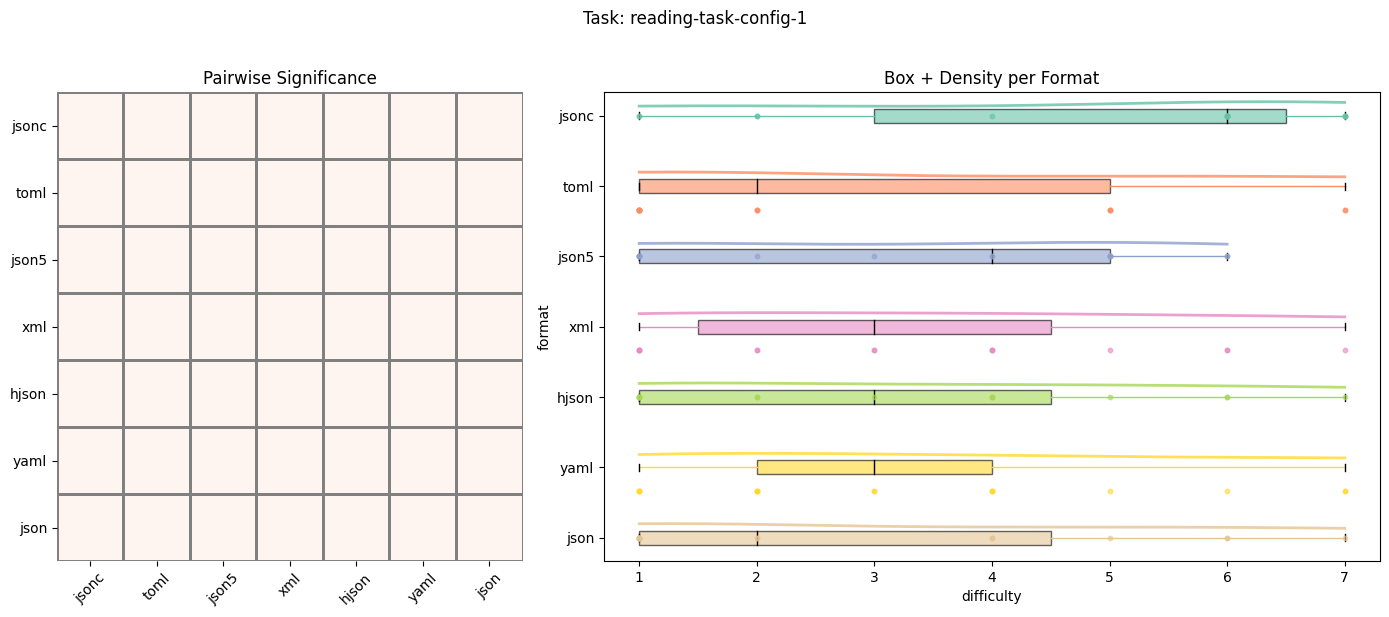

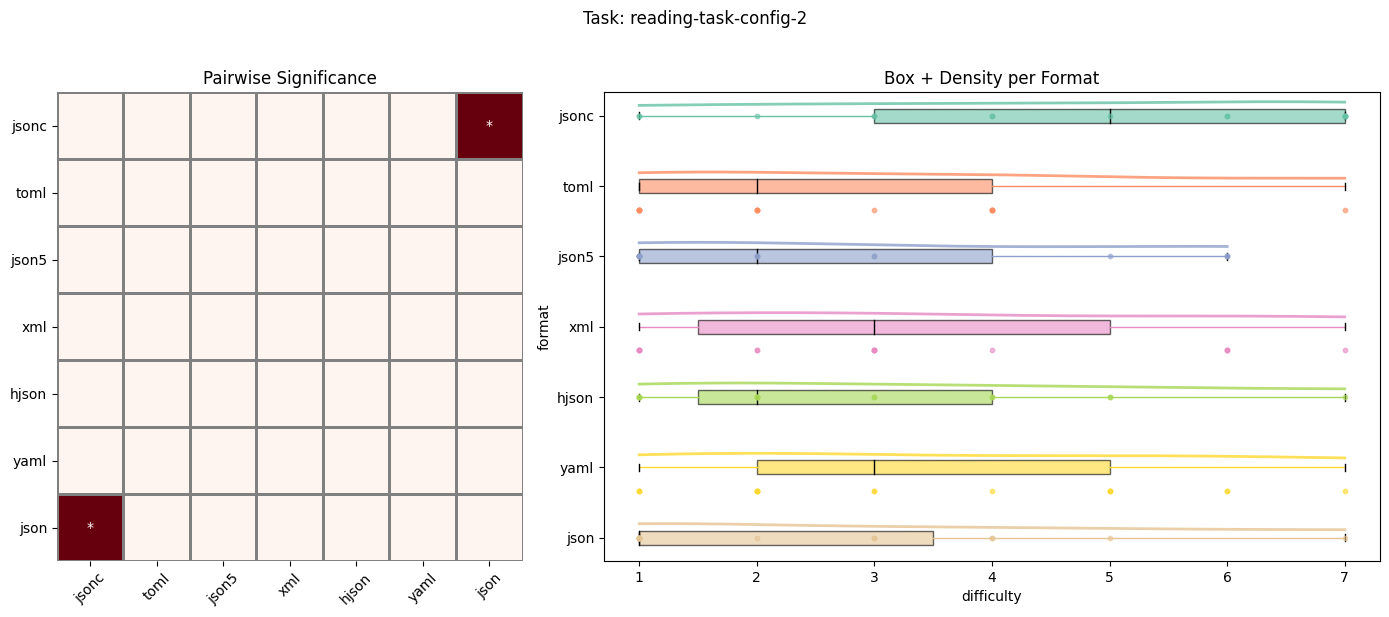

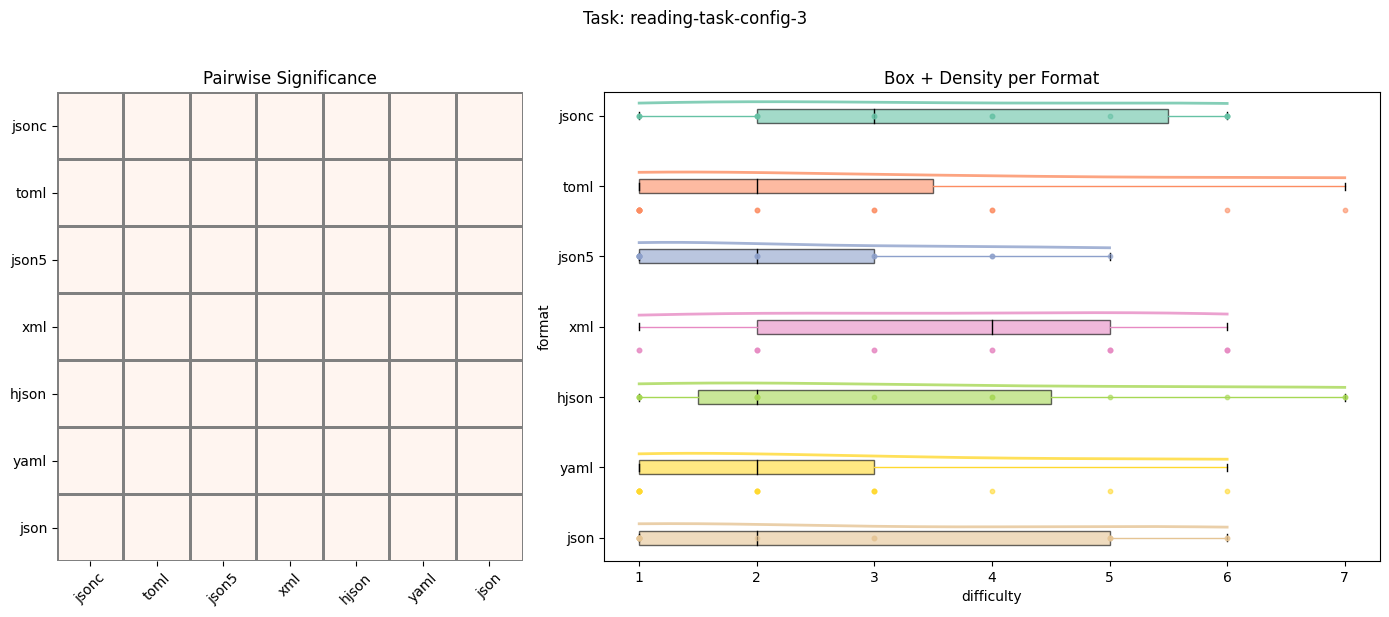

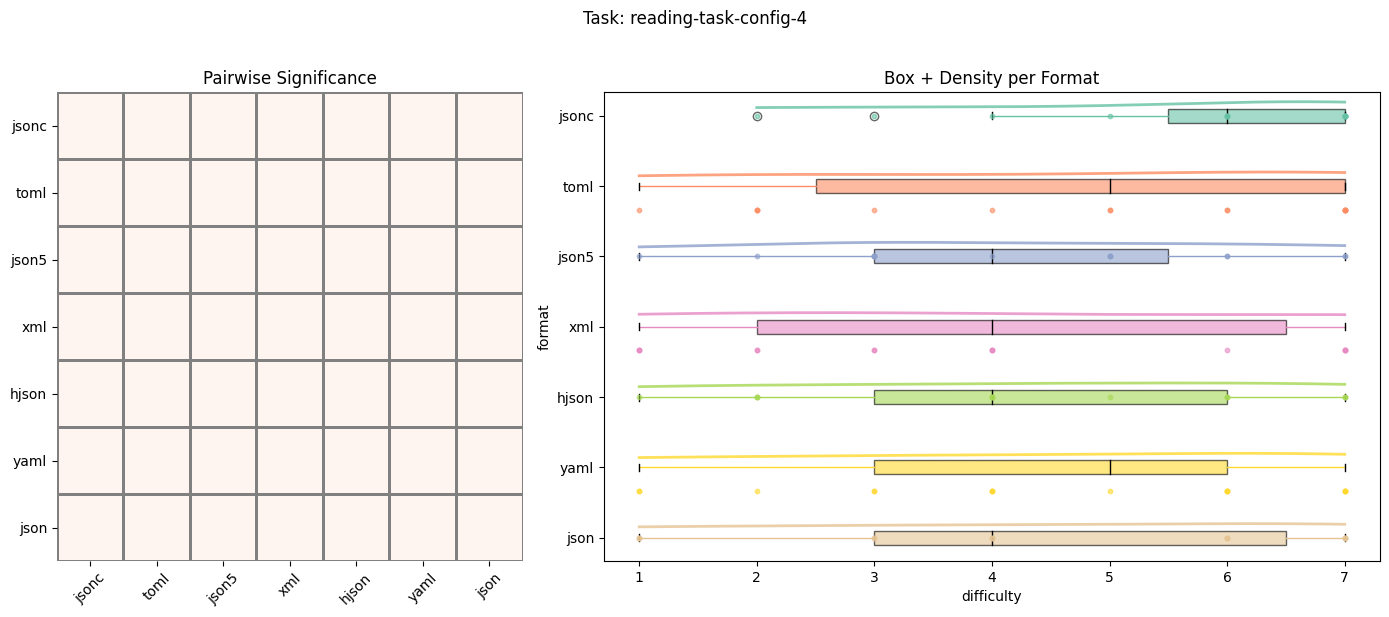

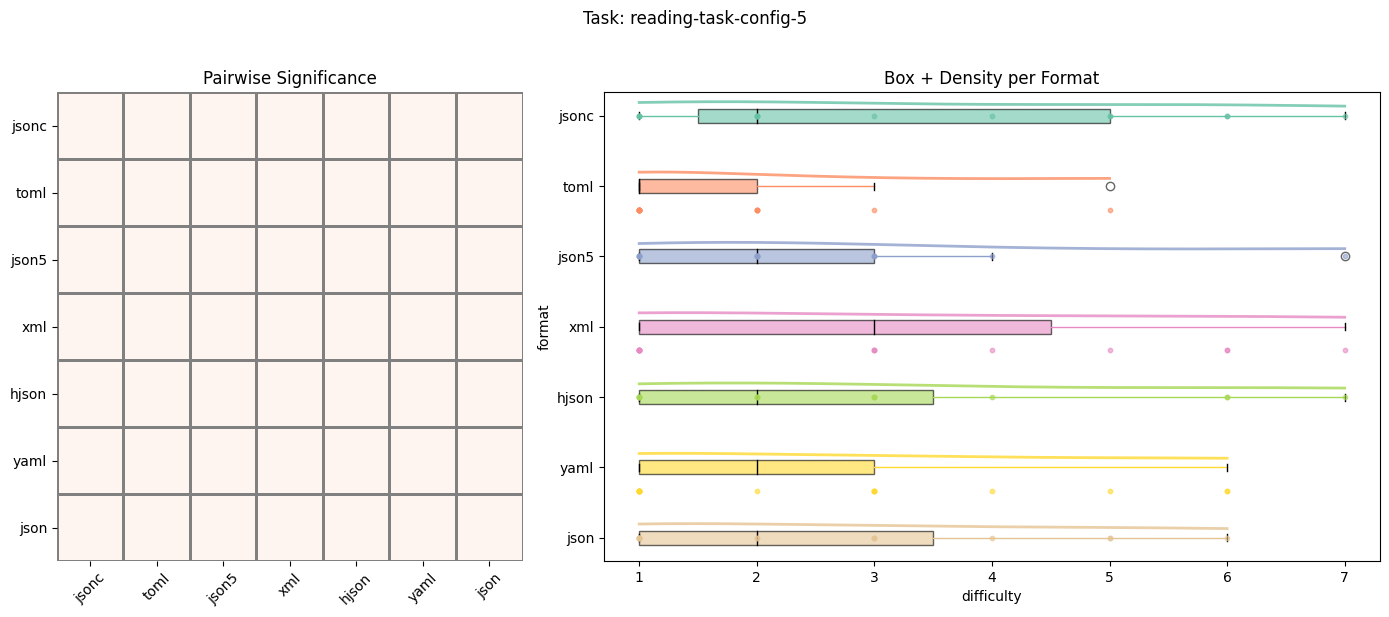

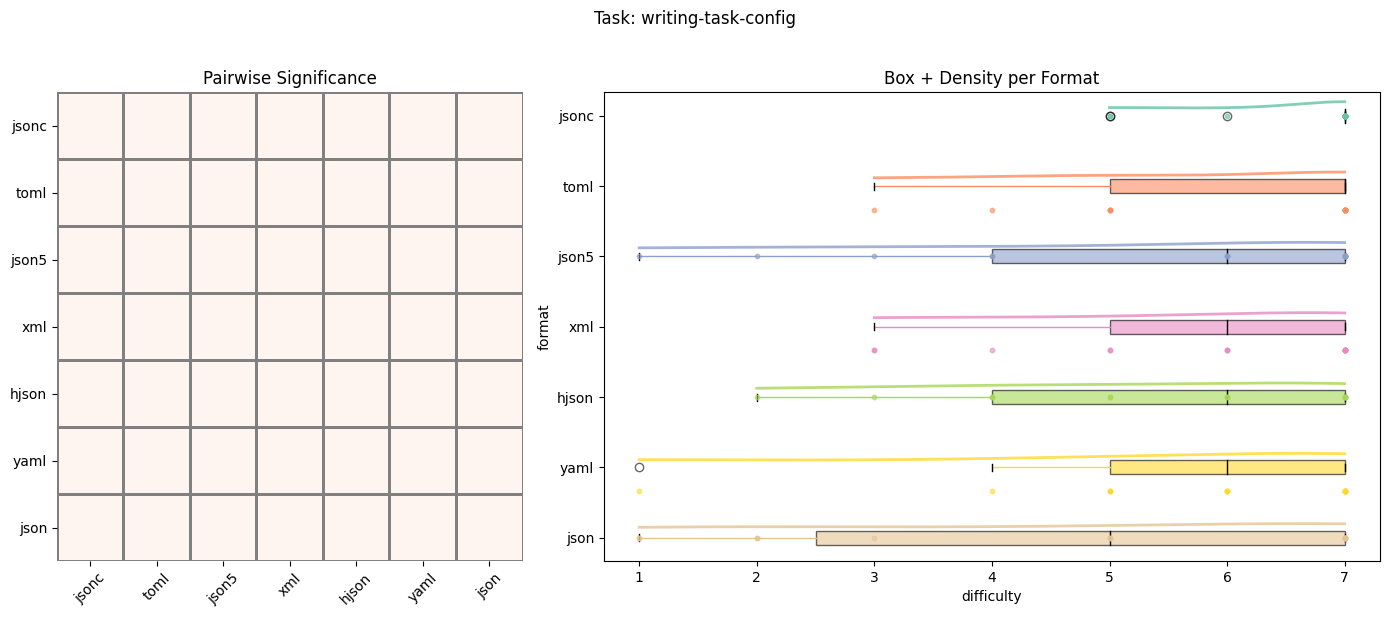

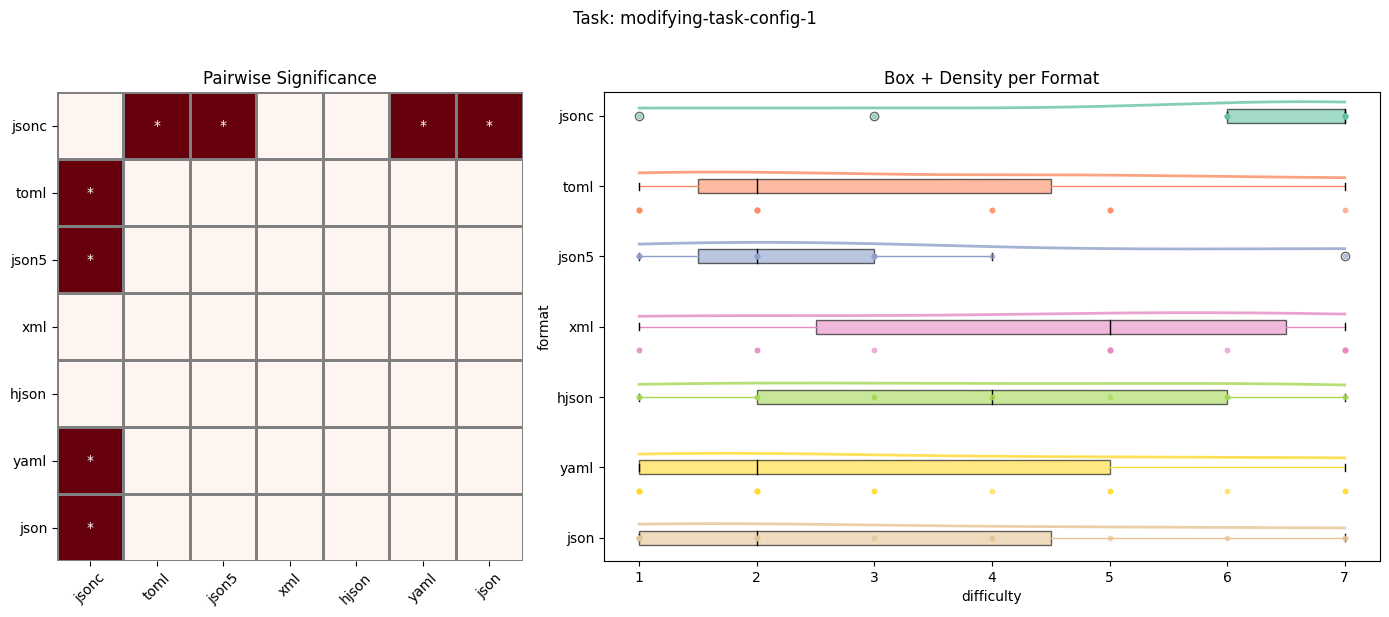

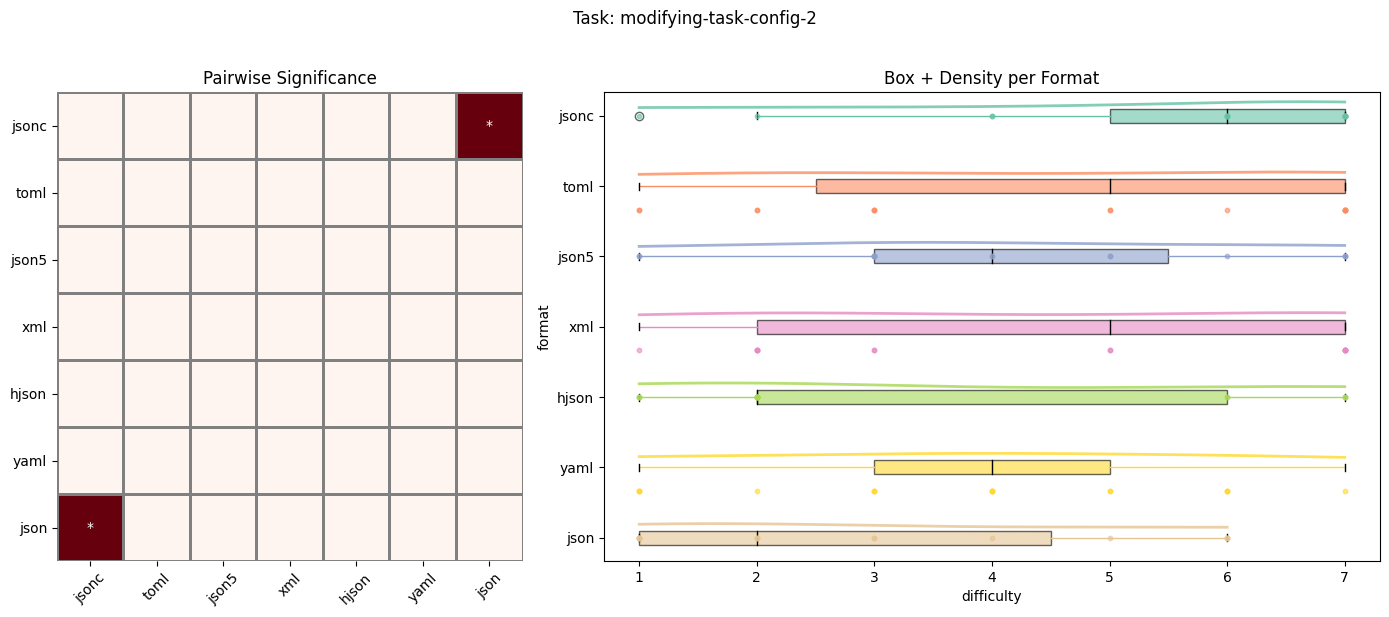

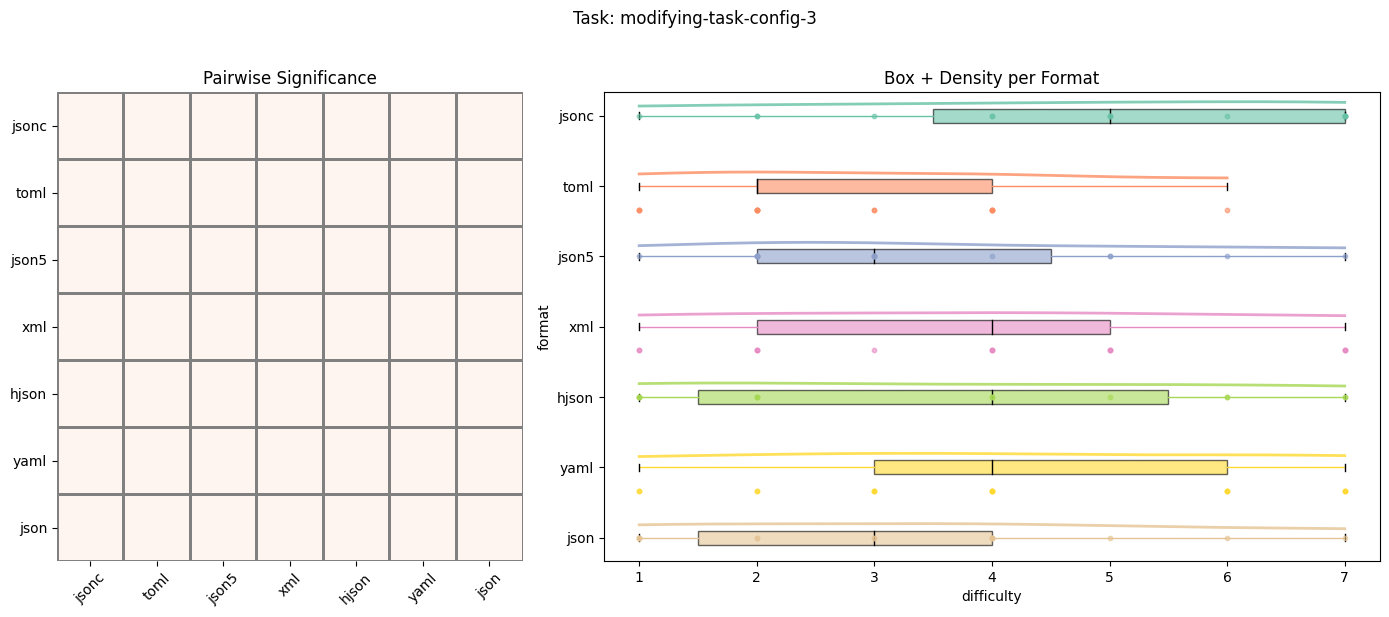

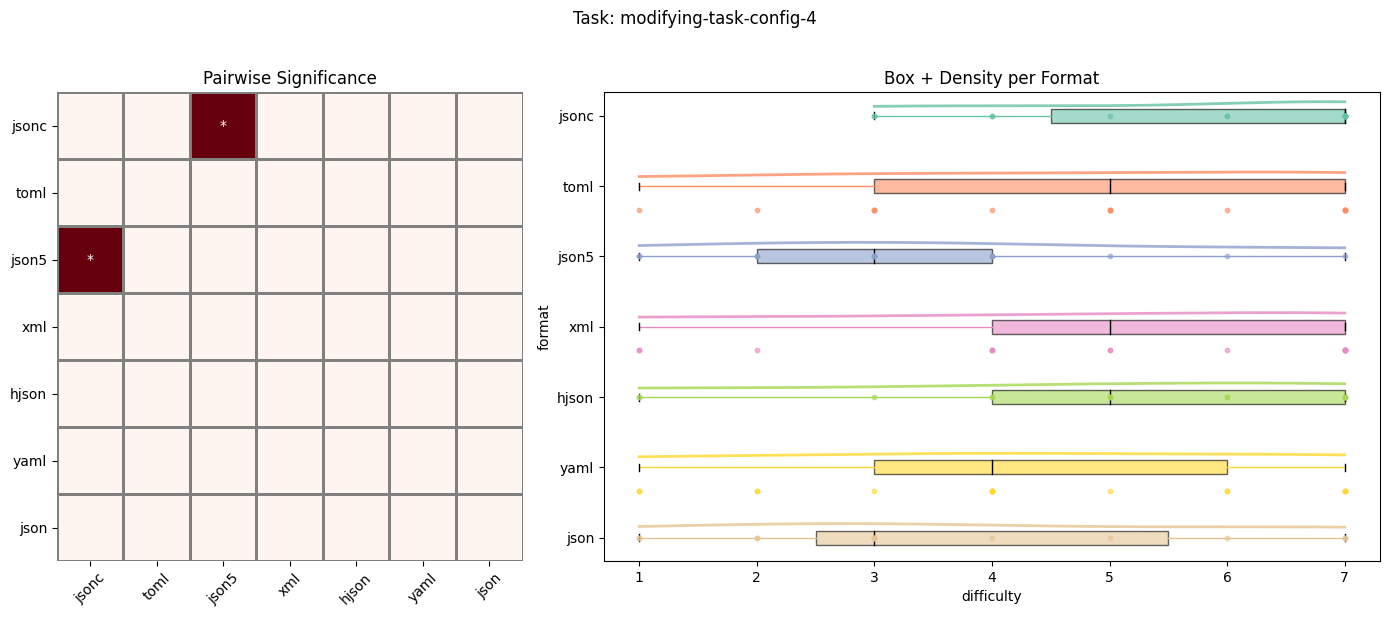

{'writing-task-NL': {'method': 'anova',
  'overall_p': 0.0983165049961158,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: []},
 'reading-task-config-1': {'method': 'anova',
  'overall_p': 0.13536176709805803,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: []},
 'reading-task-config-2': {'method': 'anova',
  'overall_p': 0.04532973563387733,
  'is_significant': True,
  'pairwise':    group1 group2  p_value  significant                     interpretation
  0   hjson   json   0.9949        False   hjson vs json is not significant
  1   hjson  json5   1.0000        False  hjson vs json5 is not significant
  2   hjson  jsonc   0.1696        False  hjson vs jsonc is not significant
  3   hjson   toml   0.9998        False   hjson vs toml is not significant
  4   hjson    xml   0.9978        False    hjson vs xml is not signi

In [23]:
## reading tasks
vis_box_comparasion(
    df_post,
    group_col='format',
    value_col='difficulty',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task'
    # discrete_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5'],
    # continuous_tasks=['reading-task']
)

results = compare_statistically(
    df_post,
    group_col='format',
    value_col='difficulty',
    method='anova',
    task_col='task'
    # discrete_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5'],
    # continuous_tasks=['reading-task']
)

results

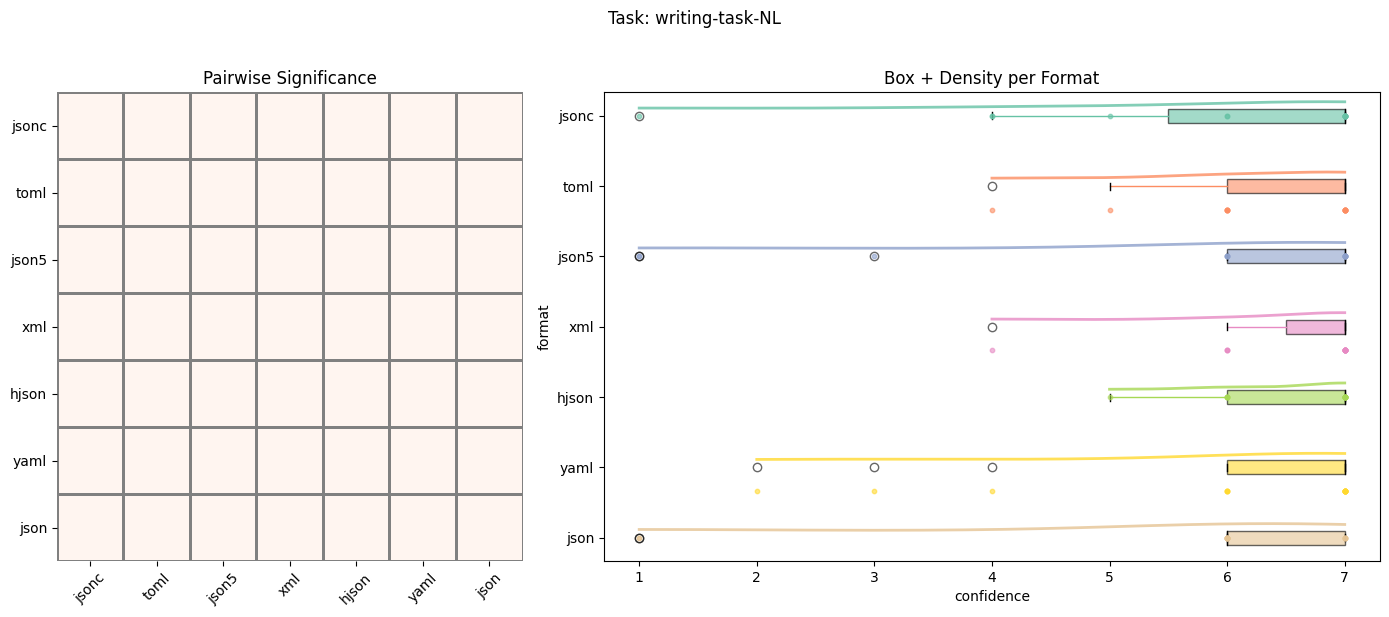

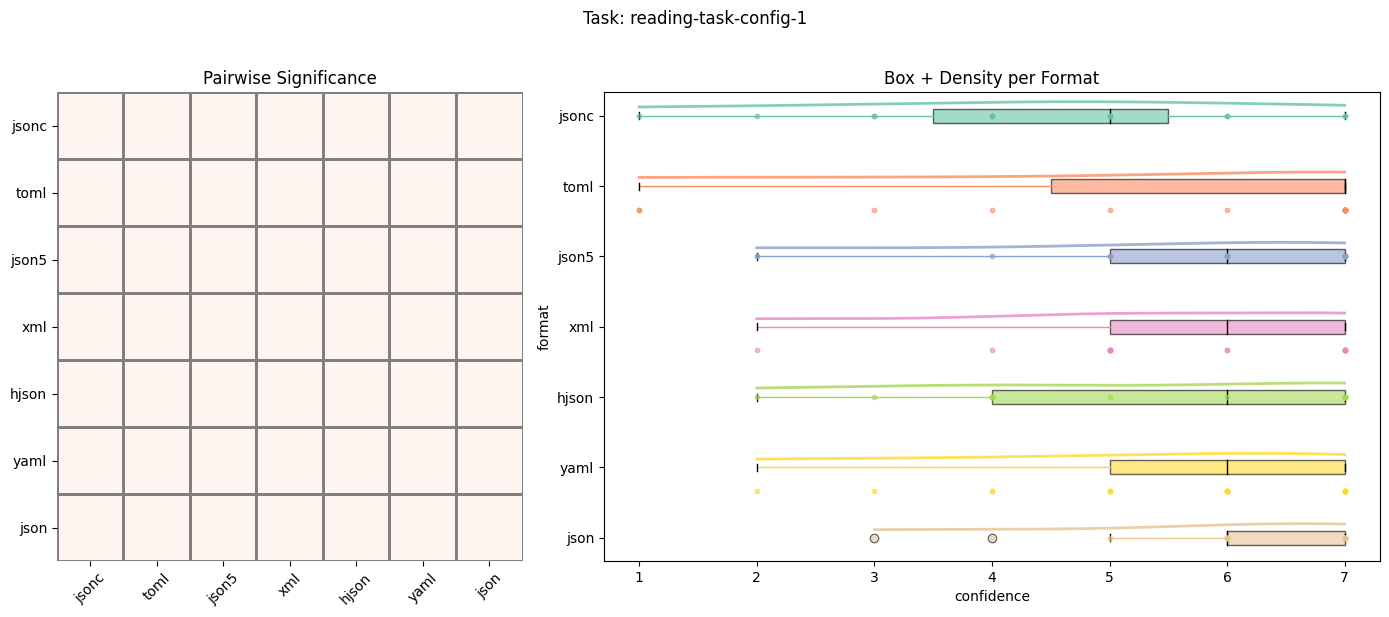

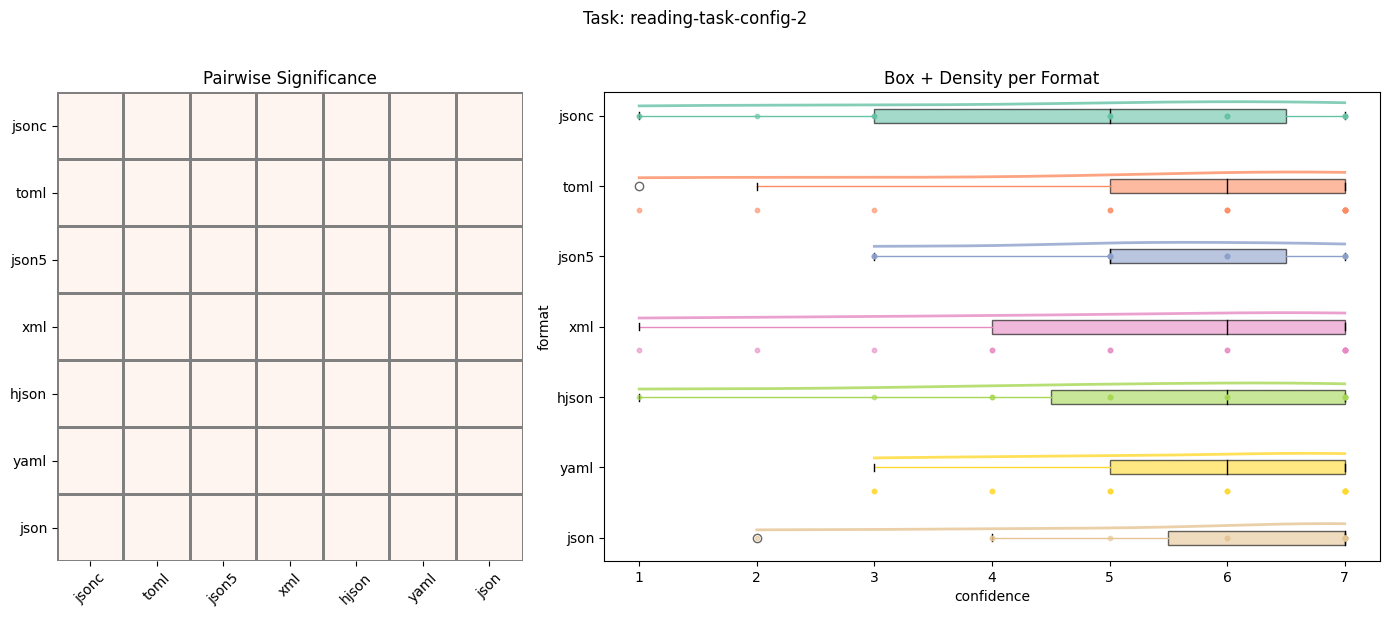

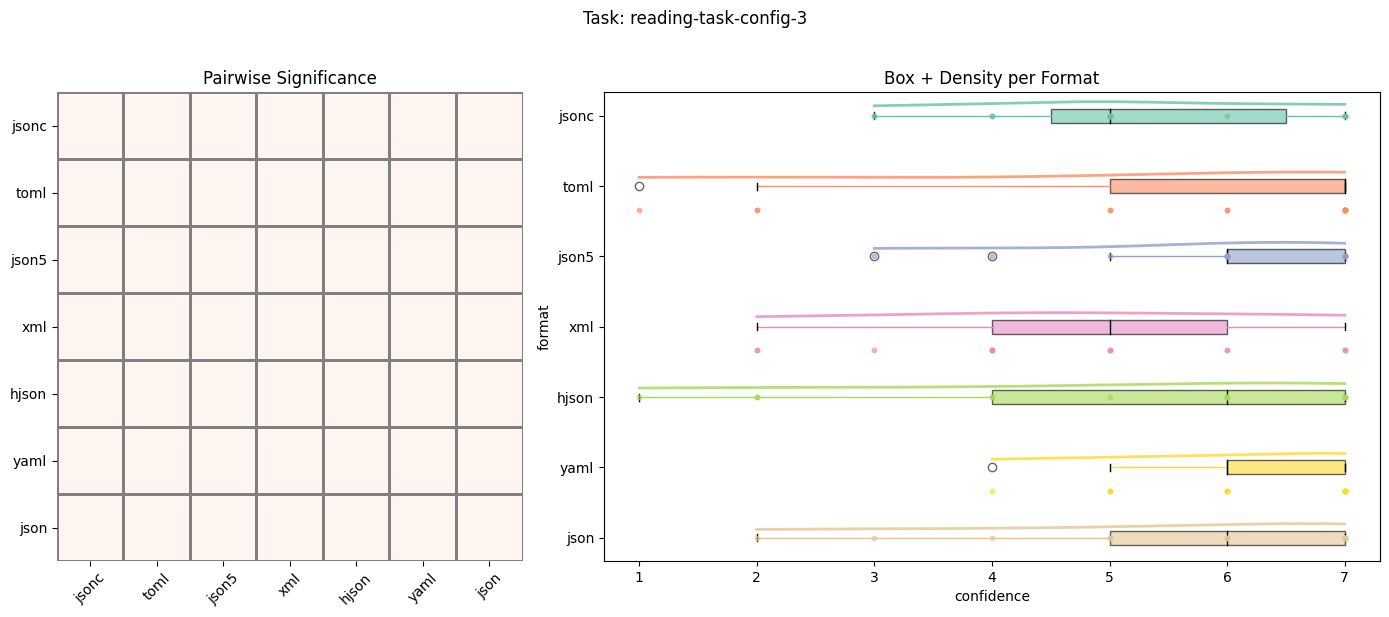

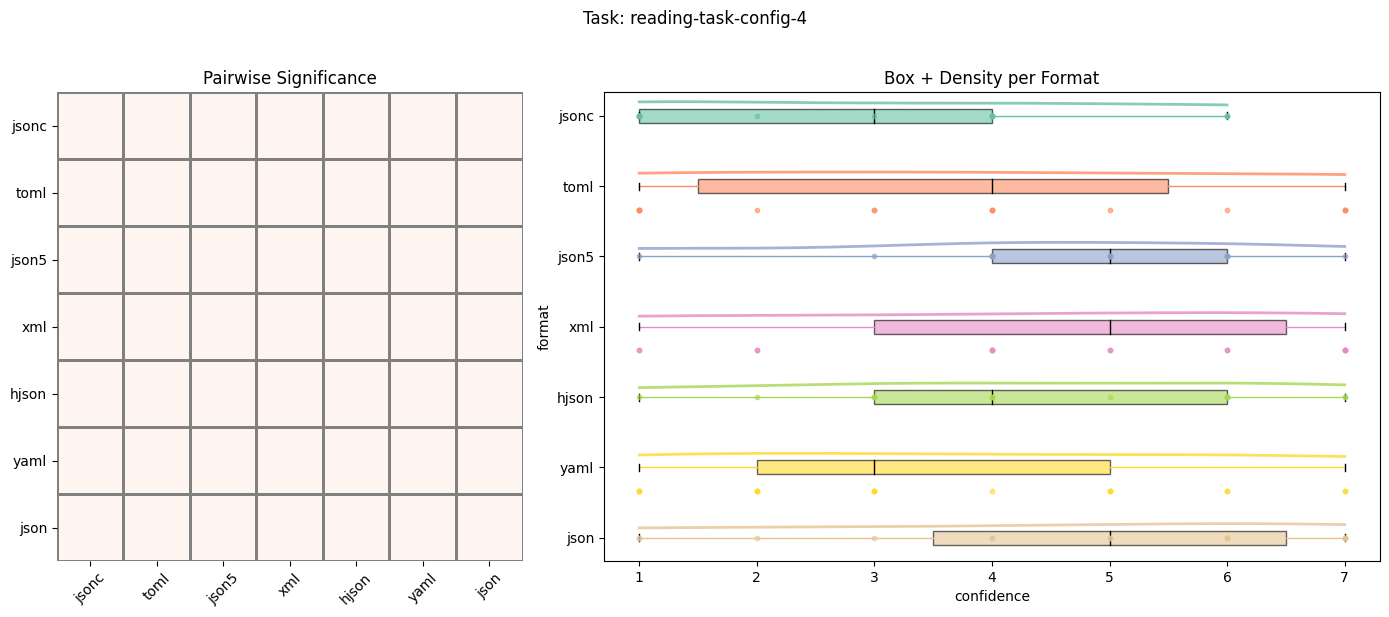

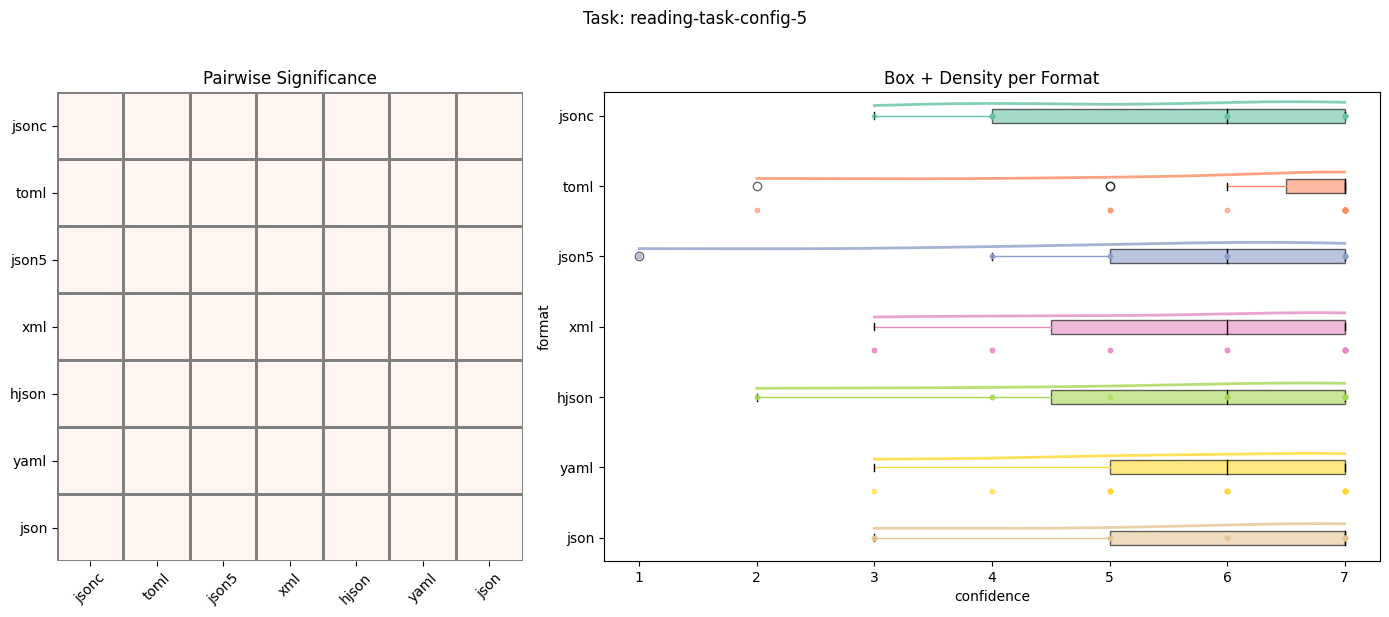

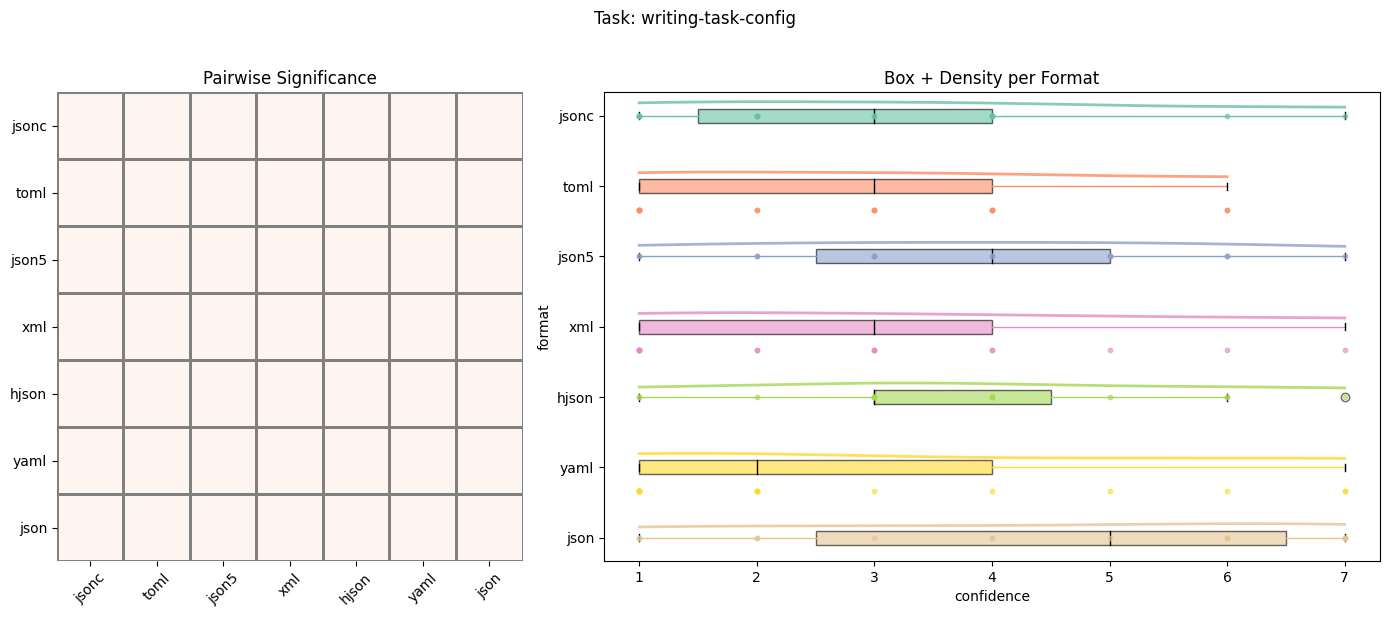

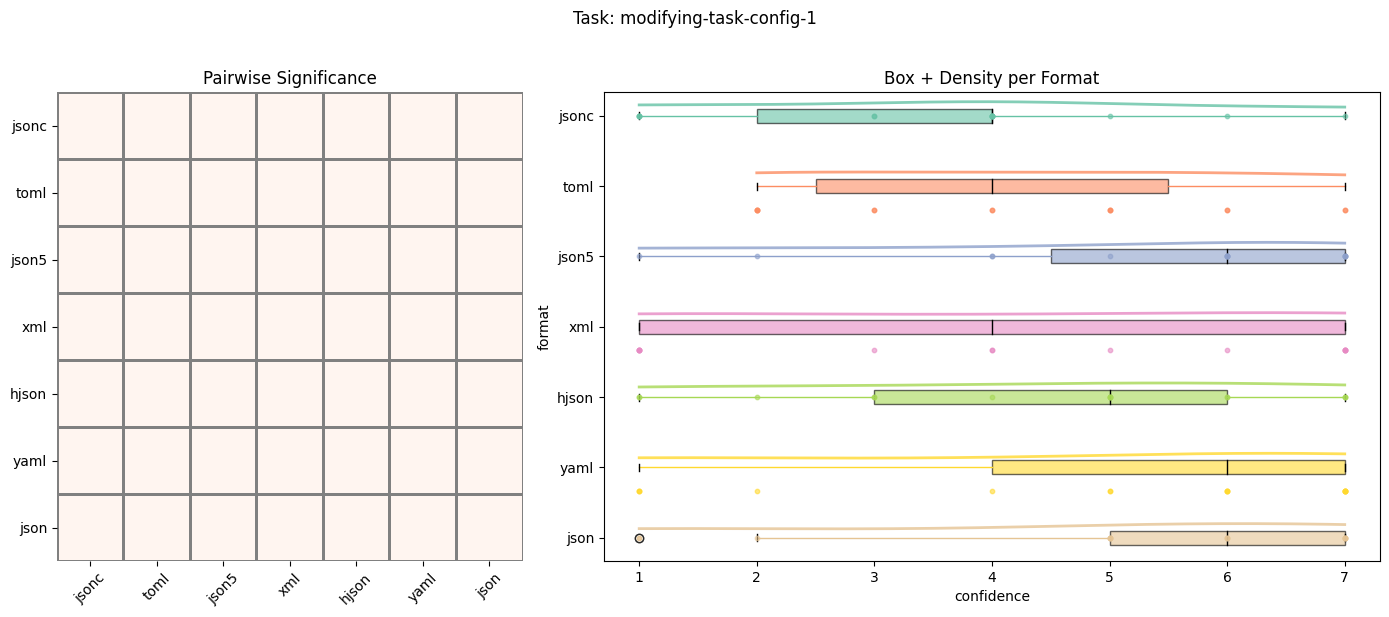

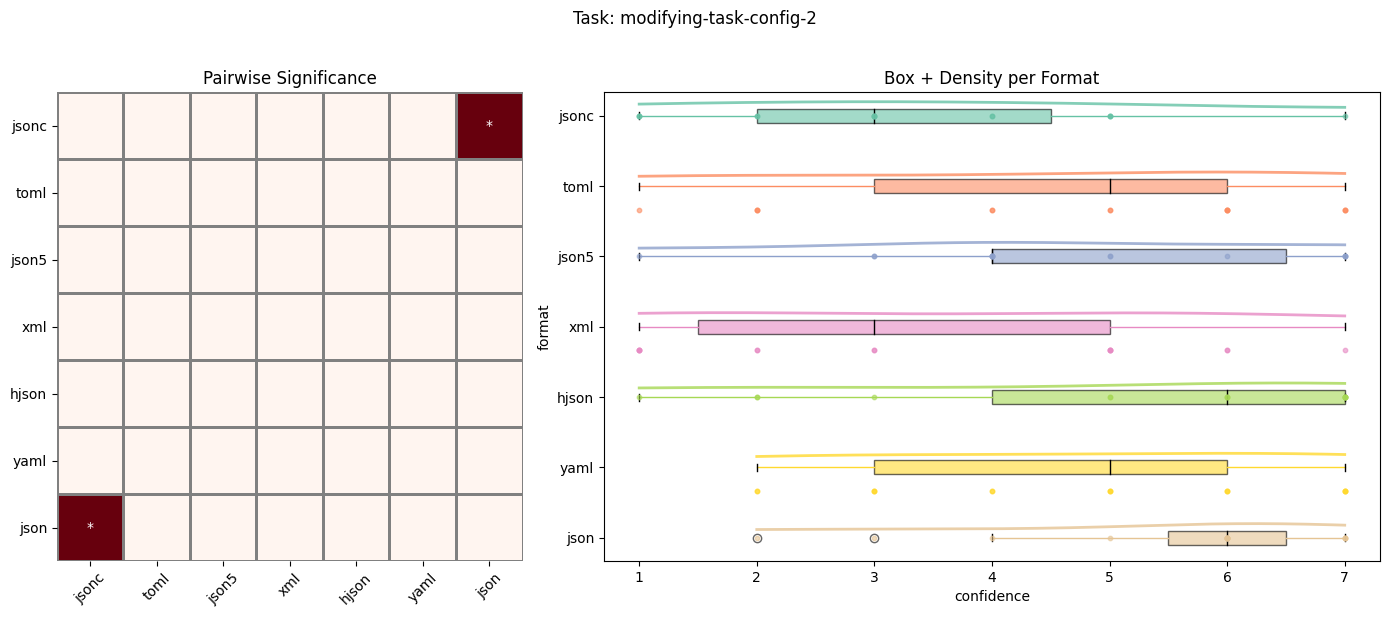

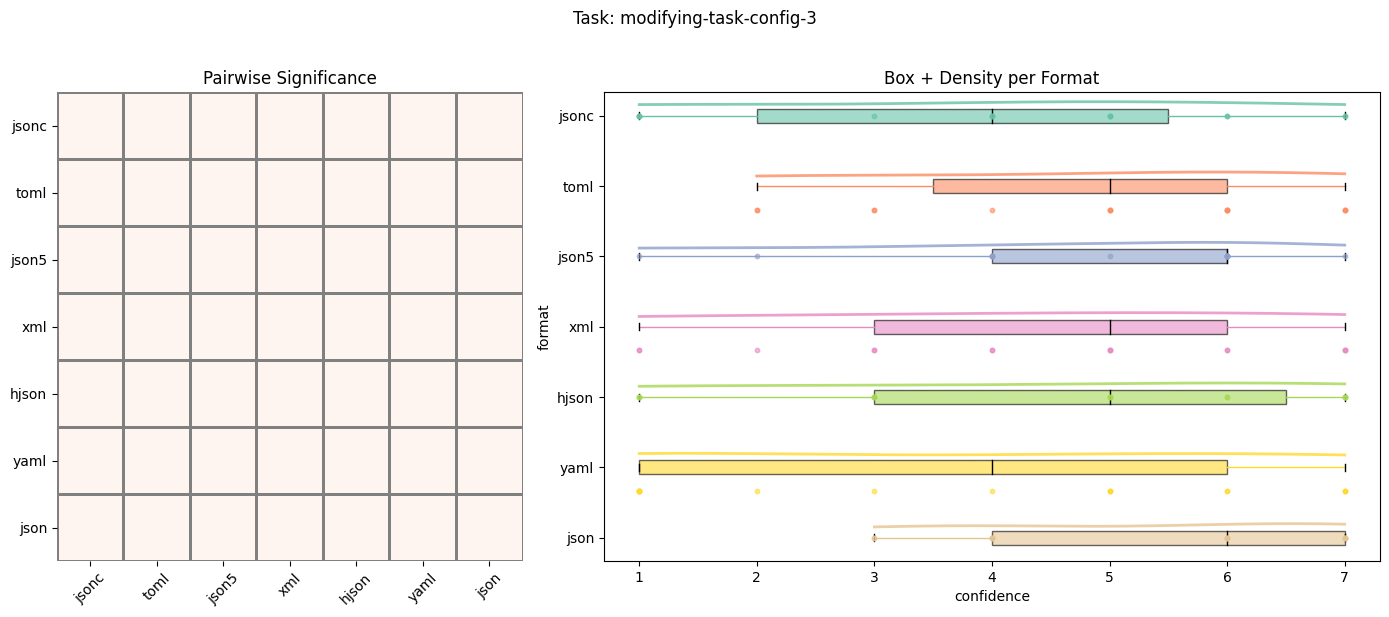

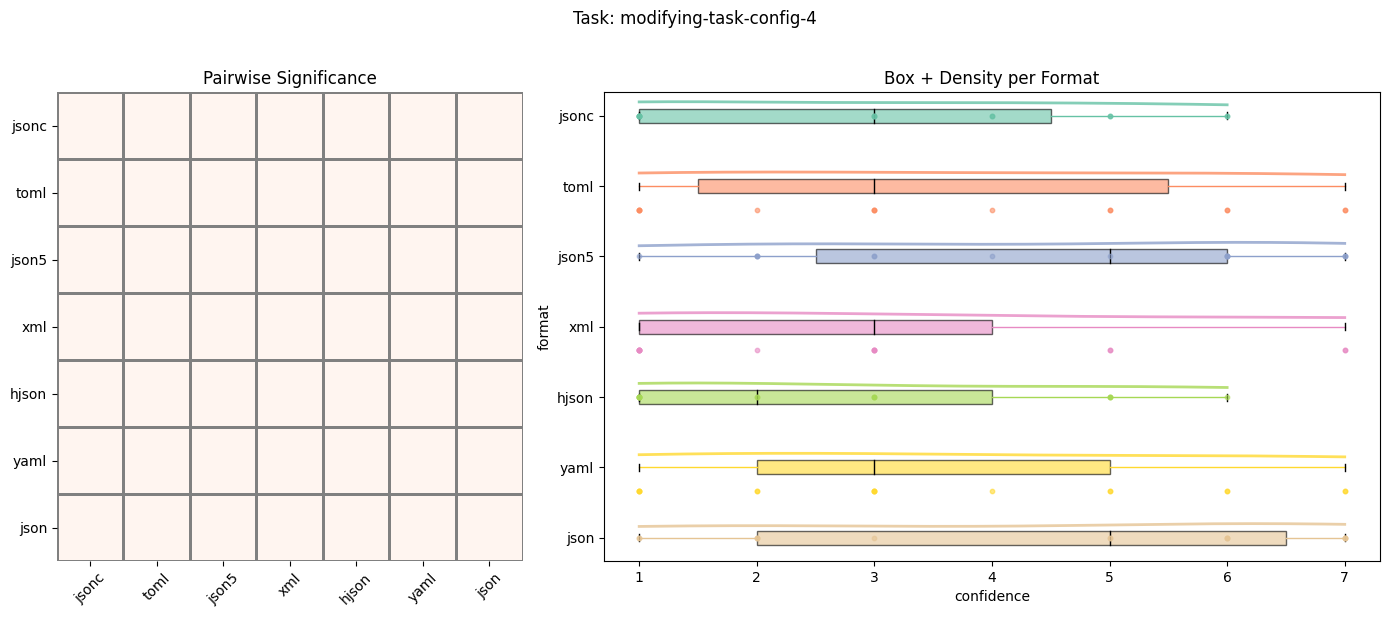

{'writing-task-NL': {'method': 'anova',
  'overall_p': 0.3960625722036338,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: []},
 'reading-task-config-1': {'method': 'anova',
  'overall_p': 0.2831875968219328,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: []},
 'reading-task-config-2': {'method': 'anova',
  'overall_p': 0.622220551271699,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: []},
 'reading-task-config-3': {'method': 'anova',
  'overall_p': 0.1634472887792011,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: []},
 'reading-task-config-4': {'method': 'anova',
  'overall_p': 0.165940665284168,
  'is_significant': False,
  'pairwise': Empty DataFram

In [24]:
## reading tasks
vis_box_comparasion(
    df_post,
    group_col='format',
    value_col='confidence',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task'
    # discrete_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5'],
    # continuous_tasks=['reading-task']
)

results = compare_statistically(
    df_post,
    group_col='format',
    value_col='confidence',
    method='anova',
    task_col='task'
    # discrete_tasks=['reading-task-config-1','reading-task-config-2','reading-task-config-3','reading-task-config-4', 'reading-task-config-5'],
    # continuous_tasks=['reading-task']
)

results

In [25]:
df_post_reading= df_post[df_post['task'].str.contains('reading-task')]
df_post_reading

participantId format                   task      startTime  \
1     67895b7d6400163124042af7  jsonc  reading-task-config-1  1747335948071   
2     67895b7d6400163124042af7  jsonc  reading-task-config-2  1747336025084   
3     67895b7d6400163124042af7  jsonc  reading-task-config-3  1747336067277   
4     67895b7d6400163124042af7  jsonc  reading-task-config-4  1747336151419   
5     67895b7d6400163124042af7  jsonc  reading-task-config-5  1747336187448   
...                        ...    ...                    ...            ...   
1167  5c4f5967aac8be0001716a65    xml  reading-task-config-1  1747173078170   
1168  5c4f5967aac8be0001716a65    xml  reading-task-config-2  1747173104950   
1169  5c4f5967aac8be0001716a65    xml  reading-task-config-3  1747173135243   
1170  5c4f5967aac8be0001716a65    xml  reading-task-config-4  1747173255290   
1171  5c4f5967aac8be0001716a65    xml  reading-task-config-5  1747173290314   

            endTime  duration_sec  difficulty  confidence  
1     1747335955384         7.313           6           4  
2     1747336031368         6.284           7           3  
3     1747336075982         8.705           6           4  
4     1747336156501         5.082           6           4  
5     1747336193744         6.296           5           4  
...             ...           ...         ...         ...  
1167  1747173082833         4.663           2           5  
1168  1747173109671         4.721           2           5  
1169  1747173137969         2.726           2           5  
1170  1747173259877         4.587           3           4  
1171  1747173292666         2.352           1           7  

[535 rows x 8 columns]

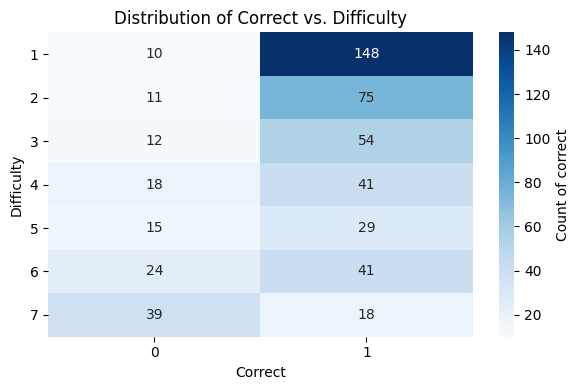

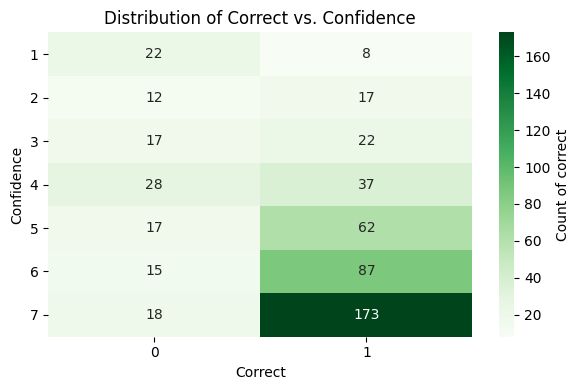

In [26]:
# 比较 correct(0/1) vs difficulty
plot_binary_response_vs_metric_heatmap(
    df_post      = df_post_reading,
    df_result    = df_reading_result,
    participant_col='participantId',
    format_col     ='format',
    task_col       ='task',
    response_col   ='correct',
    metric_col     ='difficulty',
    response_values=[0,1],    # 二元回答
    cmap='Blues'
)

# 比较 correct(0/1) vs confidence
plot_binary_response_vs_metric_heatmap(
    df_post      = df_post_reading,
    df_result    = df_reading_result,
    participant_col='participantId',
    format_col     ='format',
    task_col       ='task',
    response_col   ='correct',
    metric_col     ='confidence',
    response_values=[0,1],
    cmap='Greens'
)


## nasa tlx analysis

In [27]:
df_nasa = analyze_nasa_and_post_surveys(all_data)
df_nasa['task']='nasaltx'
df_nasa

participantId format      startTime        endTime  \
0    67895b7d6400163124042af7  jsonc  1747336946502  1747336981574   
1    659960f32faa4ff4b116de92   toml  1747175794991  1747175841492   
2    5f7f239e9b204e05b6c36538  json5  1746773792213  1746773826494   
3    67b8636acd5ed420cc098b64   toml  1747178361717  1747178406544   
4    57ca4b09993b08000192297b    xml  1747174420084  1747174450113   
..                        ...    ...            ...            ...   
102  5755c957eb80c4000741a9ce  json5  1747173778388  1747173809509   
103  6693d3ae2bd15cf7a058e6a7  json5  1746772510562  1746772572090   
104  60e2bf0aa568b97e8d525872   toml  1746770374173  1746770474998   
105  67d24179c5bd87691f1fe036   yaml  1746770060839  1746770091459   
106  5c4f5967aac8be0001716a65    xml  1747174514820  1747174538486   

     duration_sec  mental-demand  physical-demand temporal-demand performance  \
0          35.072             90               87              86          68   
1          46.501            100              100              70          10   
2          34.281             98               40              71          78   
3          44.827             99               27              73          83   
4          30.029             90                0              10          65   
..            ...            ...              ...             ...         ...   
102        31.121             69               14              18           2   
103        61.528             57               32              55          90   
104       100.825            100               75             100          75   
105        30.620             70                5              10          55   
106        23.666             92               55              35          65   

     effort  frustration     task  
0        86          100  nasaltx  
1       100           70  nasaltx  
2        99           87  nasaltx  
3        96           99  nasaltx  
4        85           75  nasaltx  
..      ...          ...      ...  
102      56            5  nasaltx  
103     100           45  nasaltx  
104     100           30  nasaltx  
105      90           25  nasaltx  
106      70           40  nasaltx  

[107 rows x 12 columns]

In [28]:
df_nasa_tidy = melt_tlx(df_nasa)
df_nasa_tidy

participantId format      startTime        endTime  \
0    67895b7d6400163124042af7  jsonc  1747336946502  1747336981574   
1    659960f32faa4ff4b116de92   toml  1747175794991  1747175841492   
2    5f7f239e9b204e05b6c36538  json5  1746773792213  1746773826494   
3    67b8636acd5ed420cc098b64   toml  1747178361717  1747178406544   
4    57ca4b09993b08000192297b    xml  1747174420084  1747174450113   
..                        ...    ...            ...            ...   
637  5755c957eb80c4000741a9ce  json5  1747173778388  1747173809509   
638  6693d3ae2bd15cf7a058e6a7  json5  1746772510562  1746772572090   
639  60e2bf0aa568b97e8d525872   toml  1746770374173  1746770474998   
640  67d24179c5bd87691f1fe036   yaml  1746770060839  1746770091459   
641  5c4f5967aac8be0001716a65    xml  1747174514820  1747174538486   

     duration_sec           task  score  
0          35.072  mental-demand     90  
1          46.501  mental-demand    100  
2          34.281  mental-demand     98  
3          44.827  mental-demand     99  
4          30.029  mental-demand     90  
..            ...            ...    ...  
637        31.121    frustration      5  
638        61.528    frustration     45  
639       100.825    frustration     30  
640        30.620    frustration     25  
641        23.666    frustration     40  

[642 rows x 7 columns]

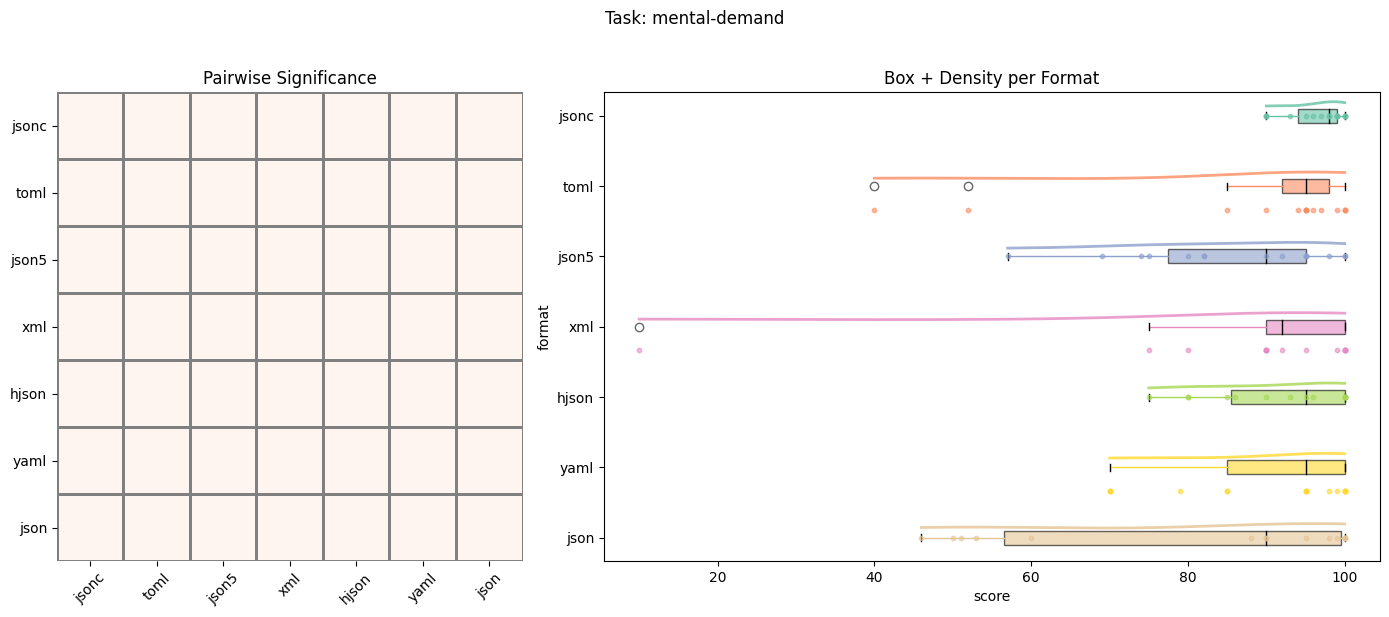

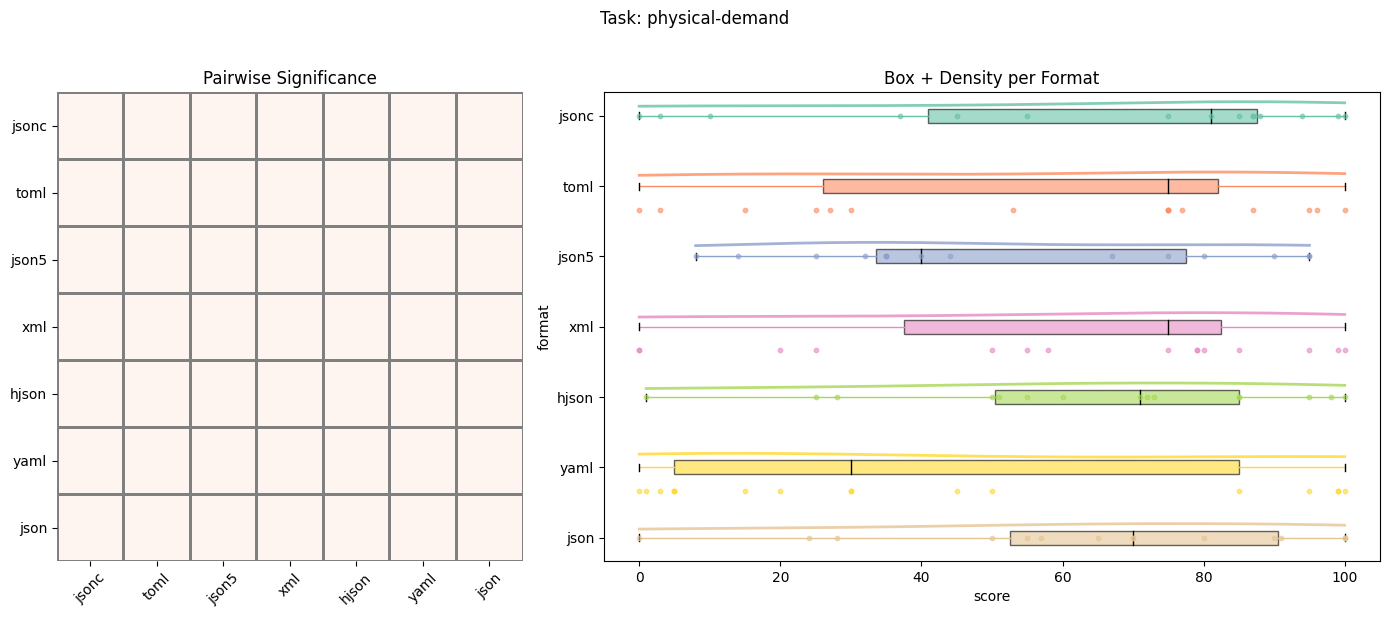

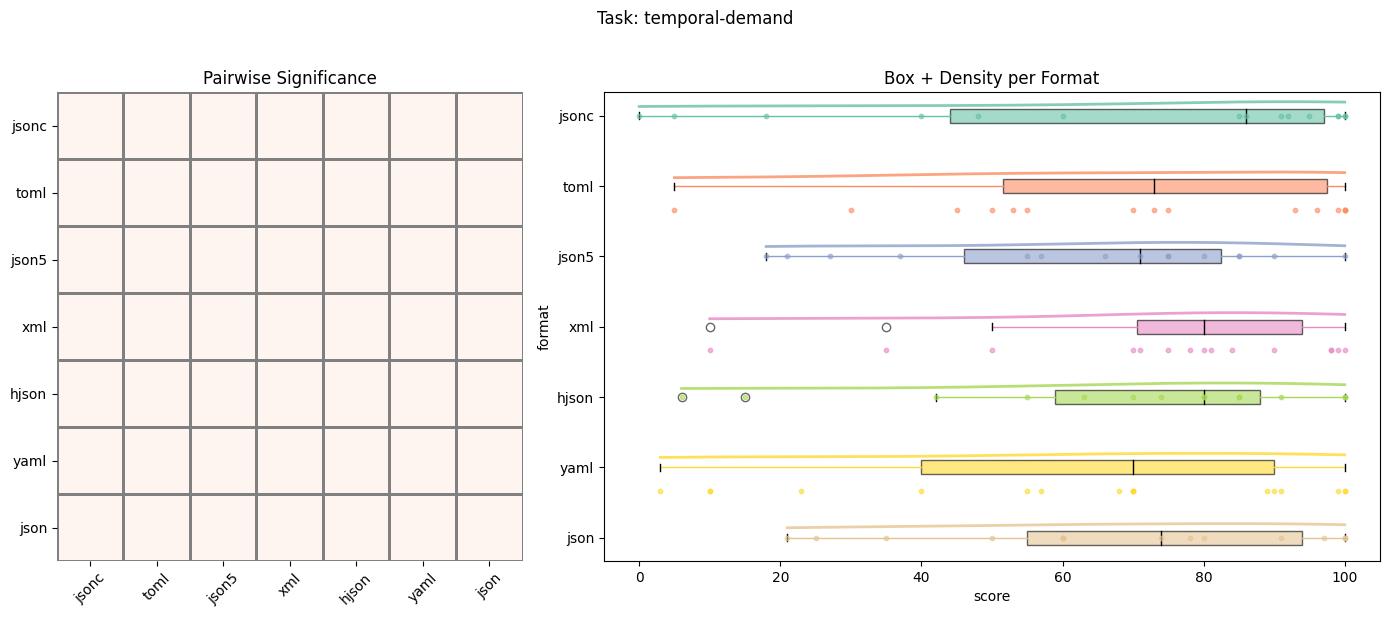

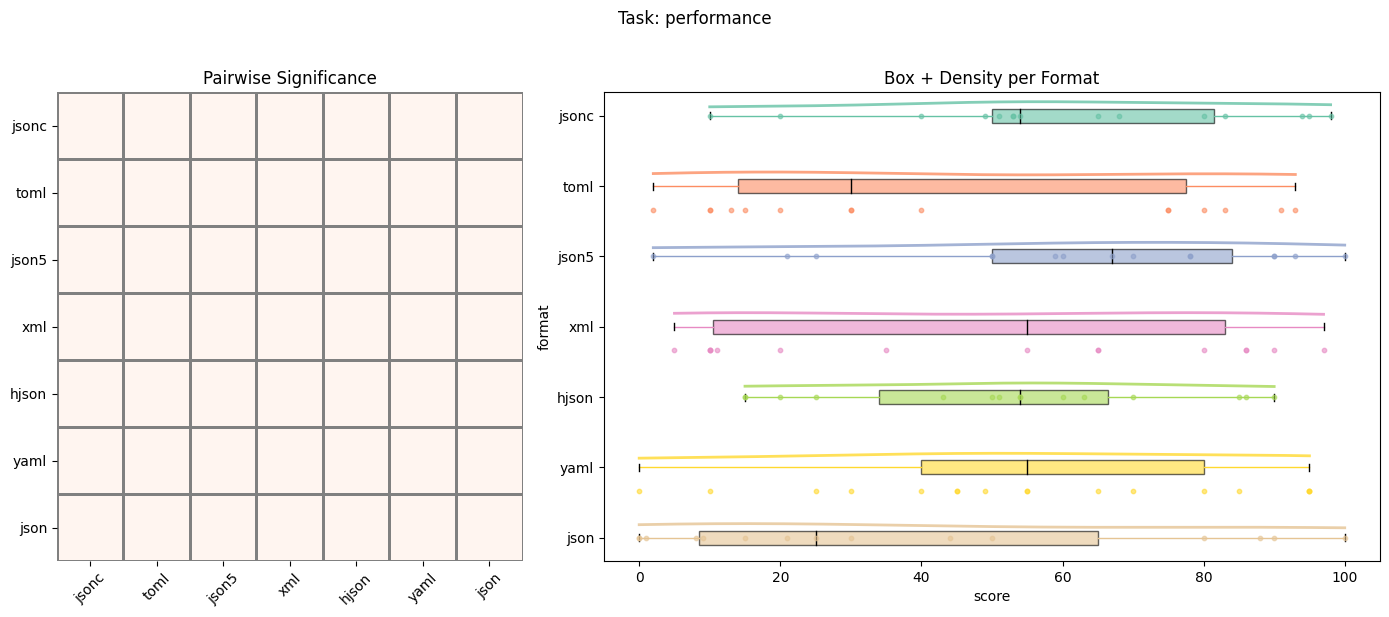

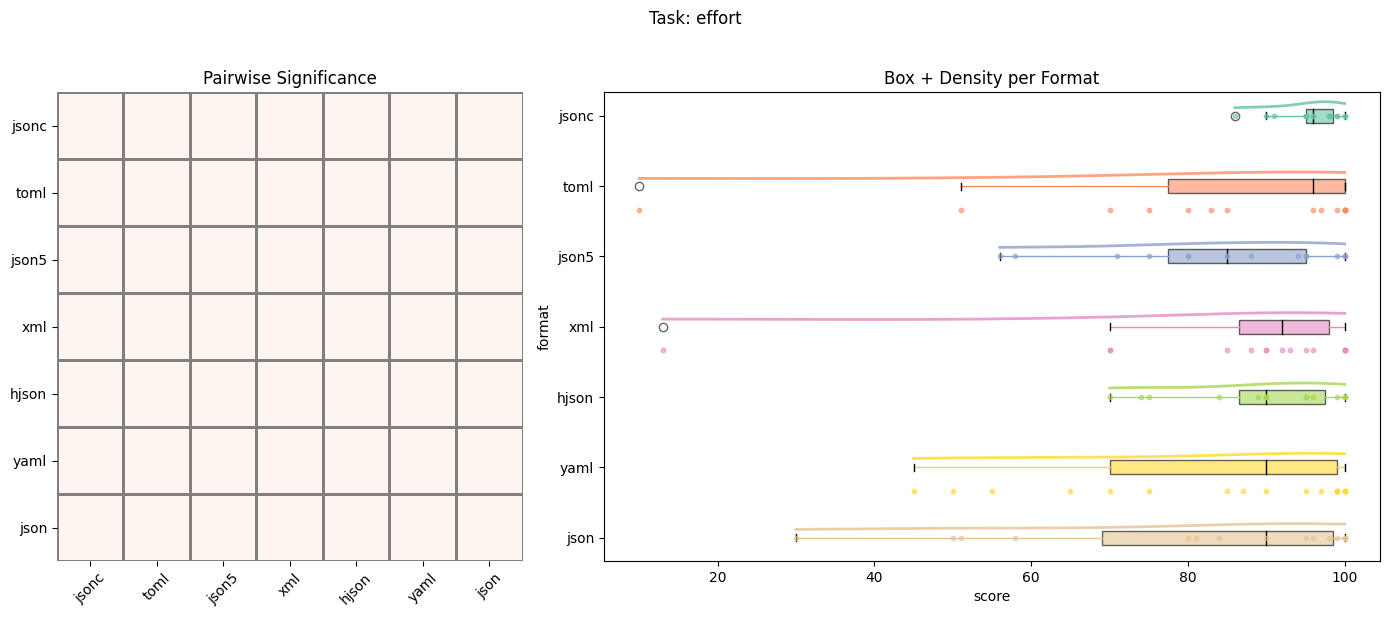

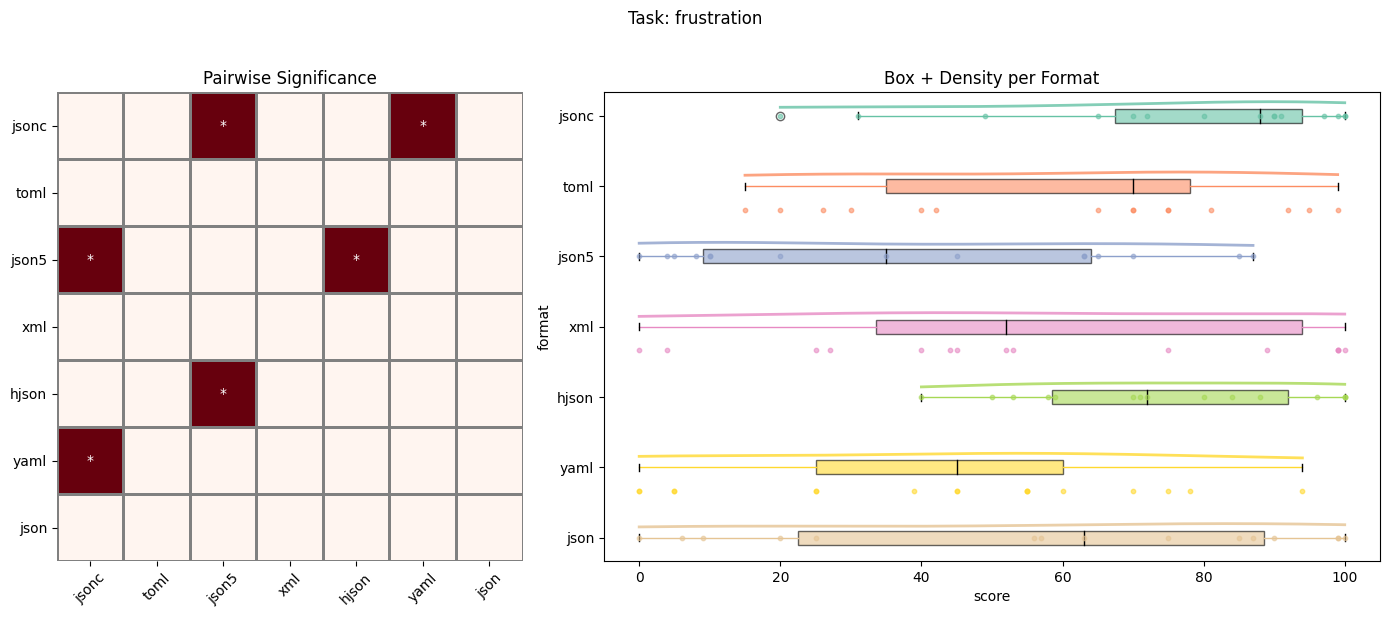

{'mental-demand': {'method': 'anova',
  'overall_p': 0.2180162633001376,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: []},
 'physical-demand': {'method': 'anova',
  'overall_p': 0.3696098646747278,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: []},
 'temporal-demand': {'method': 'anova',
  'overall_p': 0.9103773244912433,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: []},
 'performance': {'method': 'anova',
  'overall_p': 0.2861981359517661,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_value, significant, interpretation]
  Index: []},
 'effort': {'method': 'anova',
  'overall_p': 0.31308613574965405,
  'is_significant': False,
  'pairwise': Empty DataFrame
  Columns: [group1, group2, p_valu

In [29]:
vis_box_comparasion(
    df_nasa_tidy,
    group_col='format',
    value_col='score',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task'
)

results = compare_statistically(
    df_nasa_tidy,
    group_col='format',
    value_col='score',
    method='anova',
    task_col='task'
)

results

In [30]:
df_nasa

participantId format      startTime        endTime  \
0    67895b7d6400163124042af7  jsonc  1747336946502  1747336981574   
1    659960f32faa4ff4b116de92   toml  1747175794991  1747175841492   
2    5f7f239e9b204e05b6c36538  json5  1746773792213  1746773826494   
3    67b8636acd5ed420cc098b64   toml  1747178361717  1747178406544   
4    57ca4b09993b08000192297b    xml  1747174420084  1747174450113   
..                        ...    ...            ...            ...   
102  5755c957eb80c4000741a9ce  json5  1747173778388  1747173809509   
103  6693d3ae2bd15cf7a058e6a7  json5  1746772510562  1746772572090   
104  60e2bf0aa568b97e8d525872   toml  1746770374173  1746770474998   
105  67d24179c5bd87691f1fe036   yaml  1746770060839  1746770091459   
106  5c4f5967aac8be0001716a65    xml  1747174514820  1747174538486   

     duration_sec  mental-demand  physical-demand temporal-demand performance  \
0          35.072             90               87              86          68   
1          46.501            100              100              70          10   
2          34.281             98               40              71          78   
3          44.827             99               27              73          83   
4          30.029             90                0              10          65   
..            ...            ...              ...             ...         ...   
102        31.121             69               14              18           2   
103        61.528             57               32              55          90   
104       100.825            100               75             100          75   
105        30.620             70                5              10          55   
106        23.666             92               55              35          65   

     effort  frustration     task  
0        86          100  nasaltx  
1       100           70  nasaltx  
2        99           87  nasaltx  
3        96           99  nasaltx  
4        85           75  nasaltx  
..      ...          ...      ...  
102      56            5  nasaltx  
103     100           45  nasaltx  
104     100           30  nasaltx  
105      90           25  nasaltx  
106      70           40  nasaltx  

[107 rows x 12 columns]

In [31]:
df_reading_agg_overall=df_reading_agg[df_reading_agg['task']=='reading-task-config']
df_reading_agg_overall

participantId                 task format response  \
535  5755c957eb80c4000741a9ce  reading-task-config  json5      NaN   
536  5795af044a84da00014c5df1  reading-task-config   json      NaN   
537  57ca4b09993b08000192297b  reading-task-config    xml      NaN   
538  588ab33542c8e900019d02ae  reading-task-config  jsonc      NaN   
539  589cd166b2a7180001f0527d  reading-task-config  jsonc      NaN   
..                        ...                  ...    ...      ...   
637  67f66486e35051403284eb5e  reading-task-config    xml      NaN   
638  680ebf035ab59d342f31726e  reading-task-config  hjson      NaN   
639  681374d36d7bd7ccb6f914f5  reading-task-config  json5      NaN   
640  68138e7f96395f4c5f3a0a87  reading-task-config   json      NaN   
641  6818ca1523ece90f671e3601  reading-task-config   json      NaN   

     start_time  end_time  duration_sec  help_count correct_answer  correct  
535         NaN       NaN       157.047           0            NaN        5  
536         NaN       NaN       356.552           0            NaN        4  
537         NaN       NaN       224.248           0            NaN        4  
538         NaN       NaN       196.206           0            NaN        3  
539         NaN       NaN       405.431           0            NaN        3  
..          ...       ...           ...         ...            ...      ...  
637         NaN       NaN       722.635           0            NaN        2  
638         NaN       NaN       393.819           0            NaN        5  
639         NaN       NaN       159.182           0            NaN        4  
640         NaN       NaN       176.875           0            NaN        4  
641         NaN       NaN       456.023           0            NaN        5  

[107 rows x 10 columns]

/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_64949/1875279882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reading_agg_overall['correct'] = pd.to_numeric(df_reading_agg_overall['correct'], errors='coerce')


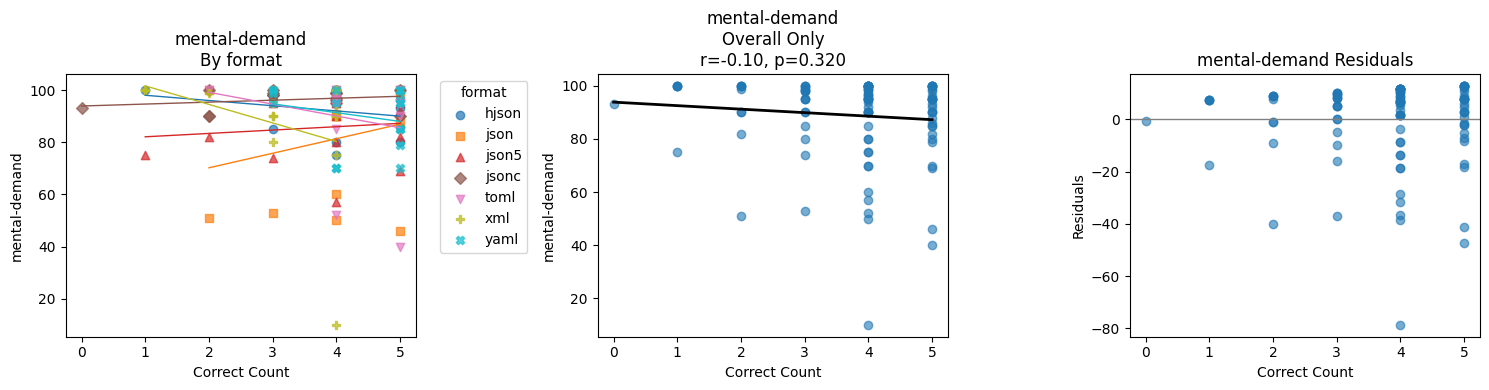

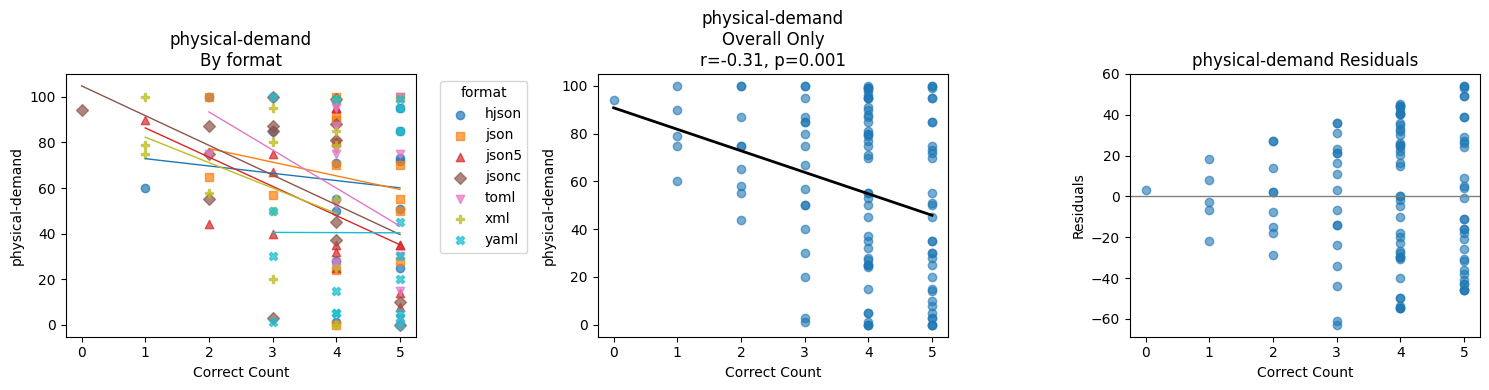

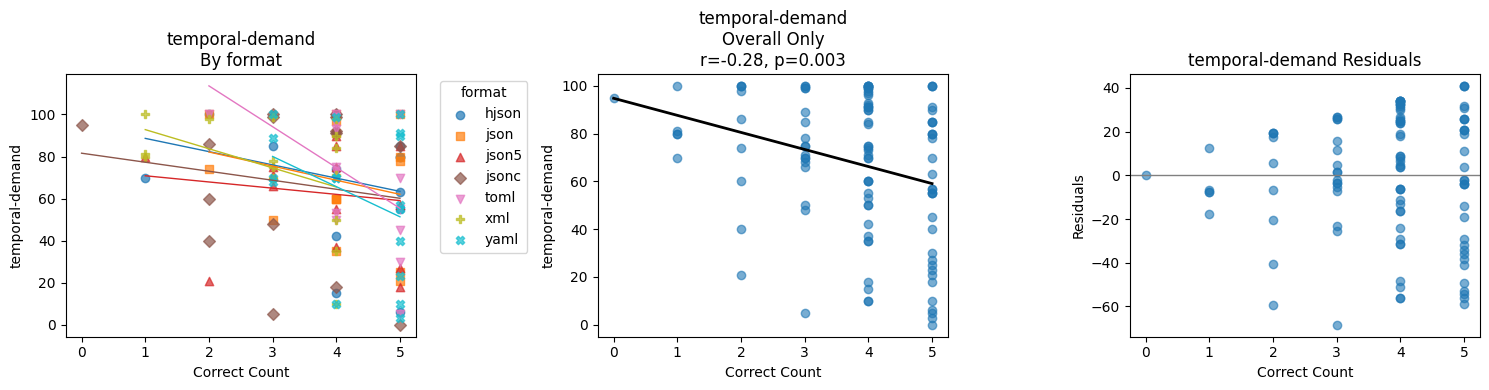

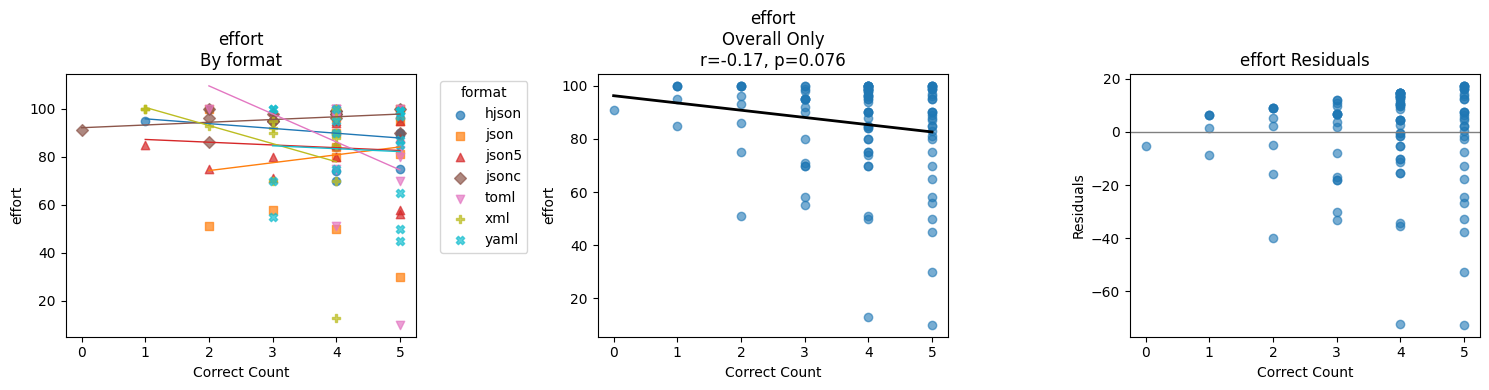

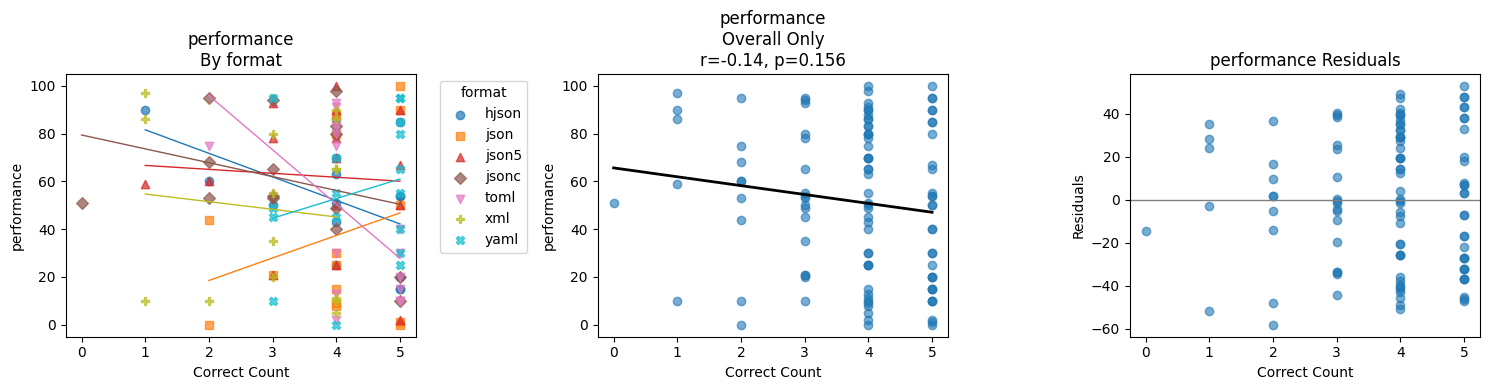

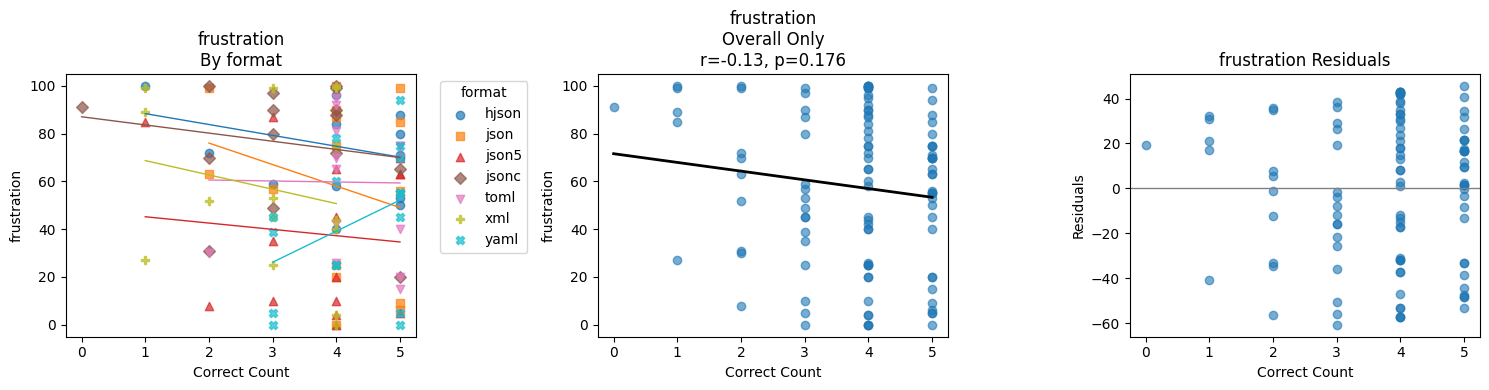

In [33]:
import pandas as pd

df_reading_agg_overall['correct'] = pd.to_numeric(df_reading_agg_overall['correct'], errors='coerce')
for col in ['mental-demand','physical-demand','temporal-demand','effort','performance','frustration']:
    df_nasa[col] = pd.to_numeric(df_nasa[col], errors='coerce')

plot_nasatlx_correct(
    df_reading         = df_reading_agg_overall,
    df_nasa            = df_nasa,
    metrics            = ['mental-demand','physical-demand','temporal-demand','effort','performance','frustration'],
    group_col          = 'format',
    agg_func           = 'mean',
    show_by_format     = True,   # 按 format
    show_overall       = True,  # 不要 overall 散点
    show_residual      = True,   # 要残差
    show_overall_trend = False,  # by format 图不画 overall 虚线
    figsize_per        = (5,4)
)

## quiz analysis

In [43]:
df_quiz = evaluate_quiz_answers_from_tutorial(all_data)
df_quiz_agg = aggregate_quiz_parts(
    df_quiz,
    participant_col='participantId',
    format_col='format',
    task_col='quiz_key',
    sum_cols=['num_wrong_attempts', 'wrong_choice_count'],
    mean_cols=['correct']
)
df_quiz_summary = summarize_quiz_parts(
    df_quiz,
    participant_col='participantId',
    format_col='format',
    task_col='quiz_key',
    sum_cols=['num_wrong_attempts','wrong_choice_count'],
    mean_cols=['correct']
)
df_quiz_summary['task'] = 'tutorial_quiz'
df_quiz_summary

participantId format        quiz_key  num_wrong_attempts  \
0    5755c957eb80c4000741a9ce  json5  tutorial-json5                   3   
1    5795af044a84da00014c5df1   json   tutorial-json                   1   
2    57ca4b09993b08000192297b    xml    tutorial-xml                   2   
3    588ab33542c8e900019d02ae  jsonc  tutorial-jsonc                   2   
4    589cd166b2a7180001f0527d  jsonc  tutorial-jsonc                   7   
..                        ...    ...             ...                 ...   
102  67f66486e35051403284eb5e    xml    tutorial-xml                   3   
103  680ebf035ab59d342f31726e  hjson  tutorial-hjson                   6   
104  681374d36d7bd7ccb6f914f5  json5  tutorial-json5                   4   
105  68138e7f96395f4c5f3a0a87   json   tutorial-json                   3   
106  6818ca1523ece90f671e3601   json   tutorial-json                   9   

     wrong_choice_count  correct           task  
0                     3      1.0  tutorial_quiz  
1                     1      1.0  tutorial_quiz  
2                     2      1.0  tutorial_quiz  
3                     2      1.0  tutorial_quiz  
4                     5      0.5  tutorial_quiz  
..                  ...      ...            ...  
102                   3      1.0  tutorial_quiz  
103                   0      0.5  tutorial_quiz  
104                   5      1.0  tutorial_quiz  
105                   7      1.0  tutorial_quiz  
106                   9      0.5  tutorial_quiz  

[107 rows x 7 columns]

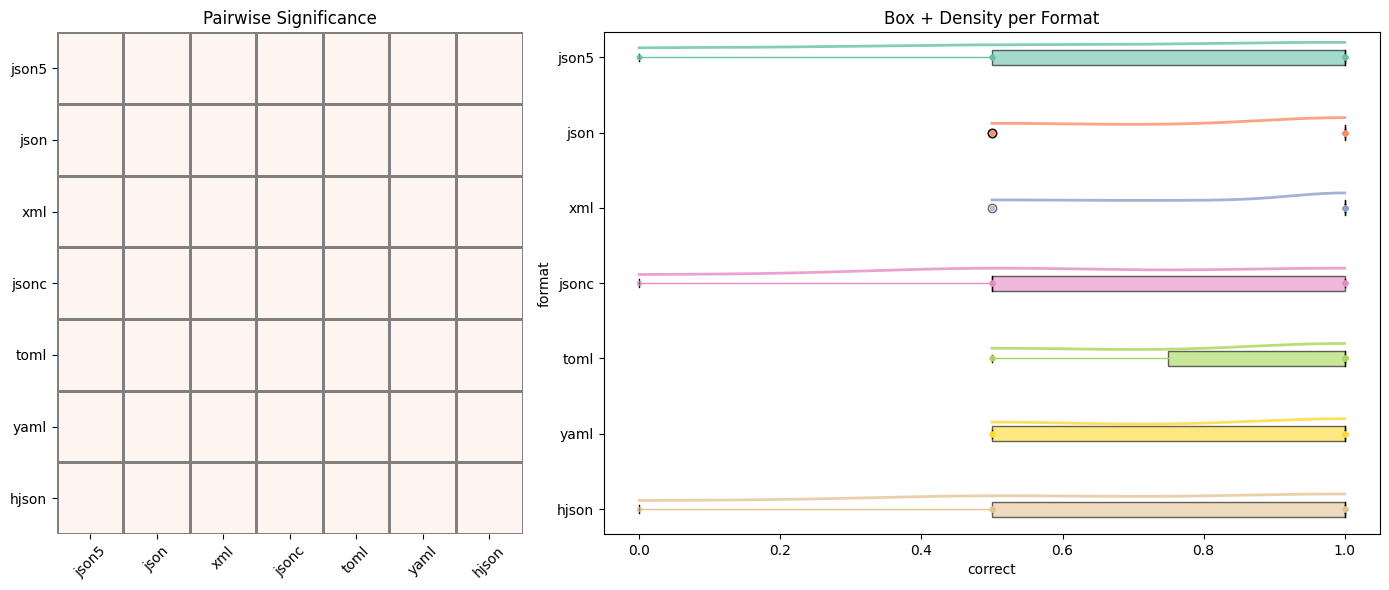

{'method': 'anova',
 'overall_p': 0.04255740530767846,
 'is_significant': True,
 'pairwise':    group1 group2  p_value  significant                     interpretation
 0   hjson   json   0.6224        False   hjson vs json is not significant
 1   hjson  json5   0.9999        False  hjson vs json5 is not significant
 2   hjson  jsonc   0.9999        False  hjson vs jsonc is not significant
 3   hjson   toml   0.8243        False   hjson vs toml is not significant
 4   hjson    xml   0.2224        False    hjson vs xml is not significant
 5   hjson   yaml   0.9643        False   hjson vs yaml is not significant
 6    json  json5   0.4019        False   json vs json5 is not significant
 7    json  jsonc   0.4019        False   json vs jsonc is not significant
 8    json   toml   0.9999        False    json vs toml is not significant
 9    json    xml   0.9936        False     json vs xml is not significant
 10   json   yaml   0.9844        False    json vs yaml is not significant
 11  jso

In [44]:
## correct
vis_box_comparasion(
    df_quiz_summary,
    group_col='format',
    value_col='correct',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task'
)

results = compare_statistically(
    df_quiz_summary,
    group_col='format',
    value_col='correct',
    method='anova',
    task_col='task'
)

results


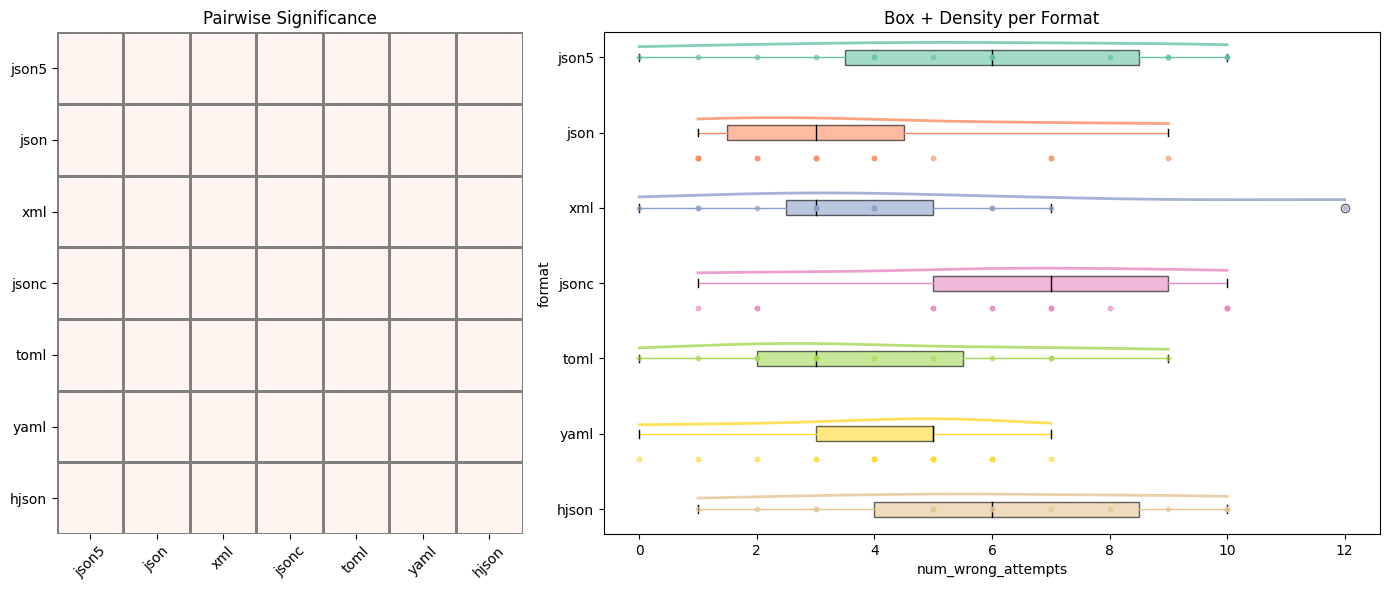

{'method': 'anova',
 'overall_p': 0.01582246820026964,
 'is_significant': True,
 'pairwise':    group1 group2  p_value  significant                     interpretation
 0   hjson   json   0.1847        False   hjson vs json is not significant
 1   hjson  json5   0.9992        False  hjson vs json5 is not significant
 2   hjson  jsonc   0.9997        False  hjson vs jsonc is not significant
 3   hjson   toml   0.3072        False   hjson vs toml is not significant
 4   hjson    xml   0.3828        False    hjson vs xml is not significant
 5   hjson   yaml   0.5009        False   hjson vs yaml is not significant
 6    json  json5   0.4236        False   json vs json5 is not significant
 7    json  jsonc   0.0735        False   json vs jsonc is not significant
 8    json   toml   1.0000        False    json vs toml is not significant
 9    json    xml   0.9997        False     json vs xml is not significant
 10   json   yaml   0.9943        False    json vs yaml is not significant
 11  jso

In [45]:
## num_wrong_attempts
vis_box_comparasion(
    df_quiz_summary,
    group_col='format',
    value_col='num_wrong_attempts',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task'
)

results = compare_statistically(
    df_quiz_summary,
    group_col='format',
    value_col='num_wrong_attempts',
    method='anova',
    task_col='task'
)

results

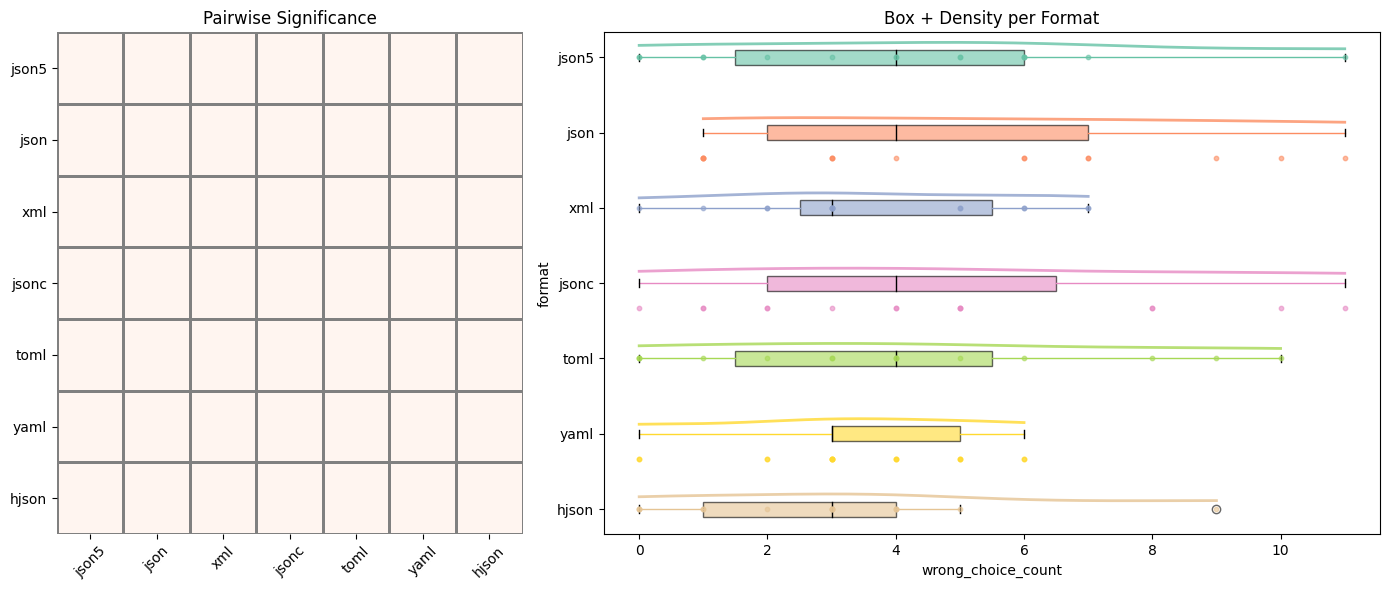

{'method': 'anova',
 'overall_p': 0.46933310974502696,
 'is_significant': False,
 'pairwise': Empty DataFrame
 Columns: [group1, group2, p_value, significant, interpretation]
 Index: []}

In [46]:
## wrong_choice_count
vis_box_comparasion(
    df_quiz_summary,
    group_col='format',
    value_col='wrong_choice_count',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task'
)

results = compare_statistically(
    df_quiz_summary,
    group_col='format',
    value_col='wrong_choice_count',
    method='anova',
    task_col='task'
)

results

In [ ]:
# first_key, first_value = list(all_data.items())[0]
# first_item = { first_key: first_value }
# first_item

## post task survey analysis

In [17]:
df_post_survy_format= extract_post_task_tlx_responses(all_data, df_part )
df_post_survy_format

participantId  \
0    67895b7d6400163124042af7   
1    659960f32faa4ff4b116de92   
2    5f7f239e9b204e05b6c36538   
3    67b8636acd5ed420cc098b64   
4    57ca4b09993b08000192297b   
..                        ...   
102  5755c957eb80c4000741a9ce   
103  6693d3ae2bd15cf7a058e6a7   
104  60e2bf0aa568b97e8d525872   
105  67d24179c5bd87691f1fe036   
106  5c4f5967aac8be0001716a65   

                                                    q7  \
0                                                   no   
1                                                        
2                                                        
3                                        No thank you    
4                                                        
..                                                 ...   
102  I've both worked with XML and JSON a little be...   
103                     No I tried my best as a novice   
104                                                 No   
105                                                      
106                                                 No   

                                                    q8           q9  \
0                                                   no   Bachelor's   
1    This was a very mentally challenging but thoro...  High School   
2                                                          Master's   
3                                                   No     Master's   
4    I'm not exactly sure what I was supposed to do...   Bachelor's   
..                                                 ...          ...   
102                                        It was fun!     Master's   
103                                                 No   Bachelor's   
104                                                 No          PhD   
105                                                      Bachelor's   
106                                               None  High School   

                                                   q12  \
0    {'JSON': 'Used it a few times', 'JSONC': 'Used...   
1    {'JSON': 'Not familiar at all', 'JSONC': 'Not ...   
2    {'JSON': 'Not familiar at all', 'JSONC': 'Not ...   
3    {'JSON': 'Heard of it but never used', 'JSONC'...   
4    {'JSON': 'Comfortable using it', 'JSONC': 'Not...   
..                                                 ...   
102  {'JSON': 'Used it a few times', 'JSONC': 'Not ...   
103  {'JSON': 'Not familiar at all', 'JSONC': 'Not ...   
104  {'JSON': 'Comfortable using it', 'JSONC': 'Hea...   
105  {'JSON': 'Not familiar at all', 'JSONC': 'Not ...   
106  {'JSON': 'Used it a few times', 'JSONC': 'Not ...   

                                                   q13  \
0                                 [Prefer not to say.]   
1    [No, I do not have any cognitive-related condi...   
2    [No, I do not have any cognitive-related condi...   
3    [No, I do not have any cognitive-related condi...   
4    [No, I do not have any cognitive-related condi...   
..                                                 ...   
102  [No, I do not have any cognitive-related condi...   
103  [No, I do not have any cognitive-related condi...   
104  [No, I do not have any cognitive-related condi...   
105  [No, I do not have any cognitive-related condi...   
106  [No, I do not have any cognitive-related condi...   

                                             q14    q10                  q11  \
0                           [Prefer not to say.]    8.0    Somewhat familiar   
1    [No, I do not have any related conditions.]    0.0  Not familiar at all   
2    [No, I do not have any related conditions.]    0.0  Not familiar at all   
3    [No, I do not have any related conditions.]   72.0    Somewhat familiar   
4    [No, I do not have any related conditions.]  120.0    Somewhat familiar   
..                                           ...    ...                  ...   
102  [No, I do not have any related conditions.]  160.0    Somewhat familiar   
103  [No, I do not have any related

In [18]:
questions = ['q9','q13','q14']
sub_df = extract_survey_items(
    df_post_survy_format,
    items=questions,
    id_col='participantId',
    format_col='format'
)
sub_df


participantId format           q9  \
0    67895b7d6400163124042af7  jsonc   Bachelor's   
1    659960f32faa4ff4b116de92   toml  High School   
2    5f7f239e9b204e05b6c36538  json5     Master's   
3    67b8636acd5ed420cc098b64   toml     Master's   
4    57ca4b09993b08000192297b    xml   Bachelor's   
..                        ...    ...          ...   
102  5755c957eb80c4000741a9ce  json5     Master's   
103  6693d3ae2bd15cf7a058e6a7  json5   Bachelor's   
104  60e2bf0aa568b97e8d525872   toml          PhD   
105  67d24179c5bd87691f1fe036   yaml   Bachelor's   
106  5c4f5967aac8be0001716a65    xml  High School   

                                                   q13  \
0                                 [Prefer not to say.]   
1    [No, I do not have any cognitive-related condi...   
2    [No, I do not have any cognitive-related condi...   
3    [No, I do not have any cognitive-related condi...   
4    [No, I do not have any cognitive-related condi...   
..                                                 ...   
102  [No, I do not have any cognitive-related condi...   
103  [No, I do not have any cognitive-related condi...   
104  [No, I do not have any cognitive-related condi...   
105  [No, I do not have any cognitive-related condi...   
106  [No, I do not have any cognitive-related condi...   

                                             q14  
0                           [Prefer not to say.]  
1    [No, I do not have any related conditions.]  
2    [No, I do not have any related conditions.]  
3    [No, I do not have any related conditions.]  
4    [No, I do not have any related conditions.]  
..                                           ...  
102  [No, I do not have any related conditions.]  
103  [No, I do not have any related conditions.]  
104  [No, I do not have any related conditions.]  
105  [No, I do not have any related conditions.]  
106  [No, I do not have any related conditions.]  

[107 rows x 5 columns]

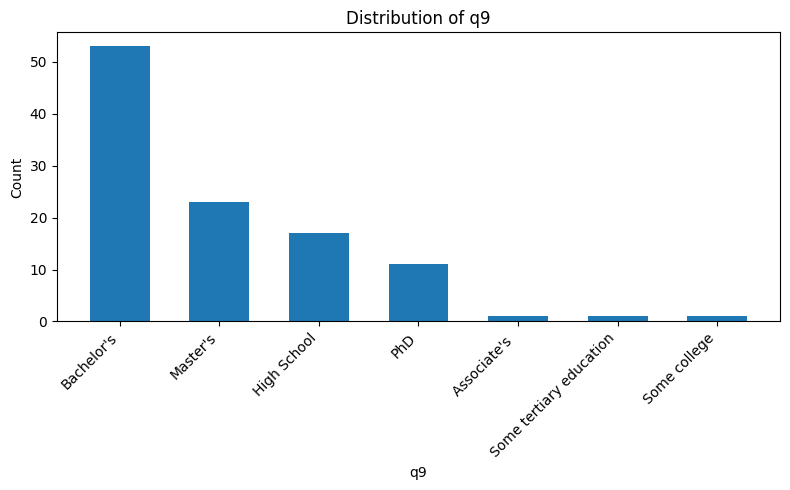

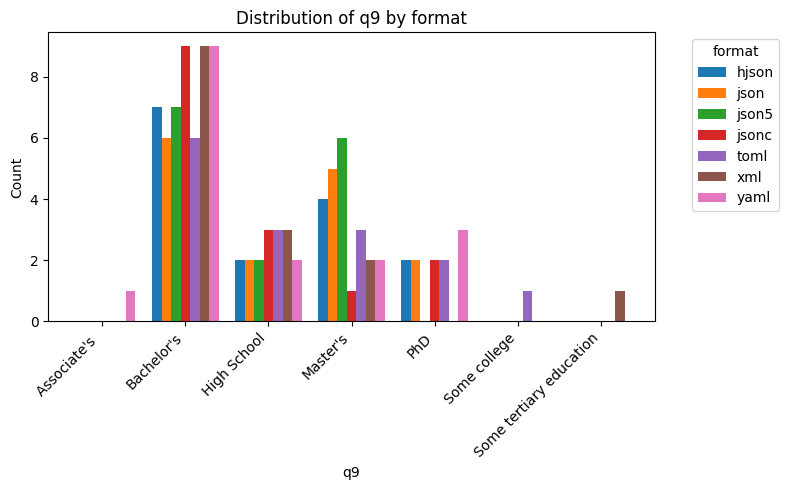

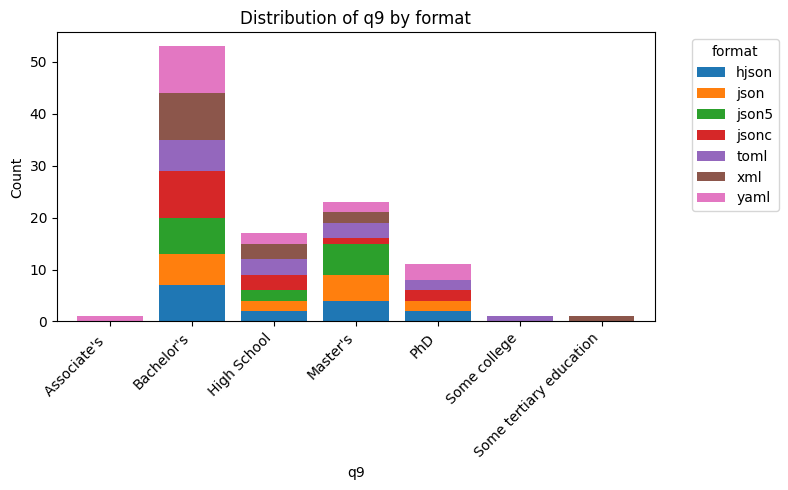

In [19]:
# 单独画 q9 的总体分布
plot_answer_distribution(sub_df, question='q9')

# 按 format 分组画 q13 的分组柱状图
plot_answer_distribution(sub_df, question='q9', group_by='format')

# 如果想用堆叠柱状图来对比分组
plot_answer_distribution(sub_df, question='q9', group_by='format', stacked=True)



In [20]:
# cnt = get_answer_counts(sub_df, question='q13')
# cnt_by_fmt = get_answer_counts(sub_df, question='q13', group_by='format')

cnt_13 = get_answer_counts(sub_df, question='q13')
print(cnt_13)

cnt_14 = get_answer_counts(sub_df, question='q14')
print(cnt_14)

q13
No, I do not have any cognitive-related conditions.                                    98
Prefer not to say.                                                                      6
Dyslexia (e.g., difficulty reading or distinguishing symbols, such as "b" and "d").     1
Dysgraphia (e.g., difficulty with handwriting or written expression).                   1
ADHD                                                                                    1
Name: count, dtype: int64
q14
No, I do not have any related conditions.                                                     98
Prefer not to say.                                                                             6
Color vision deficiency (CVD) (e.g., difficulty distinguishing colors like red and green).     2
Low vision (e.g., difficulty seeing clearly, even with corrective lenses).                     1
Name: count, dtype: int64


In [21]:
questions = ['q10','q11']

sub_df1 = extract_survey_items(
    df_post_survy_format,
    items=questions,
    id_col='participantId',
    format_col='format'
)

mapping = {
    'Not familiar at all': 1,
    'Somewhat familiar'  : 2,
    'Very familiar'      : 3
}

sub_df1['q11_code'] = sub_df1['q11'].map(mapping)

sub_df1

participantId format    q10                  q11  q11_code
0    67895b7d6400163124042af7  jsonc    8.0    Somewhat familiar         2
1    659960f32faa4ff4b116de92   toml    0.0  Not familiar at all         1
2    5f7f239e9b204e05b6c36538  json5    0.0  Not familiar at all         1
3    67b8636acd5ed420cc098b64   toml   72.0    Somewhat familiar         2
4    57ca4b09993b08000192297b    xml  120.0    Somewhat familiar         2
..                        ...    ...    ...                  ...       ...
102  5755c957eb80c4000741a9ce  json5  160.0    Somewhat familiar         2
103  6693d3ae2bd15cf7a058e6a7  json5    0.0  Not familiar at all         1
104  60e2bf0aa568b97e8d525872   toml   12.0        Very familiar         3
105  67d24179c5bd87691f1fe036   yaml    0.0  Not familiar at all         1
106  5c4f5967aac8be0001716a65    xml    8.0  Not familiar at all         1

[107 rows x 5 columns]

In [22]:
df_encoded, df_familiar = extract_and_encode_familiarity(df_post_survy_format)

df_encoded


participantId format  JSON  JSONC  JSON5  HJSON  YAML  TOML  \
0    67895b7d6400163124042af7  jsonc     3      3      3      3     1     2   
1    659960f32faa4ff4b116de92   toml     1      1      1      1     1     1   
2    5f7f239e9b204e05b6c36538  json5     1      1      1      1     1     1   
3    67b8636acd5ed420cc098b64   toml     2      1      2      1     2     2   
4    57ca4b09993b08000192297b    xml     4      1      1      1     3     1   
..                        ...    ...   ...    ...    ...    ...   ...   ...   
102  5755c957eb80c4000741a9ce  json5     3      1      1      1     1     1   
103  6693d3ae2bd15cf7a058e6a7  json5     1      1      2      1     1     1   
104  60e2bf0aa568b97e8d525872   toml     4      2      3      4     2     4   
105  67d24179c5bd87691f1fe036   yaml     1      1      1      1     1     1   
106  5c4f5967aac8be0001716a65    xml     3      1      1      1     2     1   

     XML  
0      4  
1      1  
2      1  
3      3  
4      3  
..   ...  
102    4  
103    1  
104    4  
105    1  
106    2  

[107 rows x 9 columns]

In [25]:
df_familiar['task']='survey'
df_familiar

participantId format  familiarity    task
0    67895b7d6400163124042af7  jsonc            3  survey
1    659960f32faa4ff4b116de92   toml            1  survey
2    5f7f239e9b204e05b6c36538  json5            1  survey
3    67b8636acd5ed420cc098b64   toml            2  survey
4    57ca4b09993b08000192297b    xml            3  survey
..                        ...    ...          ...     ...
102  5755c957eb80c4000741a9ce  json5            1  survey
103  6693d3ae2bd15cf7a058e6a7  json5            2  survey
104  60e2bf0aa568b97e8d525872   toml            4  survey
105  67d24179c5bd87691f1fe036   yaml            1  survey
106  5c4f5967aac8be0001716a65    xml            2  survey

[107 rows x 4 columns]

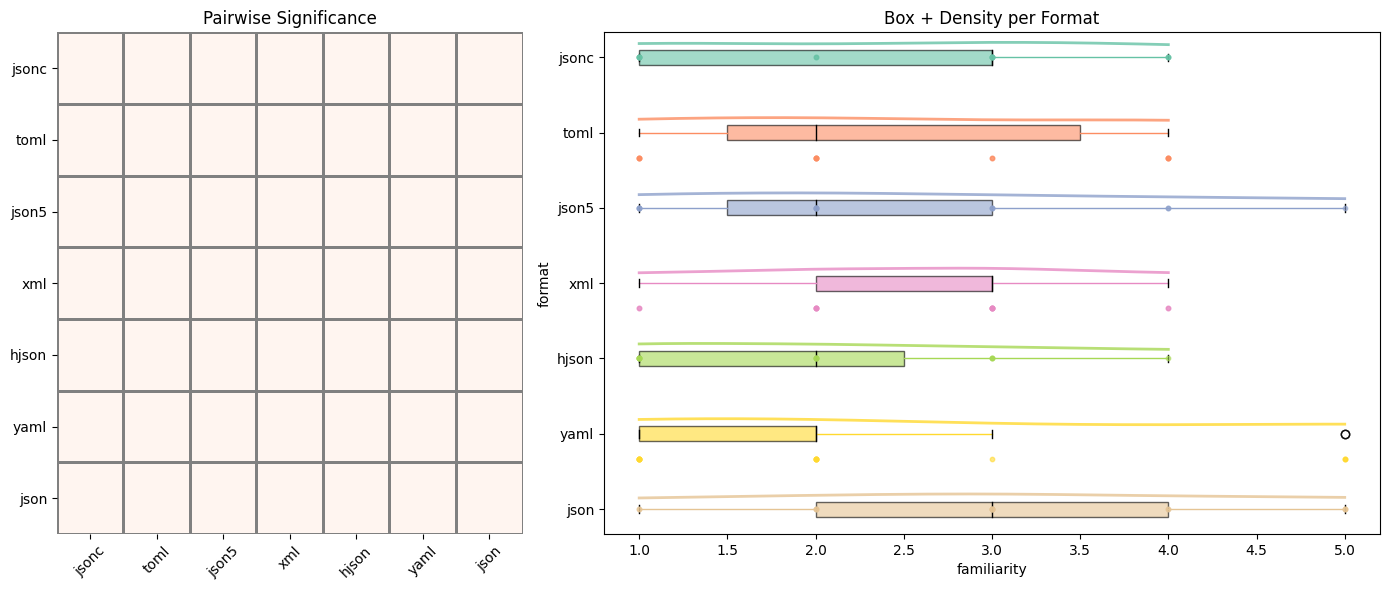

{'method': 'anova',
 'alpha': 0.05,
 'p_adjust_method': 'bonferroni',
 'descriptive':         count      mean       std  median  min  max
 format                                             
 hjson      15  1.933333  0.961150     2.0    1    4
 json       15  3.066667  1.334523     3.0    1    5
 json5      15  2.400000  1.242118     2.0    1    5
 jsonc      15  2.400000  1.183216     3.0    1    4
 toml       15  2.400000  1.183216     2.0    1    4
 xml        15  2.533333  0.915475     3.0    1    4
 yaml       17  2.176471  1.467791     2.0    1    5,
 'overall_p': 0.2781811762418412,
 'effect_size': 0.0707857006847818,
 'is_significant': False,
 'pairwise': Empty DataFrame
 Columns: [group1, group2, p_value, significant, interpretation]
 Index: [],
 'warning': None}

In [24]:
## reading tasks

vis_box_comparasion(
    df_familiar,
    group_col='format',
    value_col='familiarity',
    method='anova',
    show_significance=True,
    box_height=0.3,
    vpad=1.5,
    wspace=0.4,
    palette_name='Set2',
    task_col='task'
)

results = compare_statistically(
    df_familiar,
    group_col='format',
    value_col='familiarity',
    method='anova',
    task_col='task'
)

results


## time correctness anlaysis

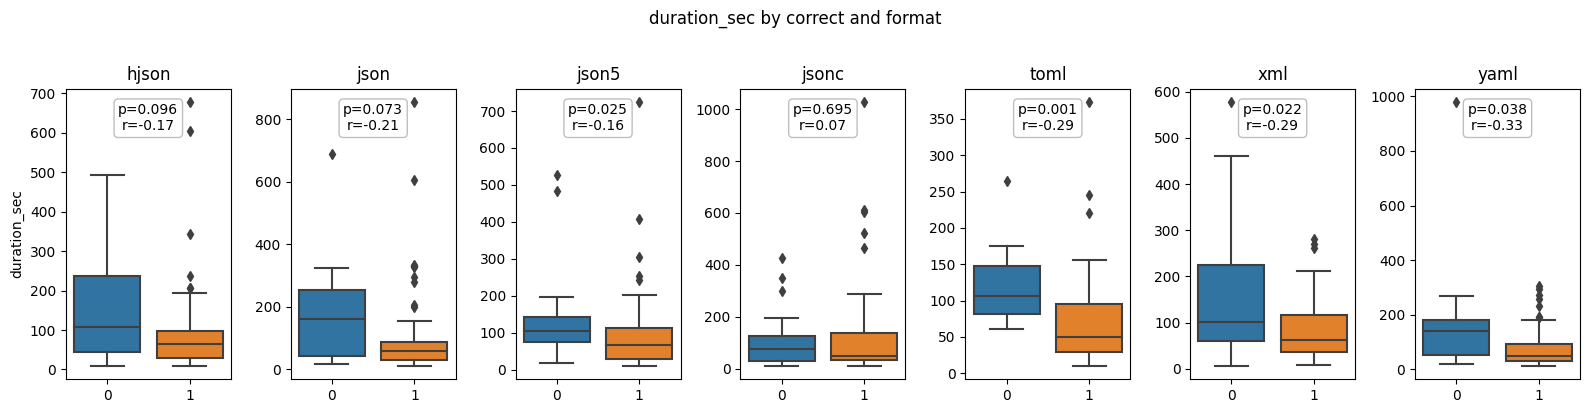

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

def plot_duration_vs_correct_with_stats(
    df_post, df_result,
    participant_col='participantId',
    format_col='format',
    task_col='task',
    time_col='duration_sec',
    response_col='correct',
    by_format=True,
    figsize=(16, 4),
    test='mannwhitney'
):
    """
    按 format 分面画箱线，并在每个子图上标注：
      1) 两组间的 p-value（Mann-Whitney U 或 t-test）
      2) 对应的点二列相关系数 r
    
    参数:
      test: 'mannwhitney' 或 'ttest'
    """
    # 合并
    df = (pd.merge(
            df_post[[participant_col, format_col, task_col, time_col]],
            df_result[[participant_col, format_col, task_col, response_col]],
            on=[participant_col, format_col, task_col], how='inner')
          .dropna(subset=[time_col, response_col]))
    
    formats = sorted(df[format_col].unique())
    n = len(formats)
    fig, axes = plt.subplots(1, n, figsize=(figsize[0], figsize[1]), sharey=False)
    
    for ax, fmt in zip(axes, formats):
        sub = df[df[format_col]==fmt]
        # 箱线
        sns.boxplot(data=sub, x=response_col, y=time_col, ax=ax)
        ax.set_title(f"{fmt}", fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel(time_col if fmt==formats[0] else '')
        
        # 取两组数据
        x0 = sub[sub[response_col]==0][time_col]
        x1 = sub[sub[response_col]==1][time_col]
        
        # 1) 计算 p 值
        if test=='ttest':
            stat, p = st.ttest_ind(x0, x1, nan_policy='omit')
        else:
            stat, p = st.mannwhitneyu(x0, x1, alternative='two-sided')
        
        # 2) 计算点二列相关系数
        r, _ = st.pointbiserialr(sub[response_col], sub[time_col])
        
        # 叠加文本
        ax.text(
            0.5, 0.95,
            f"p={p:.3f}\nr={r:.2f}",
            ha='center', va='top', 
            transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.5)
        )
    
    fig.suptitle(f"{time_col} by {response_col} and {format_col}", y=1.02)
    plt.tight_layout()
    plt.show()


plot_duration_vs_correct_with_stats(
    df_post      = df_reading_result,
    df_result    = df_reading_result,
    participant_col='participantId',
    format_col     ='format',
    task_col       ='task',
    time_col       ='duration_sec',      # 连续时间列
    response_col   ='correct',         
    by_format      = True              # 按 format 分面
)


In [26]:
df_reading_result

participantId                   task format         response  \
0    67895b7d6400163124042af7  reading-task-config-1  jsonc            7.9.0   
1    67895b7d6400163124042af7  reading-task-config-2  jsonc               12   
2    67895b7d6400163124042af7  reading-task-config-3  jsonc                6   
3    67895b7d6400163124042af7  reading-task-config-4  jsonc  devDependencies   
4    67895b7d6400163124042af7  reading-task-config-5  jsonc         d3-scale   
..                        ...                    ...    ...              ...   
530  5c4f5967aac8be0001716a65  reading-task-config-1    xml             None   
531  5c4f5967aac8be0001716a65  reading-task-config-2    xml             >=12   
532  5c4f5967aac8be0001716a65  reading-task-config-3    xml                6   
533  5c4f5967aac8be0001716a65  reading-task-config-4    xml         keywords   
534  5c4f5967aac8be0001716a65  reading-task-config-5    xml      d3-delaunay   

        start_time       end_time  duration_sec  help_count correct_answer  \
0    1747335882150  1747335947784        65.634           0          7.9.0   
1    1747335955819  1747336024757        68.938           0           >=12   
2    1747336031704  1747336066889        35.185           0              6   
3    1747336076341  1747336151040        74.699           0       keywords   
4    1747336156746  1747336187067        30.321           0    d3-delaunay   
..             ...            ...           ...         ...            ...   
530  1747173003809  1747173078063        74.254           0          7.9.0   
531  1747173082895  1747173104833        21.938           0           >=12   
532  1747173109732  1747173135117        25.385           0              6   
533  1747173138032  1747173255172       117.140           0       keywords   
534  1747173259944  1747173290209        30.265           0    d3-delaunay   

     correct  
0          1  
1          0  
2          1  
3          0  
4          0  
..       ...  
530        0  
531        1  
532        1  
533        1  
534        1  

[535 rows x 10 columns]

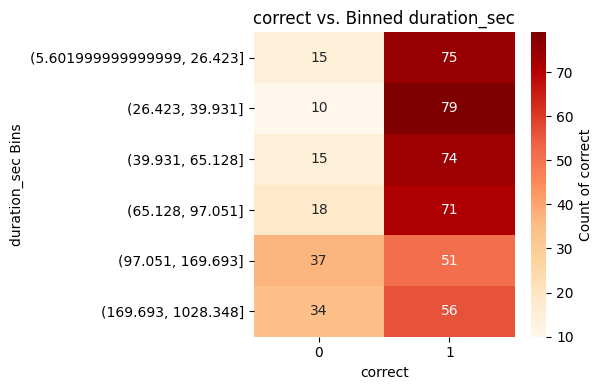

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_time_vs_response_heatmap(
    df_post: pd.DataFrame,
    df_result: pd.DataFrame,
    participant_col: str,
    format_col: str,
    task_col: str,
    time_col: str,
    response_col: str,
    bins: int = 8,
    cmap: str = 'Blues'
):
    """
    1) 合并并清洗
    2) 把 time_col 分成 `bins` 个区间 (quantile bins)
    3) 对 (time_bin, response_col) 做计数透视热力图
    """
    # 合并
    df = pd.merge(
        df_post[[participant_col, format_col, task_col, time_col]],
        df_result[[participant_col, format_col, task_col, response_col]],
        on=[participant_col, format_col, task_col],
        how='inner'
    ).dropna(subset=[time_col, response_col])

    # 分箱（等频）
    df['time_bin'] = pd.qcut(df[time_col], bins, duplicates='drop')

    # 生成透视表
    pivot = (
        df
        .groupby(['time_bin', response_col])
        .size()
        .unstack(fill_value=0)
    )

    # 绘图
    plt.figure(figsize=(6, max(4, pivot.shape[0]*0.5)))
    sns.heatmap(
        pivot, annot=True, fmt='d',
        cmap=cmap,
        cbar_kws={'label': f'Count of {response_col}'}
    )
    plt.ylabel(f"{time_col} Bins")
    plt.xlabel(response_col)
    plt.title(f"{response_col} vs. Binned {time_col}")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_time_vs_response_heatmap(
    df_post      = df_reading_result,
    df_result    = df_reading_result,
    participant_col='participantId',
    format_col     ='format',
    task_col       ='task',
    time_col       ='duration_sec',
    response_col   ='correct',
    bins           = 6,
    cmap           ='OrRd'
)


## writing task correctness 

## modifying task correctness